# Predicting the Outcomes of Pokemon Battles
### Rahif Mansoor, Yanez Saucedo, Emily Thompson, Jacob Ralls



## Executive Summary

## 1. Introduction

### 1.1 Motivation
As Pokémon fans, our team is intrigued by the strategic elements that influence the outcomes of Pokémon battles. Our interest extends beyond the surface-level enjoyment of the games and into the analytical aspects that determine victory or defeat in Pokemon Battles. This project was chosen not only to show our love for the Pokémon universe but also to apply and enhance our data science skills 

The relevance of this study transcends the scope of the Pokémon universe, offering insights into problem-solving, statistical analysis, and predictive modeling that are applicable in real-world scenarios. By conducting an exploratory analysis of Pokémon battle data, we aim to identify key factors that contribute to a Pokémon's success in battles. We can leverage machine learning models to predict battle outcomes based on a Pokémon's statistics (such as Attack, defense, HP, and speed), allowing us to apply our knowledge in a dynamic environment.

This project aligns with our course objectives by providing a hands-on experience in data handling, analysis, and model building. It not only helps us understand the intricacies of machine learning algorithms but also enables us to test and refine these models in a scenario where we can directly observe the interplay of various predictive factors. Through this, we hope to gain an understanding of what it takes to win Pokémon battles under varying conditions and to develop strategies that can be tested within the dataset.

### 1.2 Defining the Question(s)

In our study, we aim to address several key questions that are crucial for understanding competitive Pokémon battles. Here are the questions and why they matter:

#### Question 1: Impact of Pokémon Statistics on Win Rate
- **What statistics (HP, Attack, Defense, Speed, etc.) lead to a higher win rate?**
Each Pokémon is unique, with base stats that define its role in battle, such as "Tanky" (high health and defense) or "Glass Cannon" (high attack but low defense). We want to analyze how these stats contribute to a Pokémon's success in a 1v1 battle, helping to understand strategic choices in team building.

#### Question 2: Defining the Best Pokémon
- **What is considered the "best" Pokémon in competitive viability?**
- **What is the best Pokémon excluding "Mega" variants?**
These questions help us define what makes a Pokémon "the best" in a 1v1 battle setting, particularly focusing on non-Mega variants to maintain balance in our analysis, as Mega evolutions can skew results due to their enhanced abilities.

#### Question 3: Battle Dynamics by Pokémon Type
- **Which type wins the most battles? Which types are more offensive versus defensive?**
- **Within each type, which are the top 5 Pokémon choices? What combination of first and second type Pokemon are best suited for battle?**
By examining the primary and secondary types of Pokémon, we can identify which types are statistically more likely to win and categorize them as offensive or defensive. This insight is vital for strategizing and optimizing battle tactics.

These questions are important in exploring the depth of Pokémon battle mechanics and strategies. By answering them, we aim to not only satisfy our curiosity as fans but also to apply sophisticated data analysis and predictive modeling techniques to real-world concepts like probability and game theory.


## 2. Data Collection

### 2.1 Data Sources
Our primary data source for this project is a publicly available dataset from Kaggle, part of the "Pokémon Challenge" hosted on the platform. This dataset, titled ["Welcome to Weedle's Cave"](https://www.kaggle.com/datasets/terminus7/pokemon-challenge/data), provides comprehensive details on Pokémon characteristics and historical battle outcomes. It is designed to encourage the development of machine learning models that can predict the outcomes of future Pokémon battles.

### 2.2 Data Acquisition
The dataset includes three main files:
- **pokemon.csv:** Lists individual attributes for each Pokémon, such as type, stats, and more. The first column serves as the Pokémon ID.
- **combats.csv:** Contains records of past battles, including the IDs of the participating Pokémon and the ID of the winner. Notably, the Pokémon listed first in each match is the one that attacks first
- **tests.csv:** This file would typically be used to record predictions from our model, comparing them against actual outcomes to assess accuracy.

The data was downloaded directly from Kaggle, and we used Python for data manipulation and analysis, primarily with libraries such as Pandas for data frames, matplotlib for plotting analysis, and Scikit-Learn for a machine learning model development.

### 2.3 Ethical Considerations
While the Pokémon characteristics are derived from the official games, the combat data in this dataset has been generated using a custom algorithm. This algorithm simplifies some aspects of Pokémon combat mechanics, meaning our analysis might not fully capture all nuances of actual gameplay. It's important to note that:
- **Data Authenticity:** The battle outcomes are simulated and do not reflect real player data or real battles. This eliminates privacy concerns typically associated with human subject data.
- **Transparency:** We acknowledge the limitations of this dataset and the potential discrepancies in applying our findings to real-world Pokémon battles or other scenarios.

In using this dataset, we ensure that our project aligns with ethical standards by being transparent about its origins and limitations. We do not handle sensitive or personal data, focusing solely on simulated outcomes provided for academic and entertainment purposes.


## 3. Data Cleaning and Preparation


### 3.1 Initial Data Review
Provide an overview of the dataset characteristics (e.g., number of features, number of records, types of variables).

In [21]:
import pandas as pd
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

#           Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
0  1      Bulbasaur  Grass  Poison  ...       65     45           1      False
1  2        Ivysaur  Grass  Poison  ...       80     60           1      False
2  3       Venusaur  Grass  Poison  ...      100     80           1      False
3  4  Mega Venusaur  Grass  Poison  ...      120     80           1      False
4  5     Charmander   Fire     NaN  ...       50     65           1      False

[5 rows x 12 columns]

The `pokemon.csv` file contains data about various Pokémon, structured into several columns:

- `#`: An integer identifier for each Pokémon from the Pokedex
- `Name`: The name of the Pokémon, stored as text.
- `Type 1`: The primary type of the Pokémon, indicating one of the various elemental categories it belongs to, stored as text.
- `Type 2`: The secondary type of the Pokémon, which may be blank if the Pokémon has only one type, also stored as text.
- `HP`: Hit Points, an integer representing the health of the Pokémon.
- `Attack`: An integer indicating the basic attack strength of the Pokémon.
- `Defense`: An integer indicating how well the Pokémon can resist physical attacks.
- `Sp. Atk`: Special Attack, an integer showing the strength of the Pokémon's special moves.
- `Sp. Def`: Special Defense, an integer indicating how well the Pokémon can resist special attacks.
- `Speed`: An integer representing how quickly the Pokémon can act in battles.
- `Generation`: An integer indicating the generation the Pokémon belongs to, reflecting when it was first introduced in the Pokémon series.
- `Legendary`: A boolean indicating whether the Pokémon is considered legendary, a status that typically means it is rare, powerful, and often part of the game's lore.

In [23]:
battles = pd.read_csv('combats.csv')
battles.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

`Combats.csv` shows a simulation between two pokemon where it determines who wins in the end. It is important in training our machine learning model to determine a winner.
The Pokémon that attacked first will always be listed as `First_Pokemon`(which is determined by its speed value)

It's important to note that a few pokemon were omitted from this data as they did not compete in any combat within the `combats.csv` file. These are: Blastoise,  Sandshrew, Wigglytuff, Poliwag, Victreebel, Magneton, Ditto, Ariados, Ursaring, 
Lairon, Mega Latias, Honchkrow, Servine, Maractus, Jellicent, and Pumpkaboo Small Size.

In [50]:
tests = pd.read_csv('tests.csv')
tests.head()

First_pokemon  Second_pokemon
0            129             117
1            660             211
2            706             115
3            195             618
4             27             656

`Tests.csv` gives us potenial tests to validate our machine learning model and determine its accuracy in simulating Pokemon Battles and predicting the `Winner` column

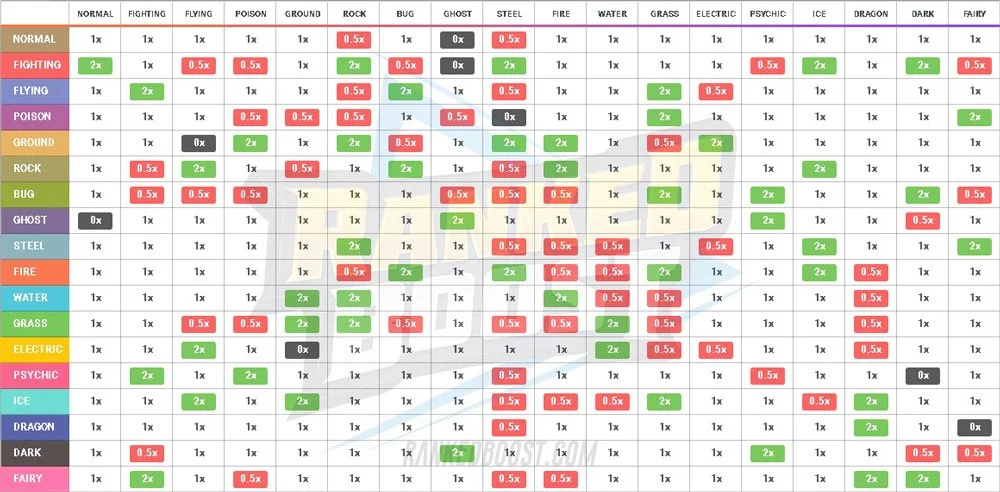

In [51]:
from PIL import Image 
from IPython.display import display
img = Image.open('Pokemon-Sword-Shield-Type-Weakness.webp')
display(img)

### Pokémon Type Advantage Explanation

The effectiveness of an attack in Pokémon battles is determined by the type interactions between the attacking Pokémon and the defending Pokémon. The interactions can result in different multipliers affecting the damage output:

- **4x Damage (Severe Advantage):** Both of the defender's types are weak against the attacker's type.
 Ex: A pokemon that is Bug and Steel(Scizor) is 4x weak to Fire
- **2x Damage (Advantage):** One of the defender's types is weak against the attacker's type and the other is neutral.
- Ex: Fire beats Grass, Grass beats water, Water beats fire
- **1x Damage (Neutral Interaction):**
  - Both of the defender's types are neutral to the attacker's type, or
  - One of the defender's types is strong and the other weak against the attacker's type.
- **0.5x Damage (Disadvantage):** One of the defender's types is strong and the other is neutral against the attacker's type.
- **0.25x Damage (Severe Disadvantage):** Both of the defender's types are strong against the attacker's type.
- **0x Damage (Immunity):** At least one of the defender's types is immune to the attacker's type.


### Pokémon Damage Calculation Formula

The damage dealt in a Pokémon battle when a Pokémon uses a move against another is calculated using the following formula:

```math
Damage = \left(\left(\frac{2 \times Level}{5} + 2\right) \times Power \times \frac{Attack}{Defense}  + 2\right) \times Modifier
```
- **Level:** the level of the attacking Pokémon.
- **Power:** the power of the move being used.
- **Attack:** the attack stat of the attacking Pokémon (or Special Attack for special moves).
- **Defense:** the defense stat of the defending Pokémon (or Special Defense for special moves).

```math
Modifier = STAB \times Type \times Critical \times Other \times Random
```

- **STAB (Same-Type Attack Bonus):** This is typically 1.5 if the move's type matches one of the types of the attacking Pokémon; otherwise, it is 1.
- **Type (Type Effectiveness):** This factor depends on the matchup between the move's type and the defender's types, influencing damage as follows:
0 (no effect), 0.25, 0.5 (not very effective), 1 (neutral), 2, 4 (super effective)
- **Critical (Critical Hit):** Usually 1, but can increase to 1.5 or higher if a critical hit occurs.
- **Other:** This can include various other modifiers such as those from abilities, items, field effects (like weather), and other battle-specific conditions.
- **Random:** A random factor ranging from 0.85 to 1, introduced to add variability to damage output(can be seen as a high roll or low roll)

For the purposes of this experiment, **Level**, **Power**, and **Modifier** are standardized such that no Pokemon gets an unfair advantage in the simulation

### 3.2 Cleaning Procedures
The dataset from 'pokemon.csv' was robust and well-structured, requiring minimal cleaning for effective analysis. All Pokemon forms from Generations 1 through 6 were accurately represented, ensuring comprehensive coverage of the data scope. 

- The **Second_Type** column had missing values, but this was by design, as not all Pokemon possess a secondary type. These missing entries were therefore not treated as data quality issues. 
- Additionally, the dataset was free of duplicates, and there were no significant outliers, except for the legendaries which were already distinctly labeled in their own column. 
- Normalization of the dataset was largely unnecessary, with the only adjustment being the conversion of the "Winner" column into a binary format (1 for win, 0 for loss) to simplify the interpretation of battle outcomes. 





### 3.3 Final Dataset Description

- The structure of 'pokemon.csv' was already suitable for merging with 'tests.csv' based on the Pokemon Index, allowing for an easy combination based on the index of each Pokemon to further enrich the dataset with detailed statistics and features for analysis.


## 4. Data Analysis

## 4.1 Exploratory Data Analysis


In [2]:
#Loading all libraries and files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import graphviz



# **Question 1: Impact of Pokémon Statistics on Win Rate**
**What statistics (HP, Attack, Defense, Speed, etc.) lead to a higher win rate?**

To investigate the impact of Pokémon statistics on their win rate, we introduced a new variable named `base_stat_total`. This variable sums the individual stats of each Pokémon, including HP, Attack, Defense, Special Attack, Special Defense, and Speed, into a single metric. The rationale behind this approach is to assess whether Pokémon with higher aggregated stats have an advantage in battles, potentially leading to a higher win rate.

After calculating the `base_stat_total` for each Pokémon, we proceeded to analyze the data based on Pokémon types. By grouping the Pokémon by their primary type (`Type 1`) and calculating the average `base_stat_total` for each group, we aimed to uncover patterns or trends that might indicate a correlation between a Pokémon's type, its overall stat composition, and its performance in battles.

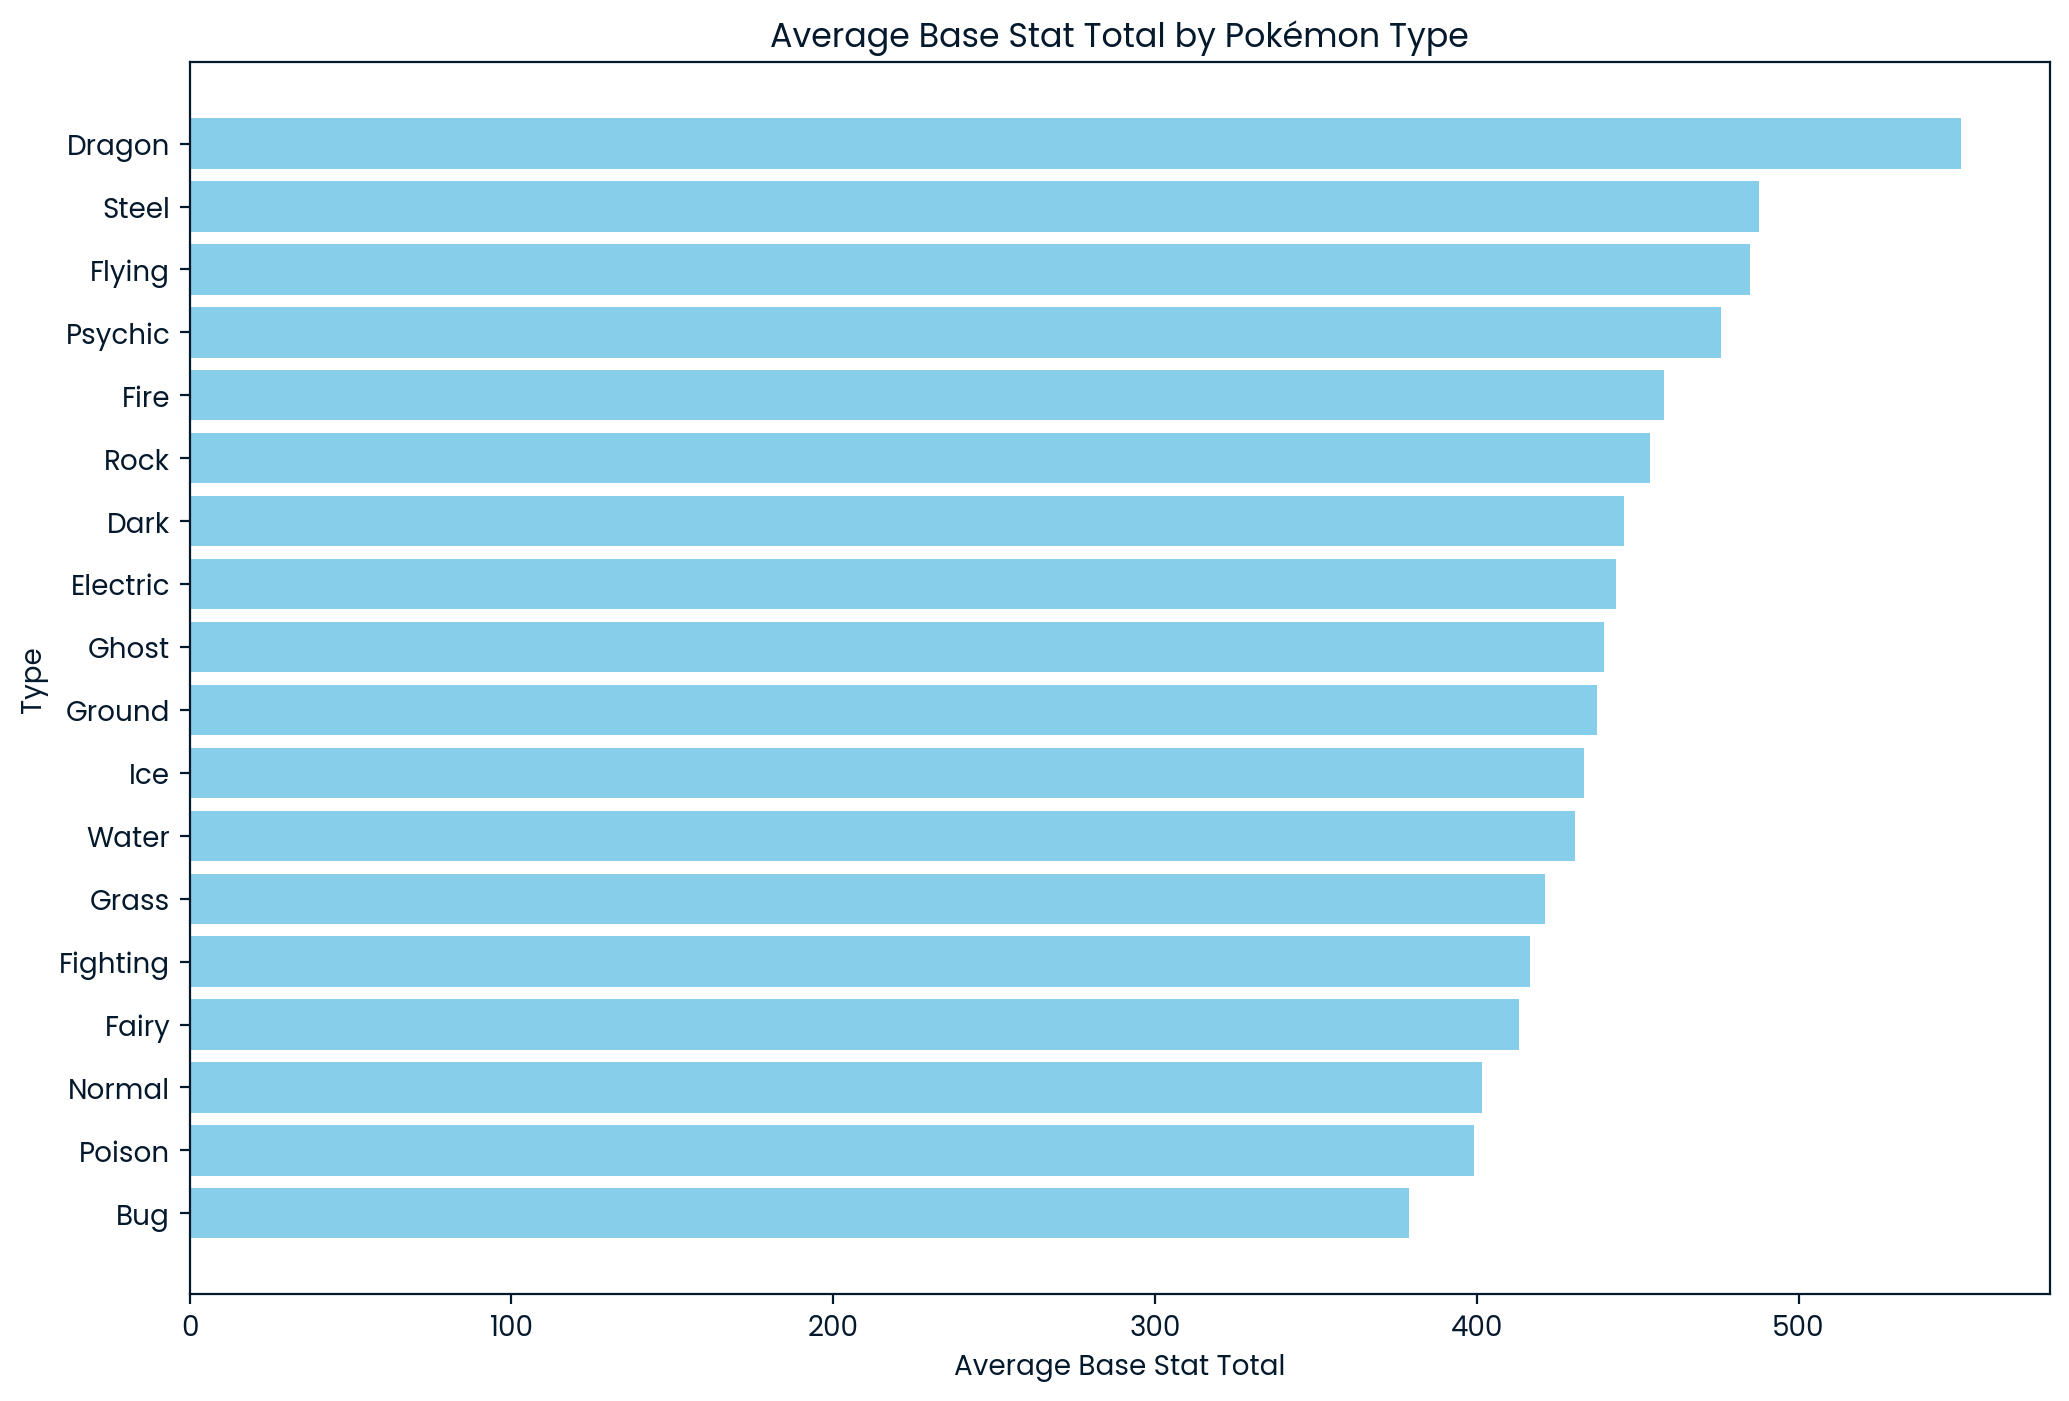

      Type 1  base_stat_total
2     Dragon       550.531250
16     Steel       487.703704
7     Flying       485.000000
14   Psychic       475.947368
6       Fire       458.076923
15      Rock       453.750000
1       Dark       445.741935
3   Electric       443.409091
8      Ghost       439.562500
10    Ground       437.500000
11       Ice       433.458333
17     Water       430.455357
9      Grass       421.142857
5   Fighting       416.444444
4      Fairy       413.176471
12    Normal       401.683673
13    Poison       399.142857
0        Bug       378.927536


In [2]:
### Base stat total averages


# Load the dataset
df = pd.read_csv('pokemon.csv')

# Calculate the total of all base stats for each Pokémon
df['base_stat_total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Group by the primary type and calculate the average of the base stat totals
type_avg = df.groupby('Type 1')['base_stat_total'].mean().reset_index()

# Sort the types based on the average base stat total for better visualization
type_avg_sorted = type_avg.sort_values(by='base_stat_total', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(type_avg_sorted['Type 1'], type_avg_sorted['base_stat_total'], color='skyblue')
plt.xlabel('Average Base Stat Total')
plt.ylabel('Type')
plt.title('Average Base Stat Total by Pokémon Type')
plt.show()

# Print the base stat total in descending order
print(type_avg_sorted.sort_values(by='base_stat_total', ascending=False))

The dragon type has a significantly higher `base_stat_total` when compared to the other types and this makes sense in the context of Pokemon. A lot of powerful Pokemon are dragon types and thus have a higher `base_stat_total`. Next, we can see how excluding legendaries can impact the average means of each type to get a more representative chart of common Pokemon.

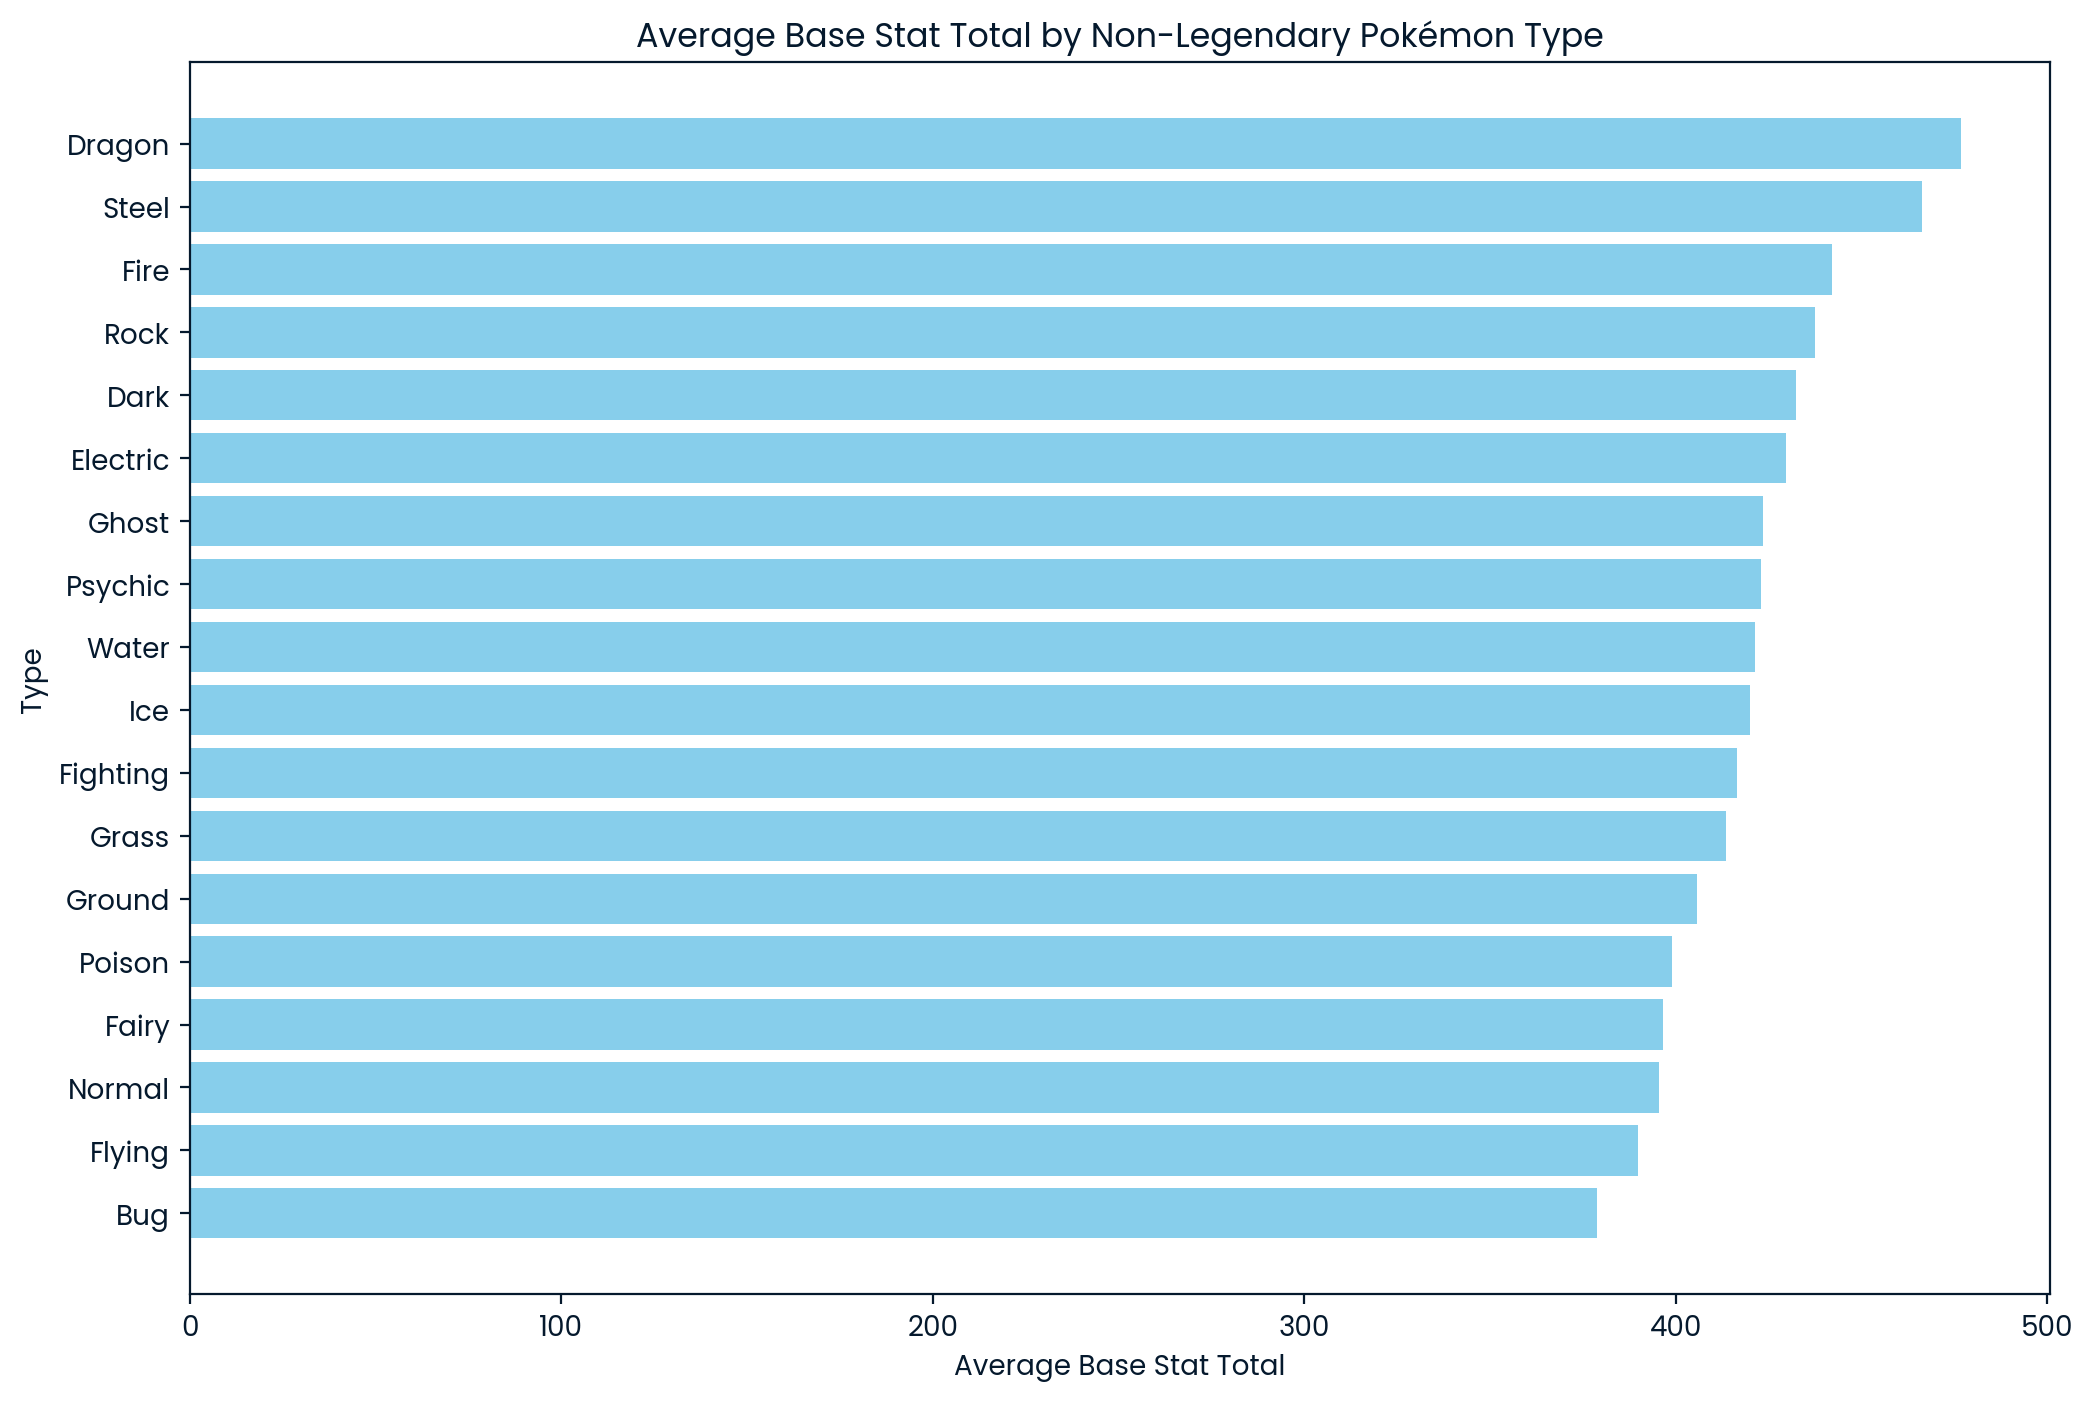

      Type 1  base_stat_total
2     Dragon       476.850000
16     Steel       466.434783
6       Fire       442.127660
15      Rock       437.625000
1       Dark       432.344828
3   Electric       429.750000
8      Ghost       423.533333
14   Psychic       423.000000
17     Water       421.398148
11       Ice       420.136364
5   Fighting       416.444444
9      Grass       413.432836
10    Ground       405.714286
13    Poison       399.142857
4      Fairy       396.500000
12    Normal       395.572917
7     Flying       390.000000
0        Bug       378.927536


In [3]:
### Base Stat totals without legendaries

# Load the dataset
df = pd.read_csv('pokemon.csv')

# Exclude legendary Pokémon
df_non_legendary = df[df['Legendary'] == False]

# Calculate the total of all base stats for each non-legendary Pokémon
df_non_legendary['base_stat_total'] = df_non_legendary[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Group by the primary type and calculate the average of the base stat totals for non-legendary Pokémon
type_avg_non_legendary = df_non_legendary.groupby('Type 1')['base_stat_total'].mean().reset_index()

# Sort the types based on the average base stat total for better visualization
type_avg_sorted_non_legendary = type_avg_non_legendary.sort_values(by='base_stat_total', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(type_avg_sorted_non_legendary['Type 1'], type_avg_sorted_non_legendary['base_stat_total'], color='skyblue')
plt.xlabel('Average Base Stat Total')
plt.ylabel('Type')
plt.title('Average Base Stat Total by Non-Legendary Pokémon Type')
plt.show()
print(type_avg_sorted_non_legendary.sort_values(by='base_stat_total', ascending=False))

Still dragon types end up being the most powerful type, but with the exclusion of legendaries, the distribution is more even and shows the parity between types. There is still a power dynamic evident showing that bug, normal, and poison types end up having low `base_stat_total`

Next, we can look into the distribution of statistics among different Generations(the games which were released) to see if there is a significant jump or it is evenly distributed across time.

Generation 1 median base stat total: 436.5
Generation 2 median base stat total: 422.5
Generation 3 median base stat total: 435.0
Generation 4 median base stat total: 485.0
Generation 5 median base stat total: 465.0
Generation 6 median base stat total: 464.0


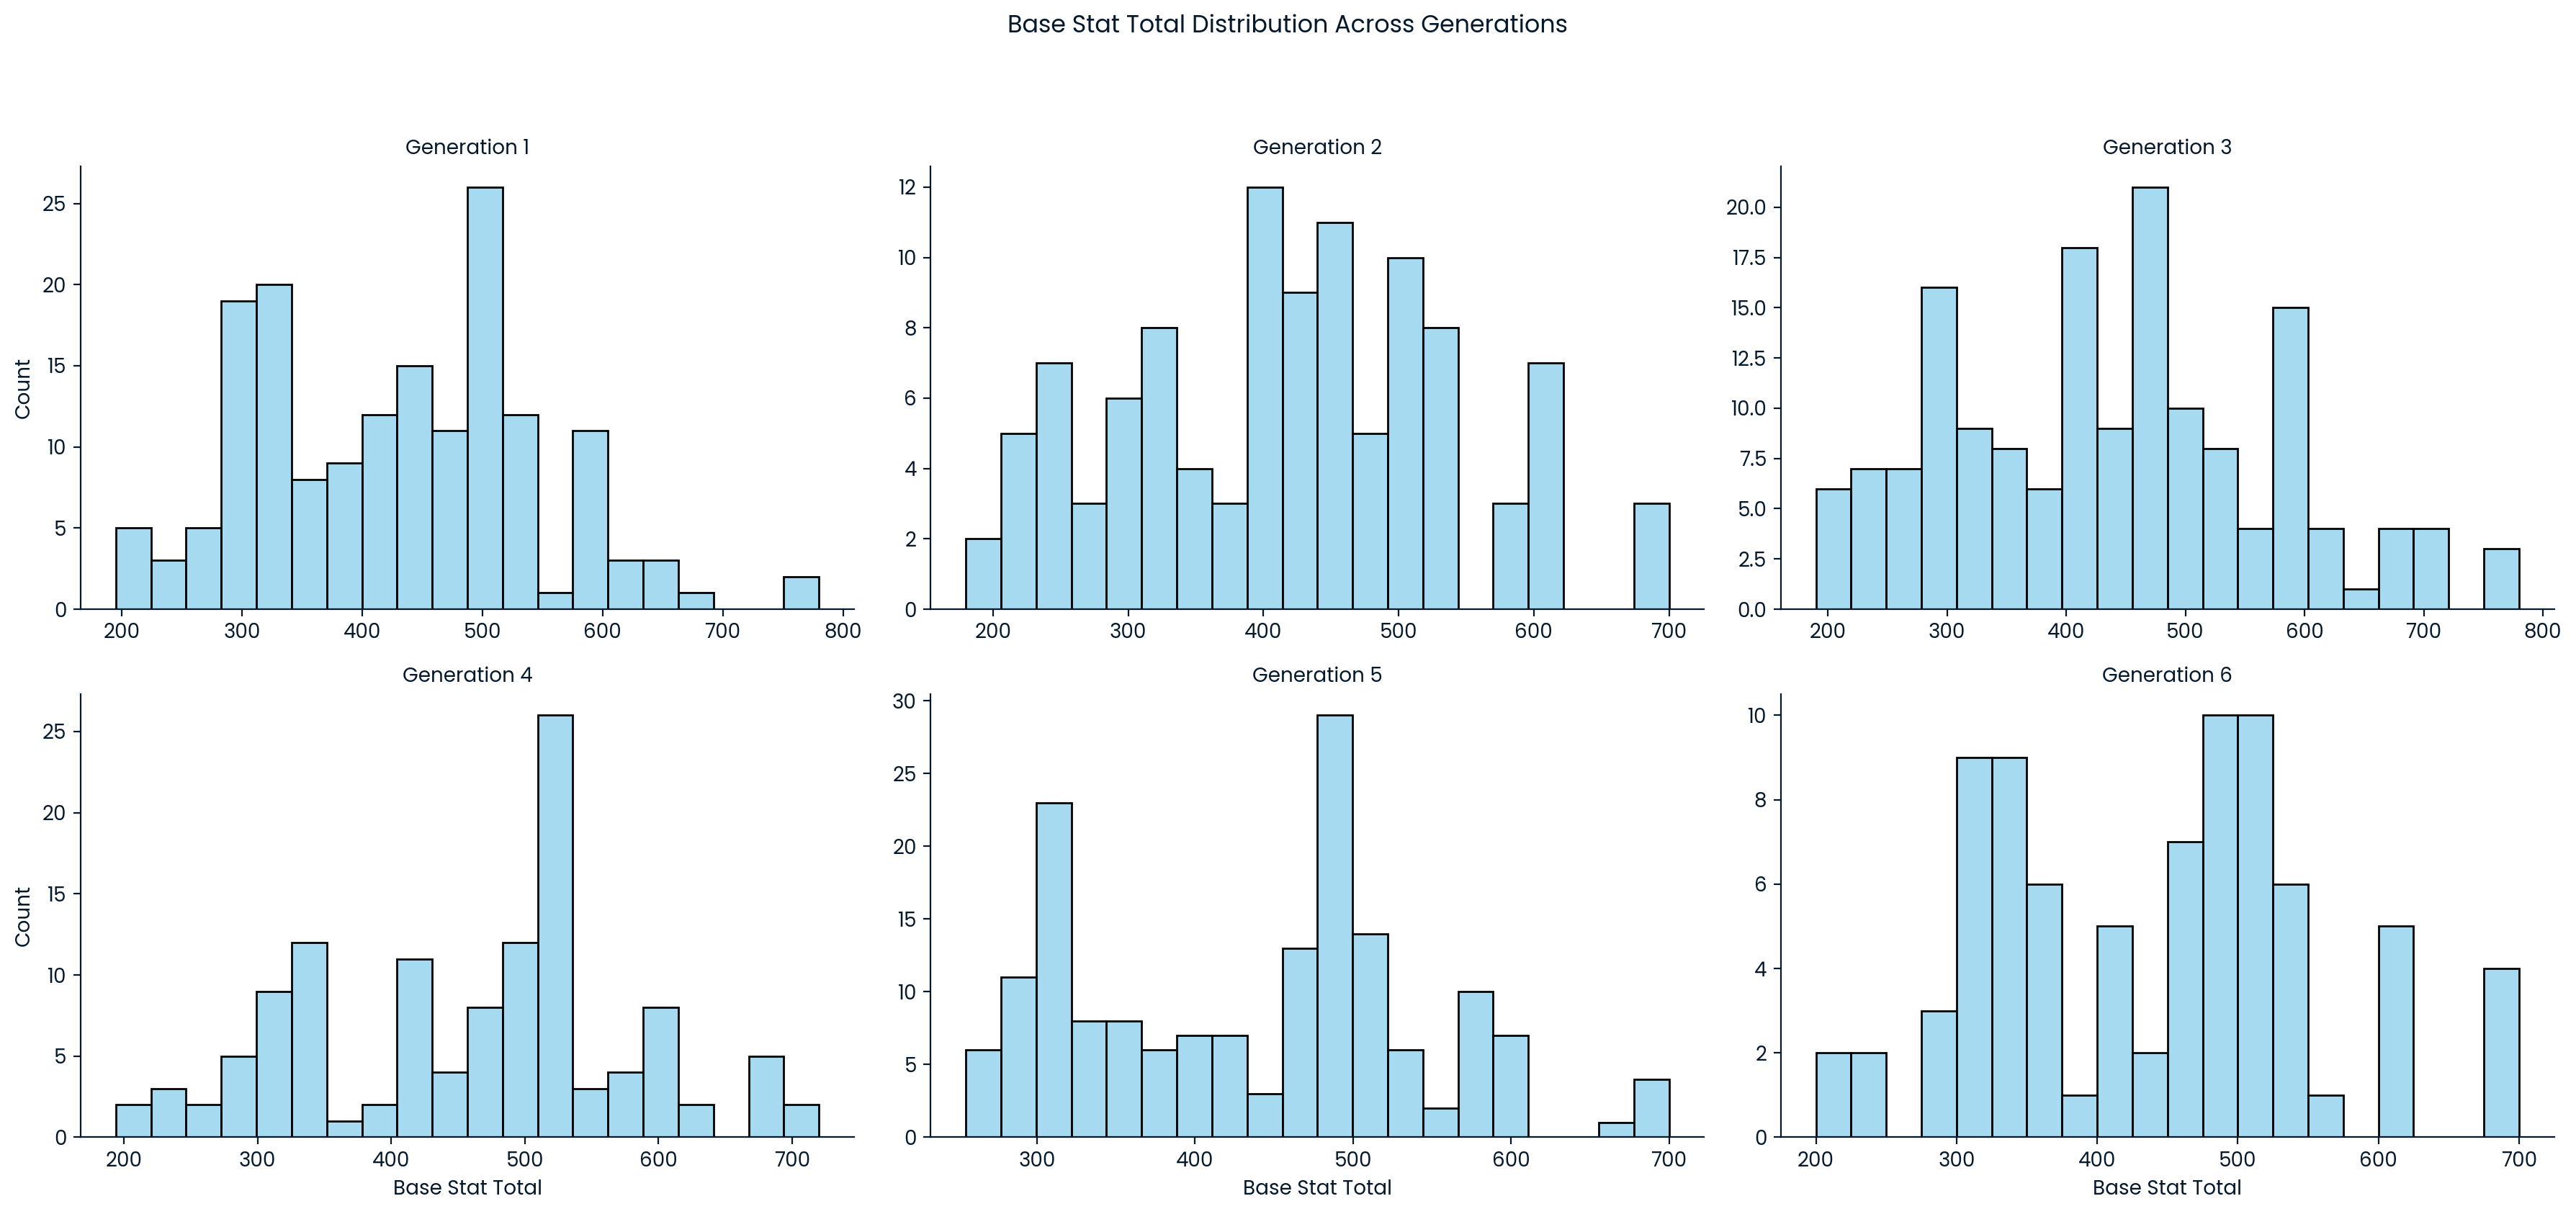

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['base_stat_total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Creating a FacetGrid with seaborn for histograms of base stat totals for each generation
g = sns.FacetGrid(
    data=df,
    col='Generation',
    col_wrap=3,  # Layout with 3 histograms per row
    sharex=False,  # Each generation shares the same x-axis
    sharey=False,  # Do not share the y-axis
    height=4,  # Height of each subplot
    aspect=1.5  # Aspect ratio of each subplot
)
g.map(sns.histplot, 'base_stat_total', bins=20, color='skyblue')

# Improving the layout and aesthetics
g.fig.suptitle('Base Stat Total Distribution Across Generations', y=1.05)  # Title of the figure
g.set_titles('Generation {col_name}')  # Title for each subplot
g.set_axis_labels('Base Stat Total', 'Count')  # X and Y axis labels
plt.tight_layout()

# Printing out the median values for each generation
medians = df.groupby('Generation')['base_stat_total'].median()
for gen, median in medians.items():
    print(f"Generation {gen} median base stat total: {median}")

plt.show()

There seems to be varying distributions across each generation but still seemingly normal. Generation 1 seems to have a right skewed distribution, Generation 2 and 3 seem normal, Generation 4 has a slightly skewed left distribution, Generation 5 and 6 are bimodal with some very weak and some very powerful Pokemon. Overall, we can see that Generations do play a factor in `base_stat_total` distribution when separated but are overall balanced when combined into one dataset

Next we can find the most common Pokemon types to gauge the distribution

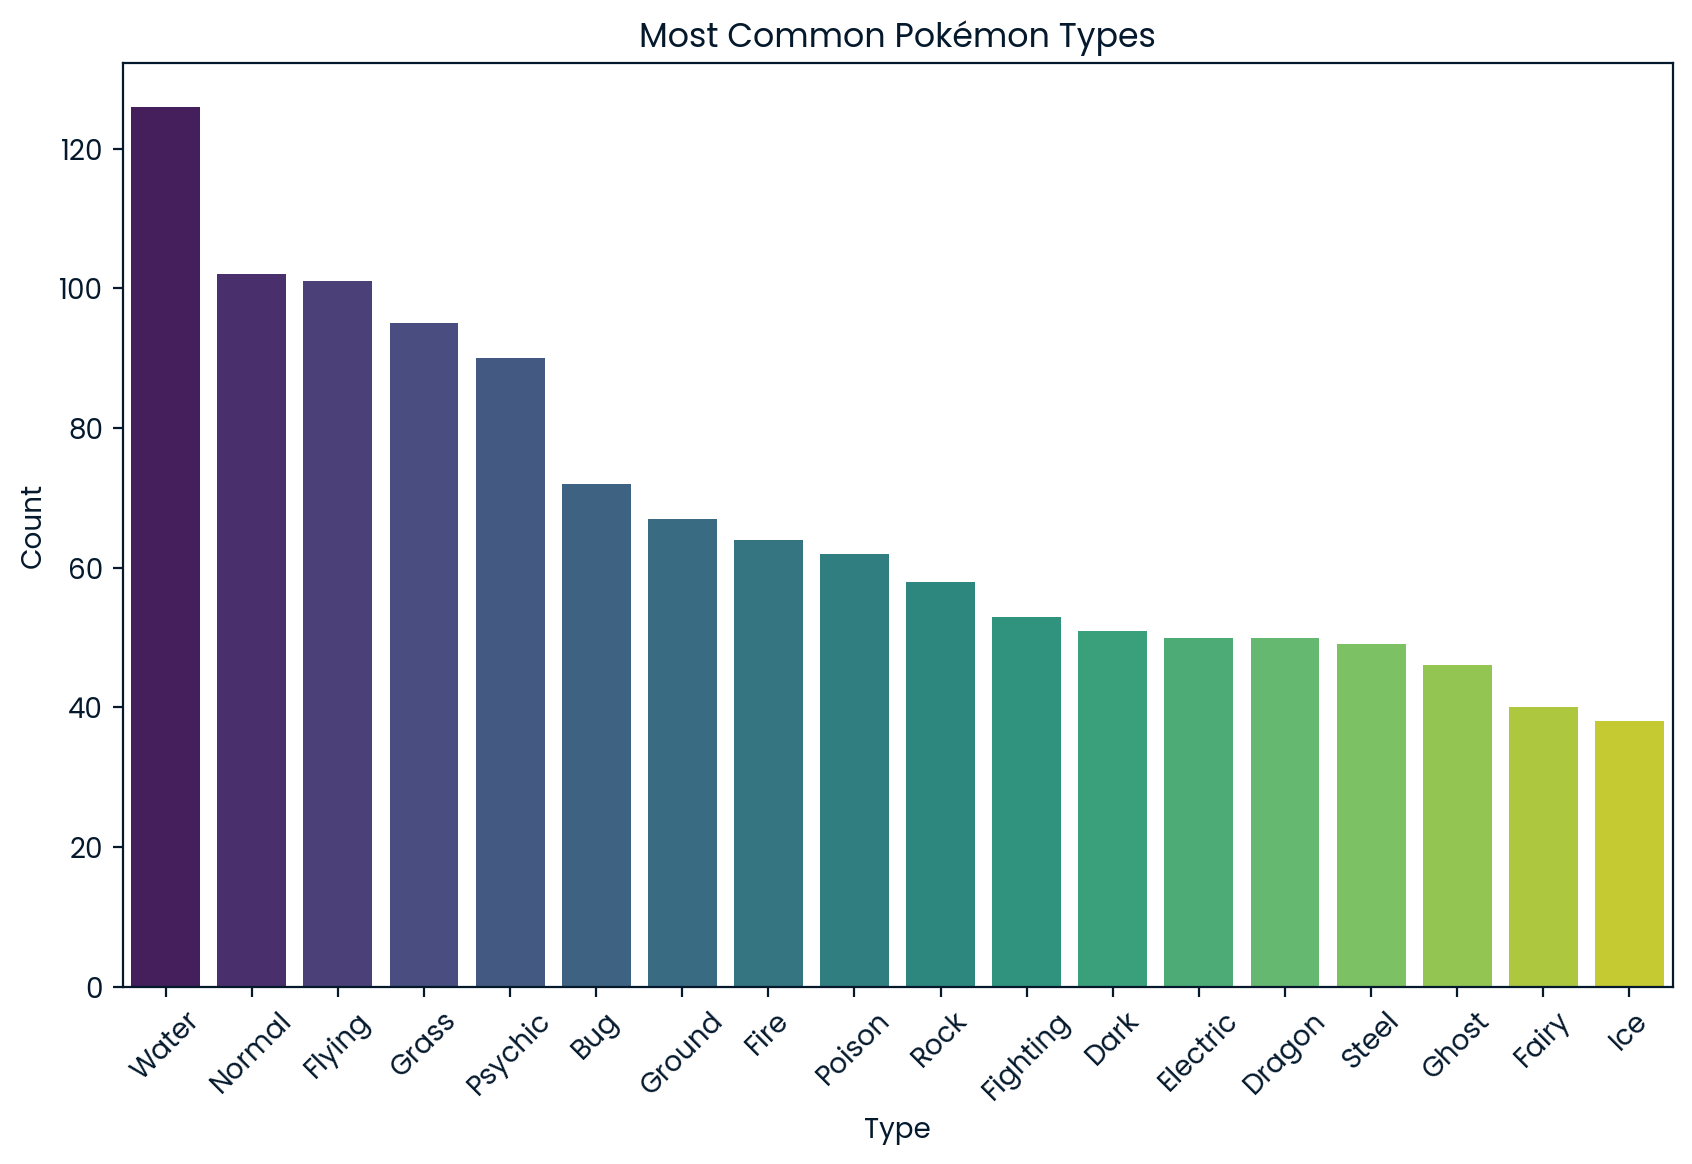

Counts for each type:
Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
Name: count, dtype: int64
Total Pokémon in the data: 800


In [5]:
# Merging "Type 1" and "Type 2" into a single Series to count occurrences of each type
all_types = pd.concat([df['Type 1'], df['Type 2']]).dropna()

# Counting occurrences of each type
type_counts = all_types.value_counts()

# Creating a bar chart for the most common types
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Common Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Printing out the counts for each type
print("Counts for each type:")
print(type_counts)

# Calculating the total number of Pokémon (considering some Pokémon might have NaN in 'Type 2')
total_pokemon = len(df['Type 1'])
print(f"Total Pokémon in the data: {total_pokemon}")

`Water`, `Normal`, and `Flying` are the most dominant typings in the Pokemon Universe and that makes sense in context when playing the first few starter routes. Same goes for `Ice`, `Fairy`, and `Ghost` as they are only found in special locations like Mountains and Graveyards and thus more rare in the Pokemon Universe

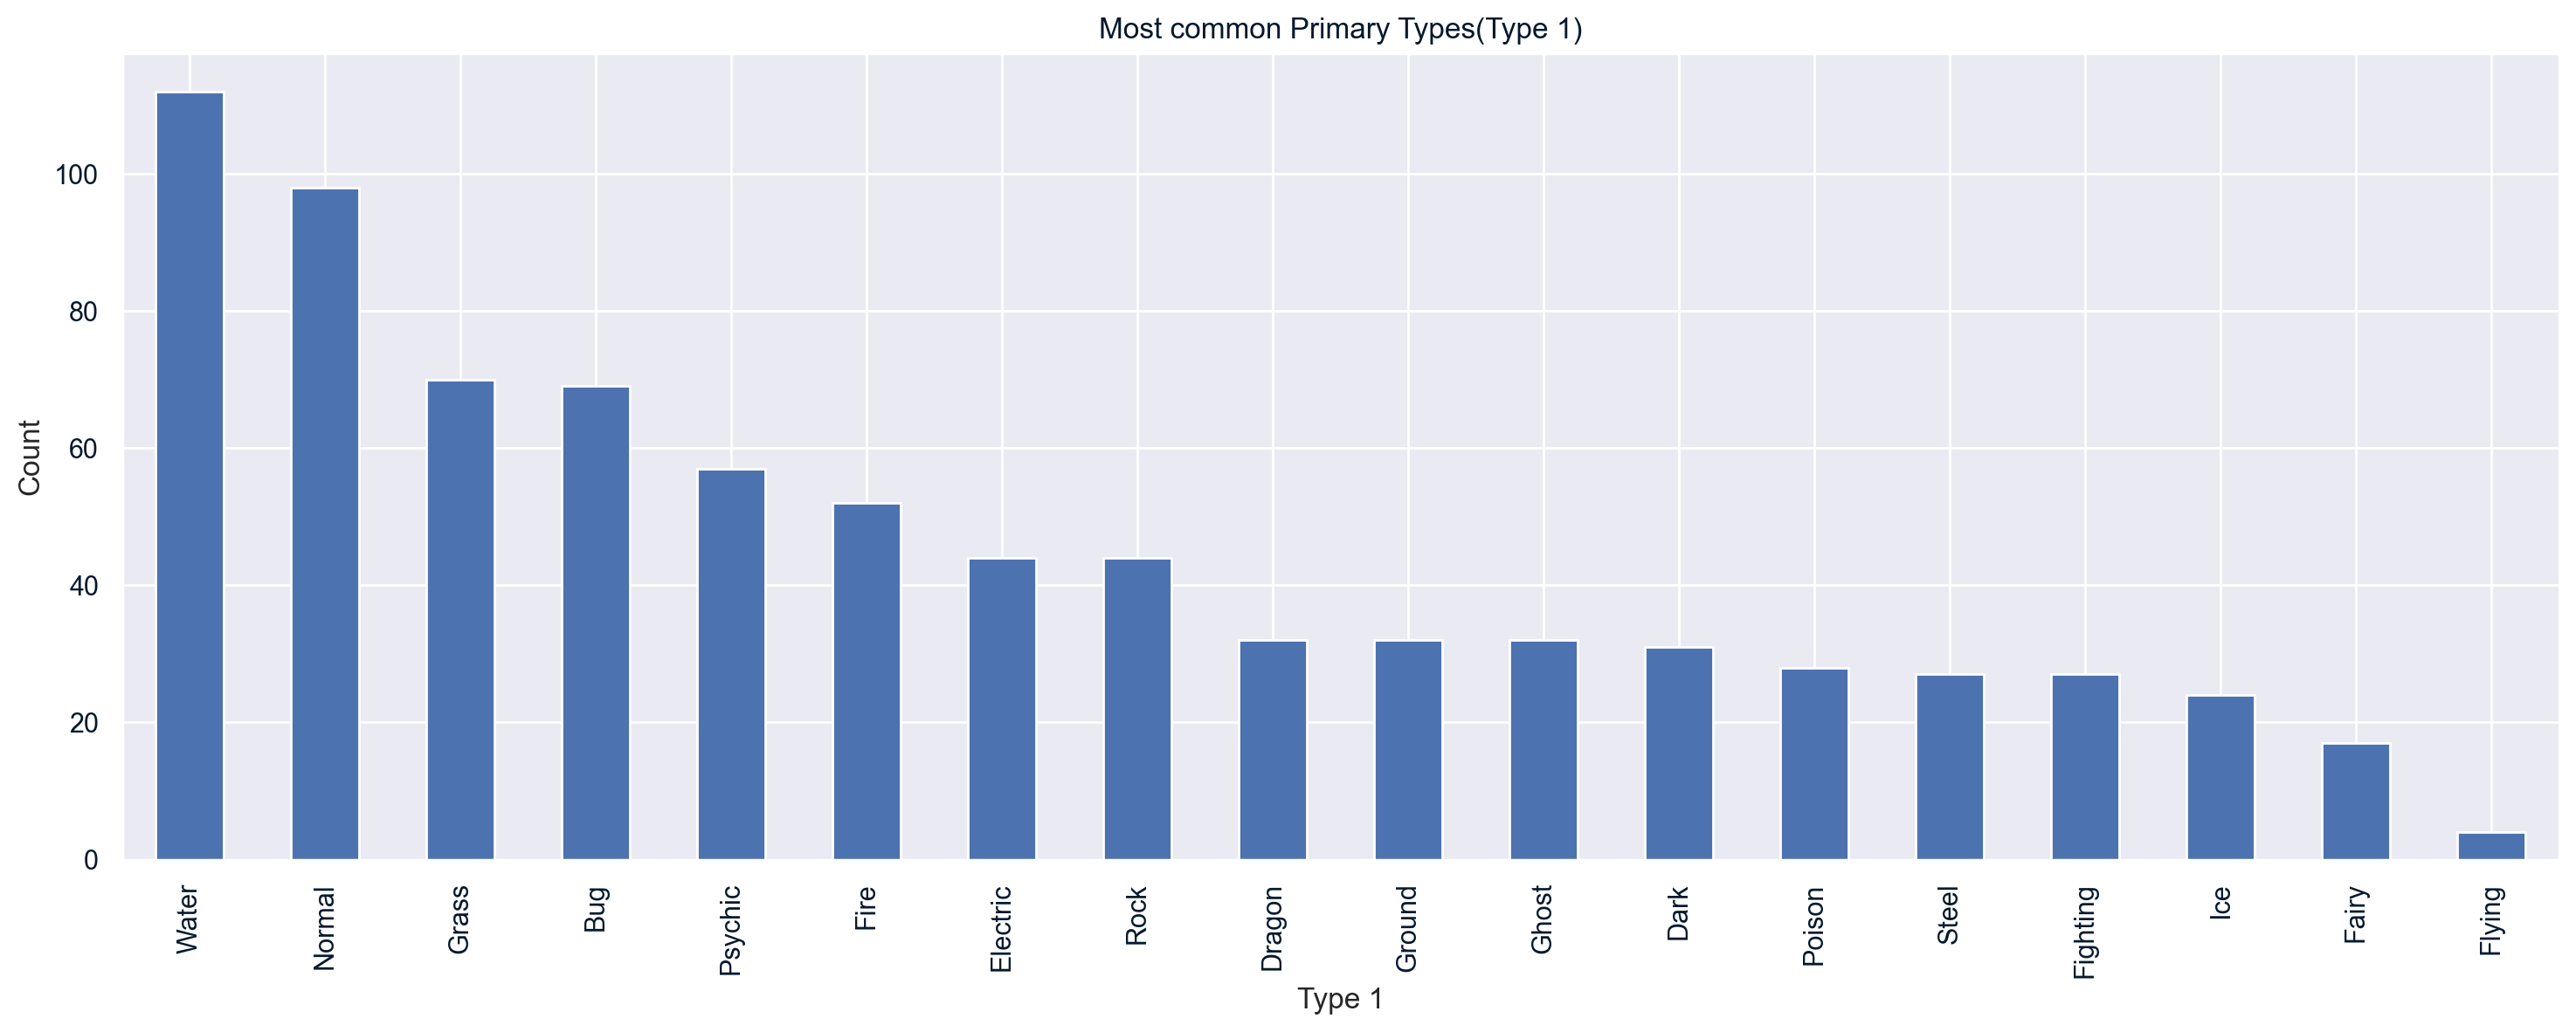

In [6]:
# Setting the visual appearance of seaborn plots
sns.set()

# Counting the occurrences of each "Type 1"
type1_qnt = df['Type 1'].value_counts()

# Creating a bar plot for the number of Pokémon per "Type 1"
plt.figure(figsize=(18, 6))
plt.title('Most common Primary Types(Type 1)')
type1_qnt.plot.bar()
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.show()

In [3]:
# Calculating the percentage of Pokémon with a secondary type
type2_rate = (df[df['Type 2'].notnull()].shape[0] / df.shape[0]) * 100

# Displaying the result
f"{type2_rate:.2f}% of the Pokémon have a secondary type"

'51.75% of the Pokémon have a secondary type'

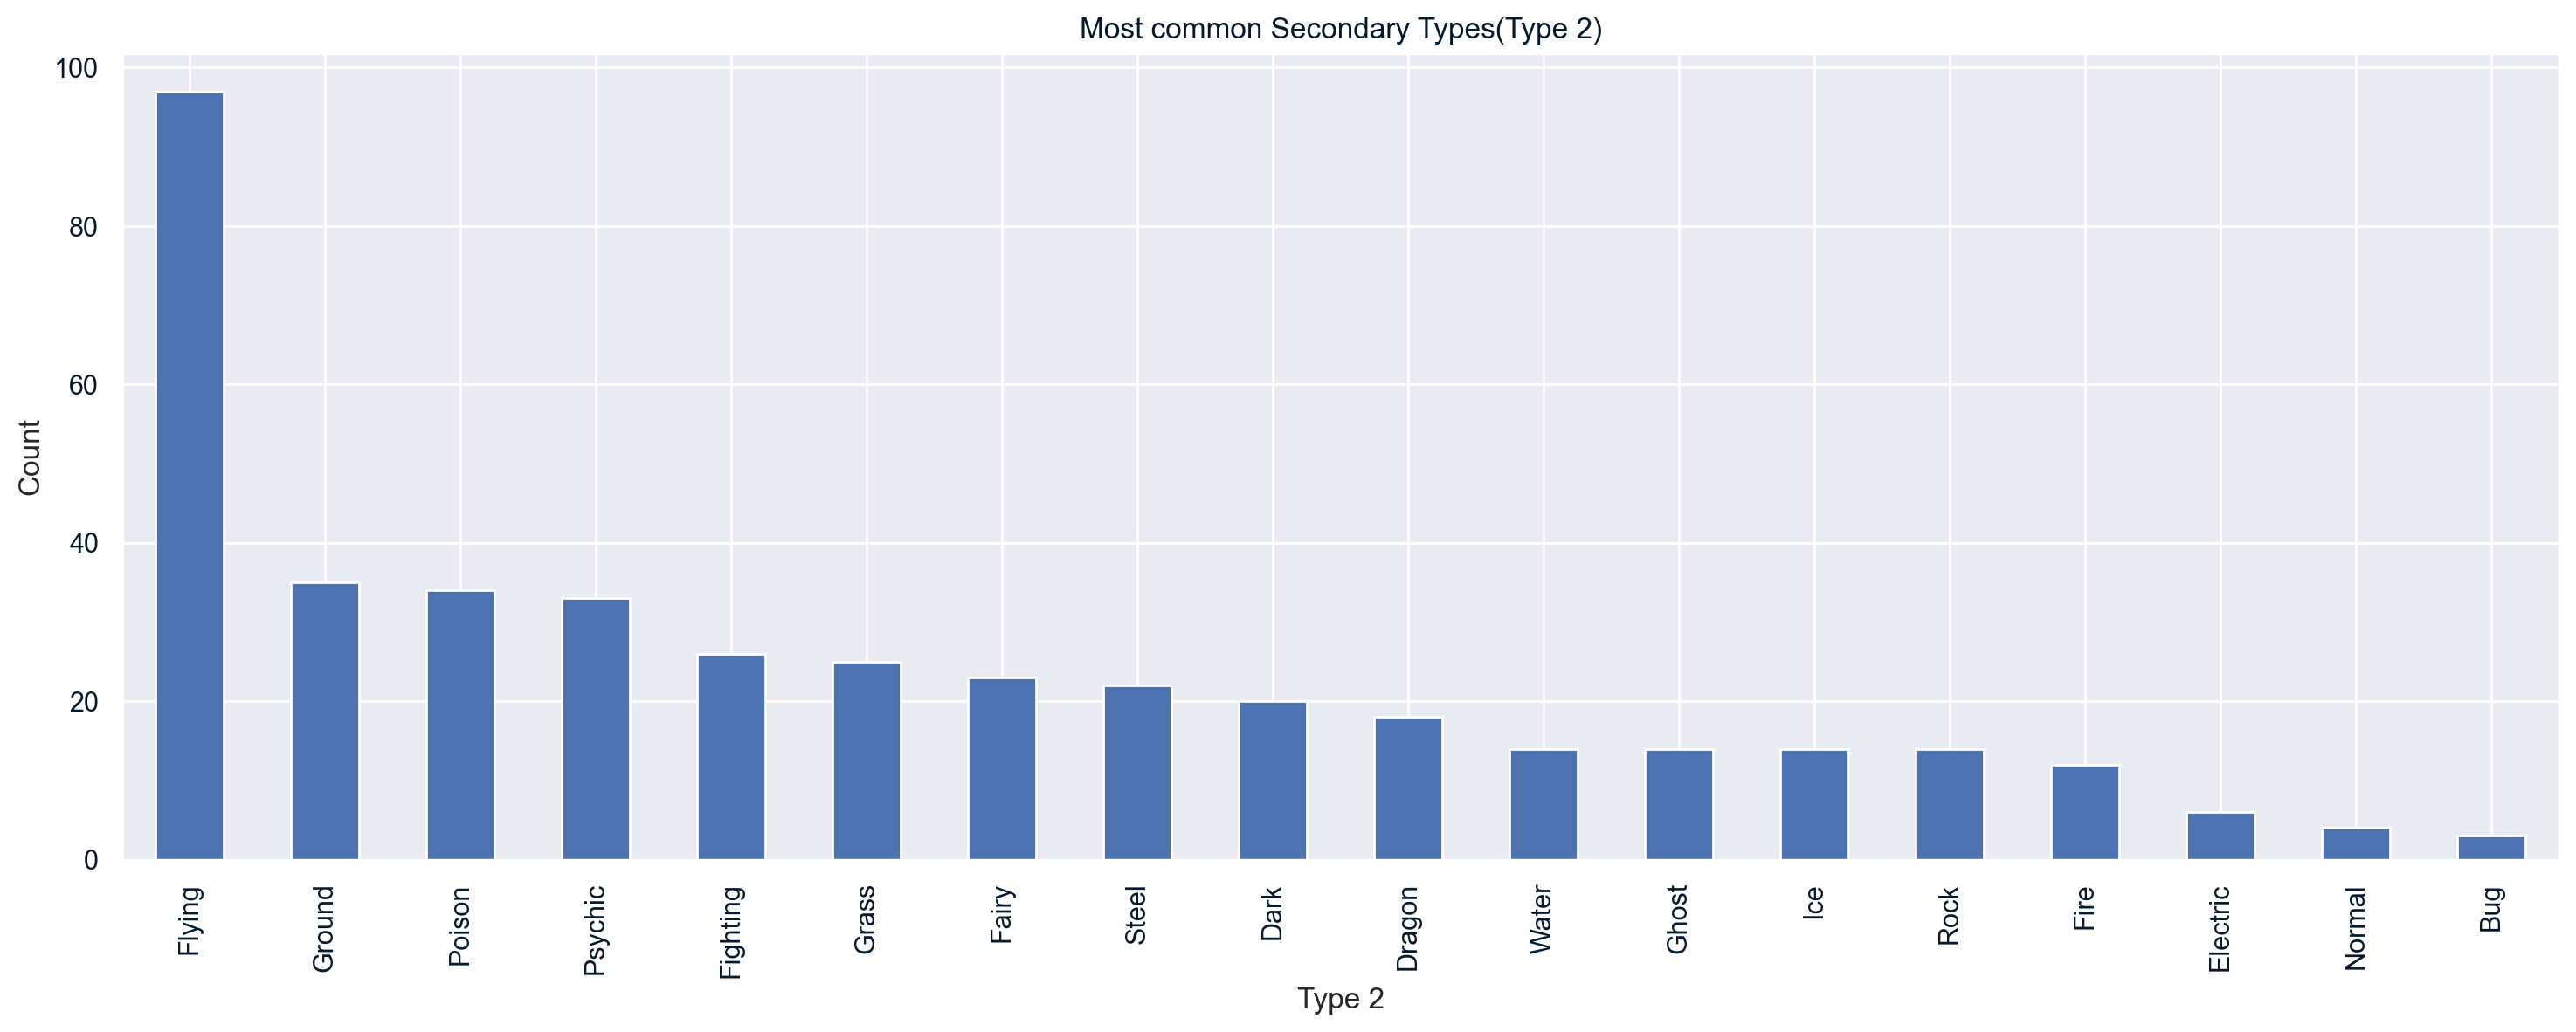

In [59]:


# Setting the visual appearance of seaborn plots
sns.set()

# Counting the occurrences of each "Type 1"
type1_qnt = df['Type 2'].value_counts()

# Creating a bar plot for the number of Pokémon per "Type 1"
plt.figure(figsize=(18, 6))
plt.title('Most common Secondary Types(Type 2)')
type1_qnt.plot.bar()
plt.xlabel('Type 2')
plt.ylabel('Count')
plt.show()

Overall, the most common Primary type is `Water` and secondary type is `Flying`. This makes sense as the Pokemon creatures that live in Water routes have to be Water types and the Pokemon that have wings are more than likely to be classified as flying types

Next we should determine which of the statistics(Attack,Defense,Speed etc.) are most dominant to see gauge their distribution among the Pokemon

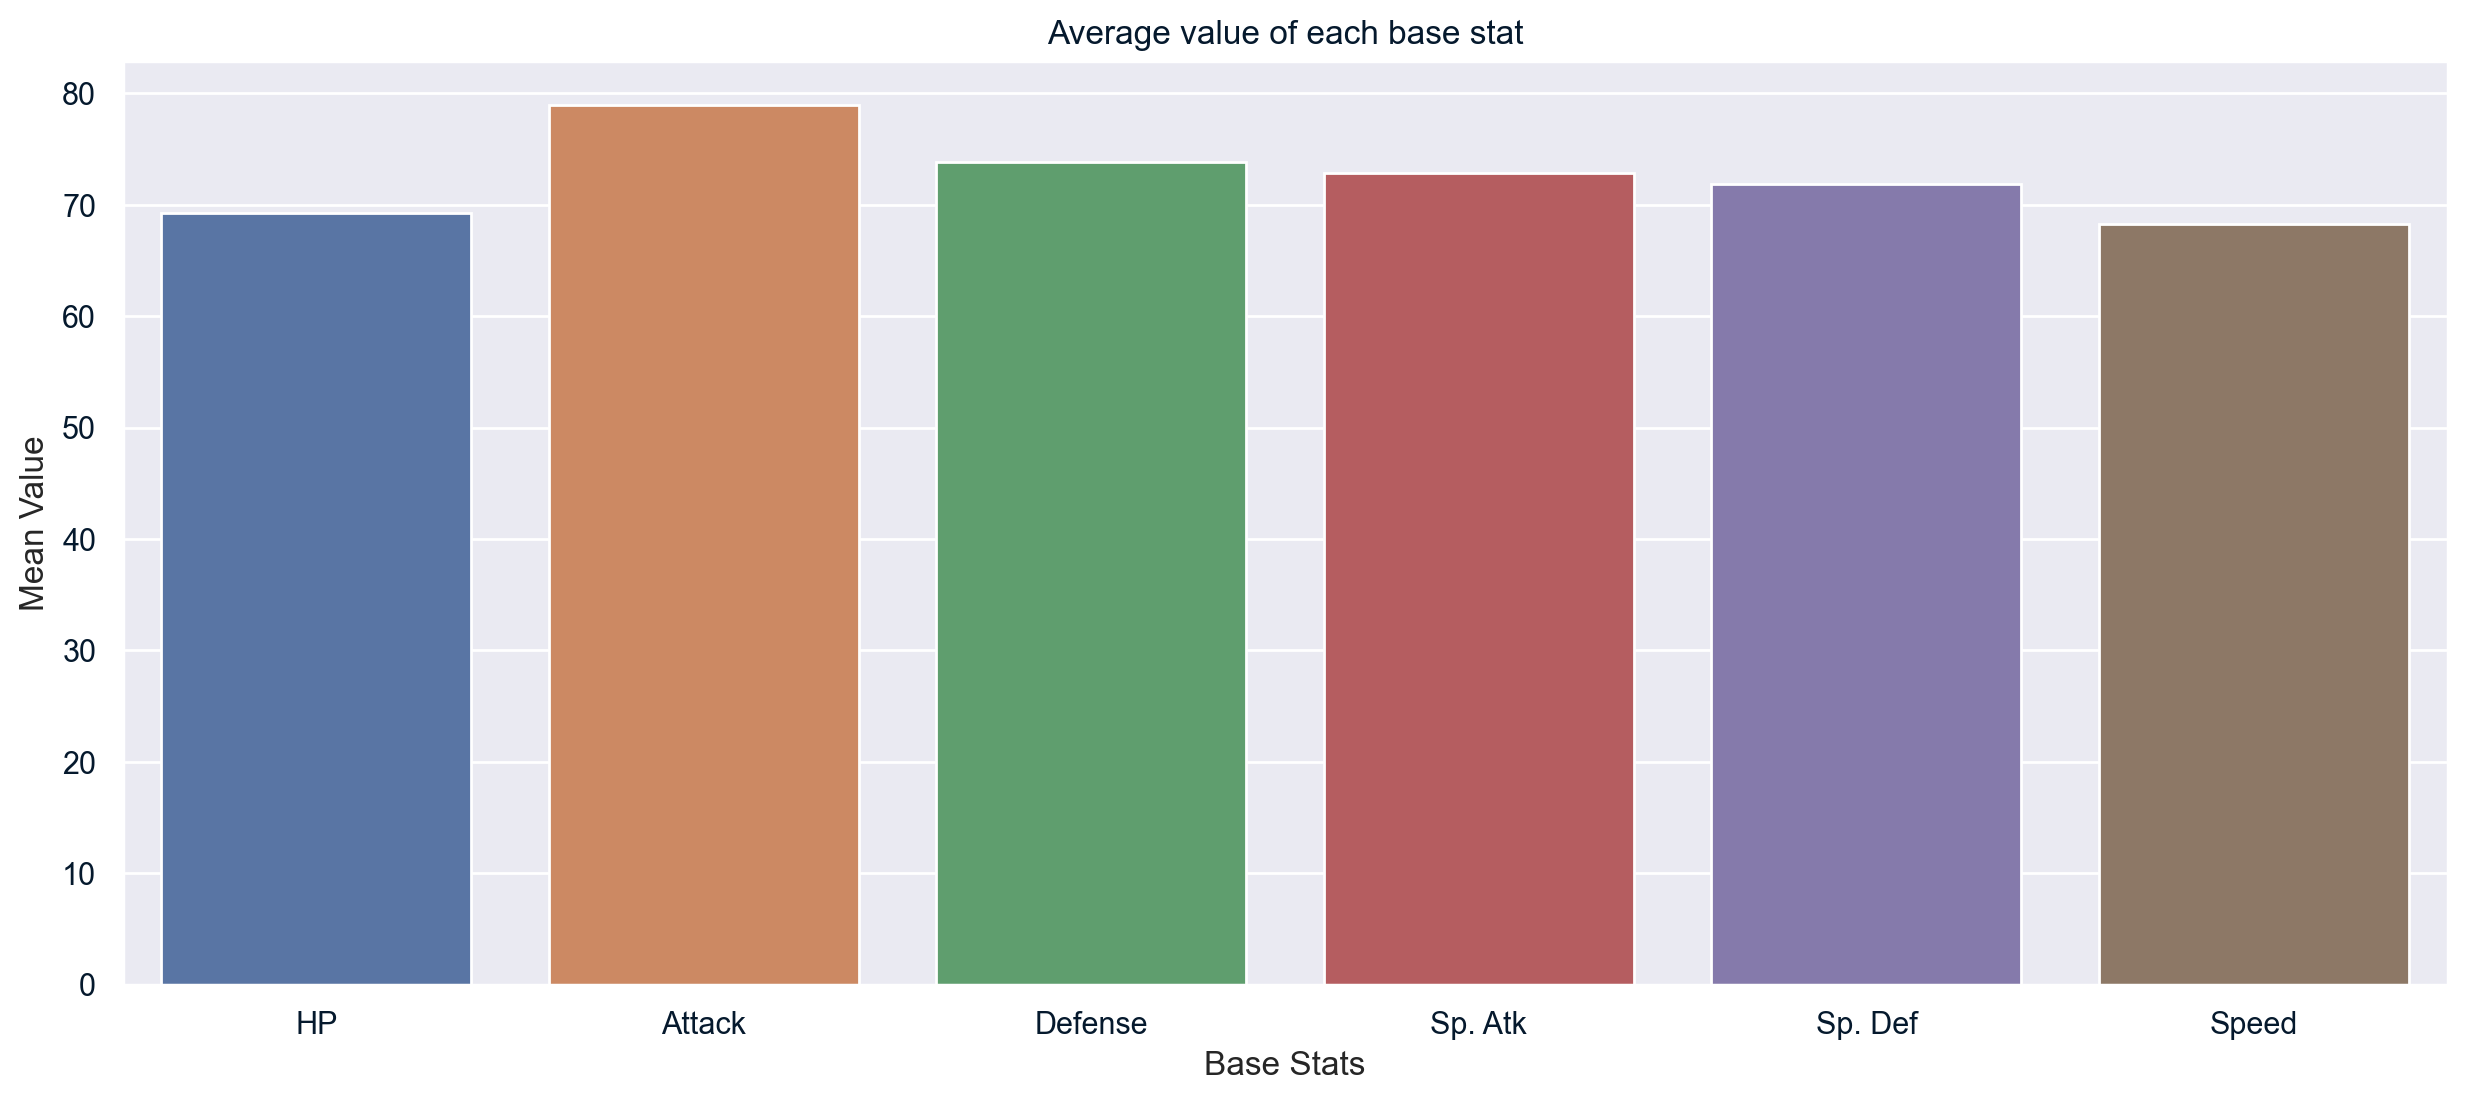

In [60]:

# Assuming 'pokemon' is a DataFrame already defined and loaded with Pokémon data.

def average_stats(stats_list):
    return pokemon[stats_list].mean().tolist()

def average_stats_per_type(type_list, stats_list):
    avg_status = []
    for t in type_list:
        type_mask = (pokemon['Type 1'] == t) | (pokemon['Type 2'] == t)
        avg_status.append(pokemon.loc[type_mask, stats_list].mean().tolist())
    return avg_status

# Cleaning NaN values and ensuring all entries are strings for the types
pokemon[['Type 1', 'Type 2']] = pokemon[['Type 1', 'Type 2']].fillna('None')
types_list = np.unique(pokemon[['Type 1', 'Type 2']].values.astype(str).ravel())

# List of all stats
stats_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calculate average stats
avg_status = average_stats(stats_list)
avg_types_stats = average_stats_per_type(types_list, stats_list)

# Plotting the results
plt.figure(figsize=(15, 6))
plt.title('Average value of each base stat')
plt.xlabel('Base Stats')
plt.ylabel('Mean Value')
sns.barplot(x=stats_list, y=avg_status)
plt.show()


Overall, the statistics are all fairly equal in distribution with `Attack` being the highest. Next we can go into detail about how they are distributed among types

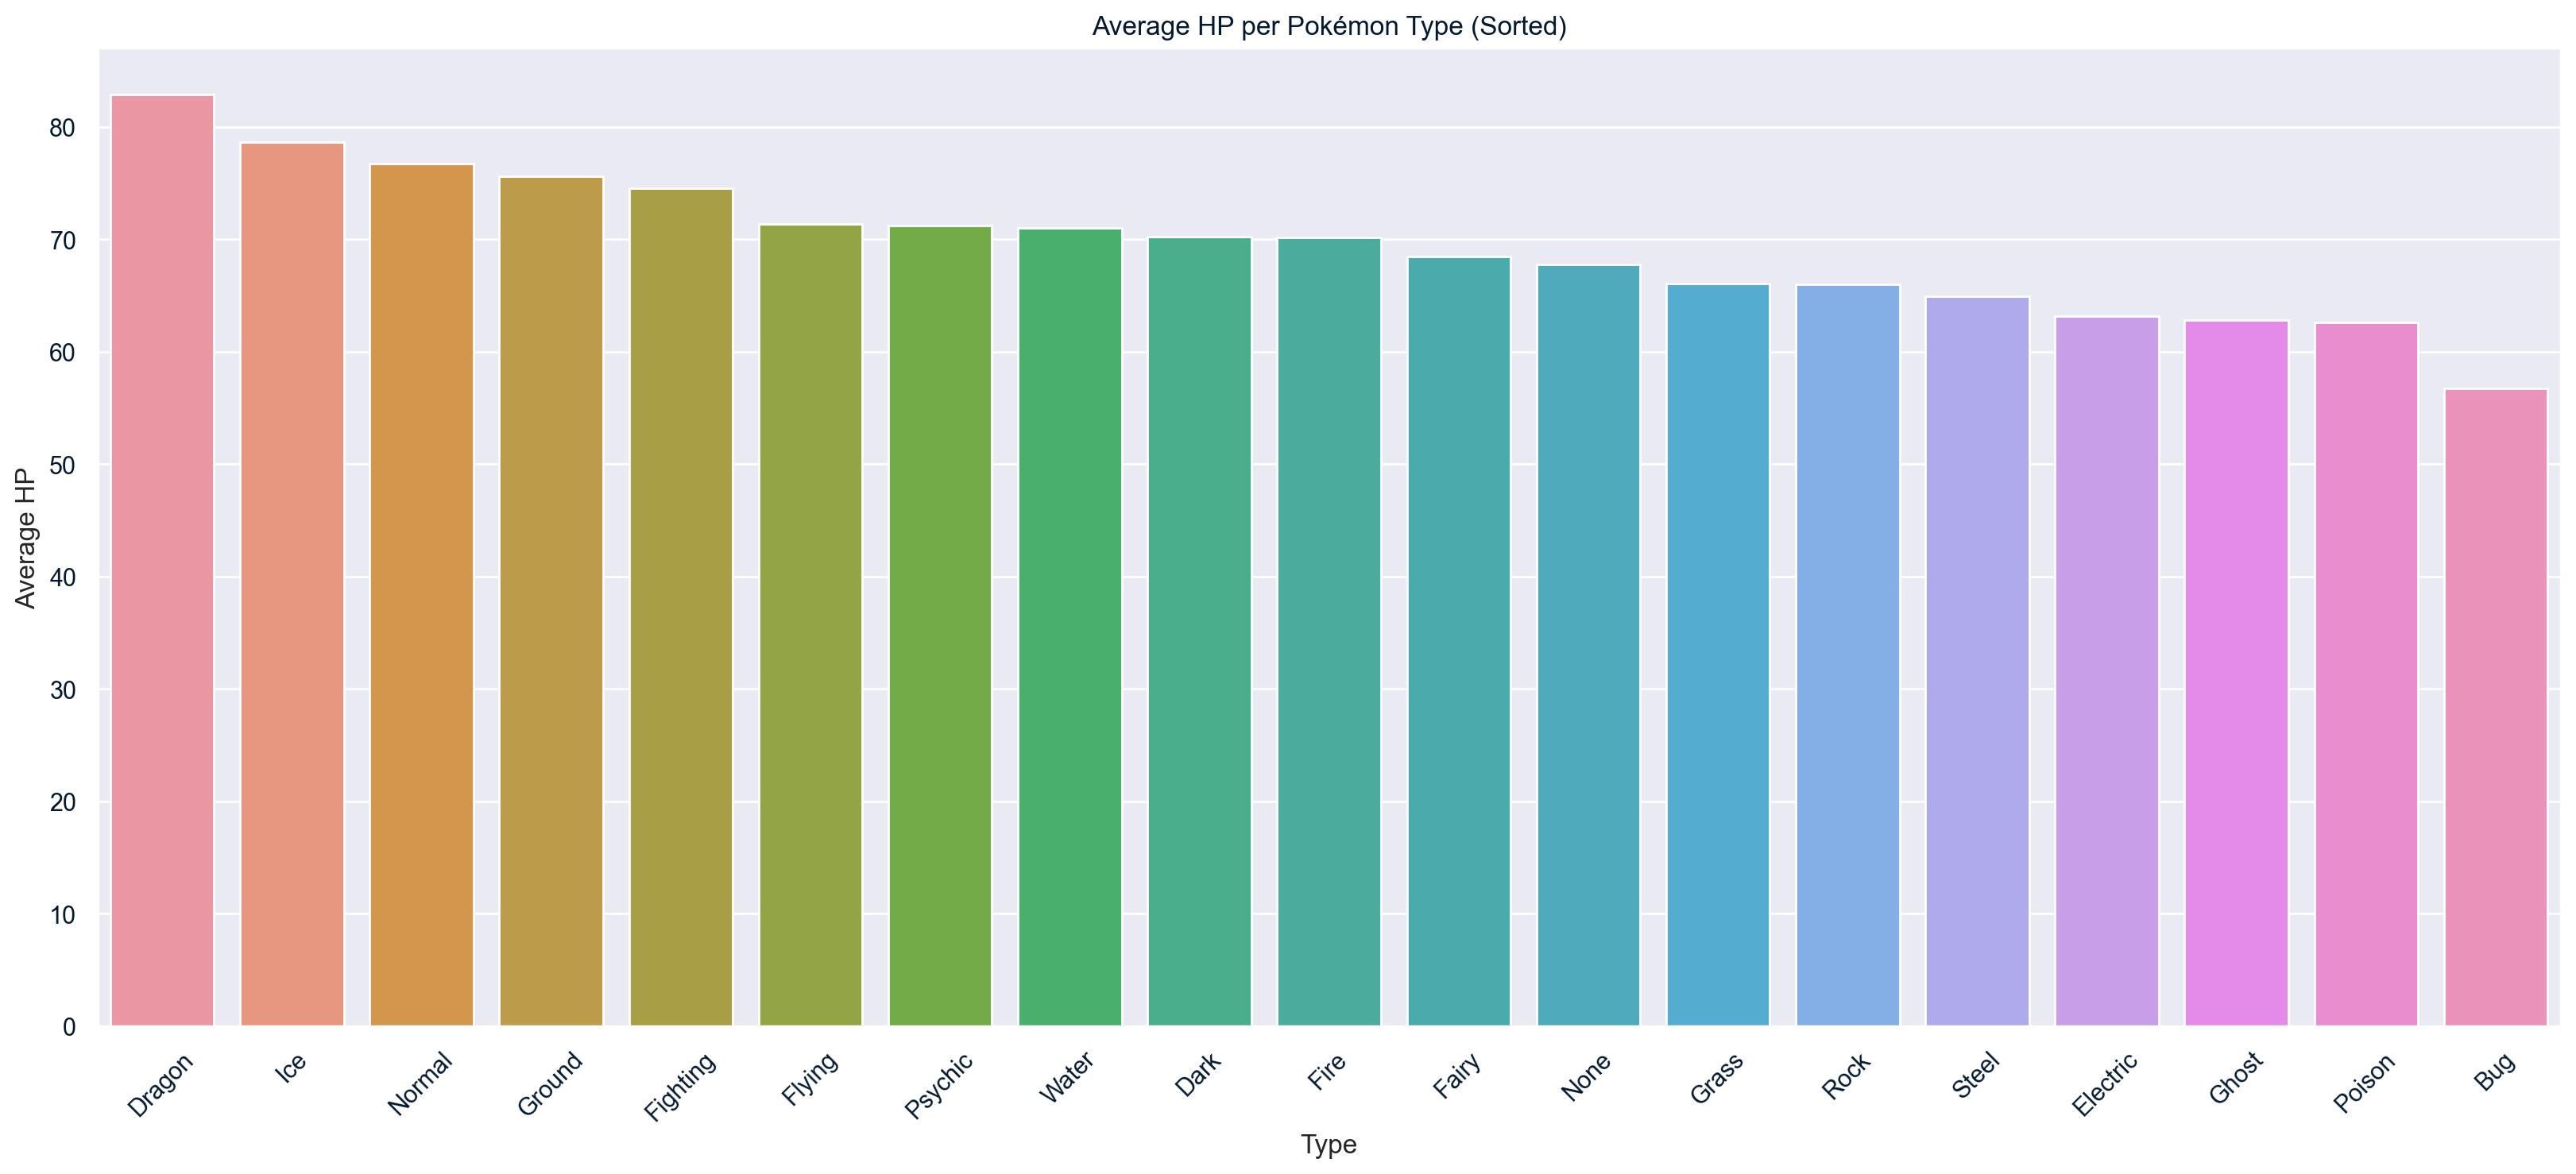

Dragon: 82.9
Ice: 78.63157894736842
Normal: 76.73529411764706
Ground: 75.58208955223881
Fighting: 74.56603773584905
Flying: 71.36633663366337
Psychic: 71.21111111111111
Water: 71.02380952380952
Dark: 70.23529411764706
Fire: 70.15625
Fairy: 68.475
None: 67.76683937823834
Grass: 66.05263157894737
Rock: 66.01724137931035
Steel: 64.95918367346938
Electric: 63.2
Ghost: 62.82608695652174
Poison: 62.596774193548384
Bug: 56.736111111111114


In [61]:
# Assuming avg_hp_values was calculated previously but not shown in the provided cells. 
# We need to calculate avg_hp_values based on the provided functions and data.

# Calculate average HP per type
avg_hp_per_type = average_stats_per_type(types_list, ['HP'])

# Extracting just the HP values from the results
avg_hp_values = [hp[0] for hp in avg_hp_per_type]  # Assuming each entry in avg_hp_per_type contains a list with a single HP value

# Sorting the average HP per type in descending order along with their corresponding types
sorted_indices = np.argsort(-np.array(avg_hp_values))  # Get indices of sorted avg_hp_values in descending order
sorted_avg_hp_values = np.array(avg_hp_values)[sorted_indices]
sorted_types_list = np.array(types_list)[sorted_indices]

# Plotting the results after sorting
plt.figure(figsize=(20, 8))
plt.title('Average HP per Pokémon Type (Sorted)')
plt.xlabel('Type')
plt.ylabel('Average HP')
sns.barplot(x=sorted_types_list, y=sorted_avg_hp_values)
plt.xticks(rotation=45)  # Rotate the type names for better readability
plt.show()

# Printing out the sorted types and their corresponding average HP values
for type, hp in zip(sorted_types_list, sorted_avg_hp_values):
    print(f"{type}: {hp}")

`Dragon` and `Ice` are the seemingly "bulkiest" pokemon in terms of Hit Points while `Bug` is the weakest in terms of having hit points

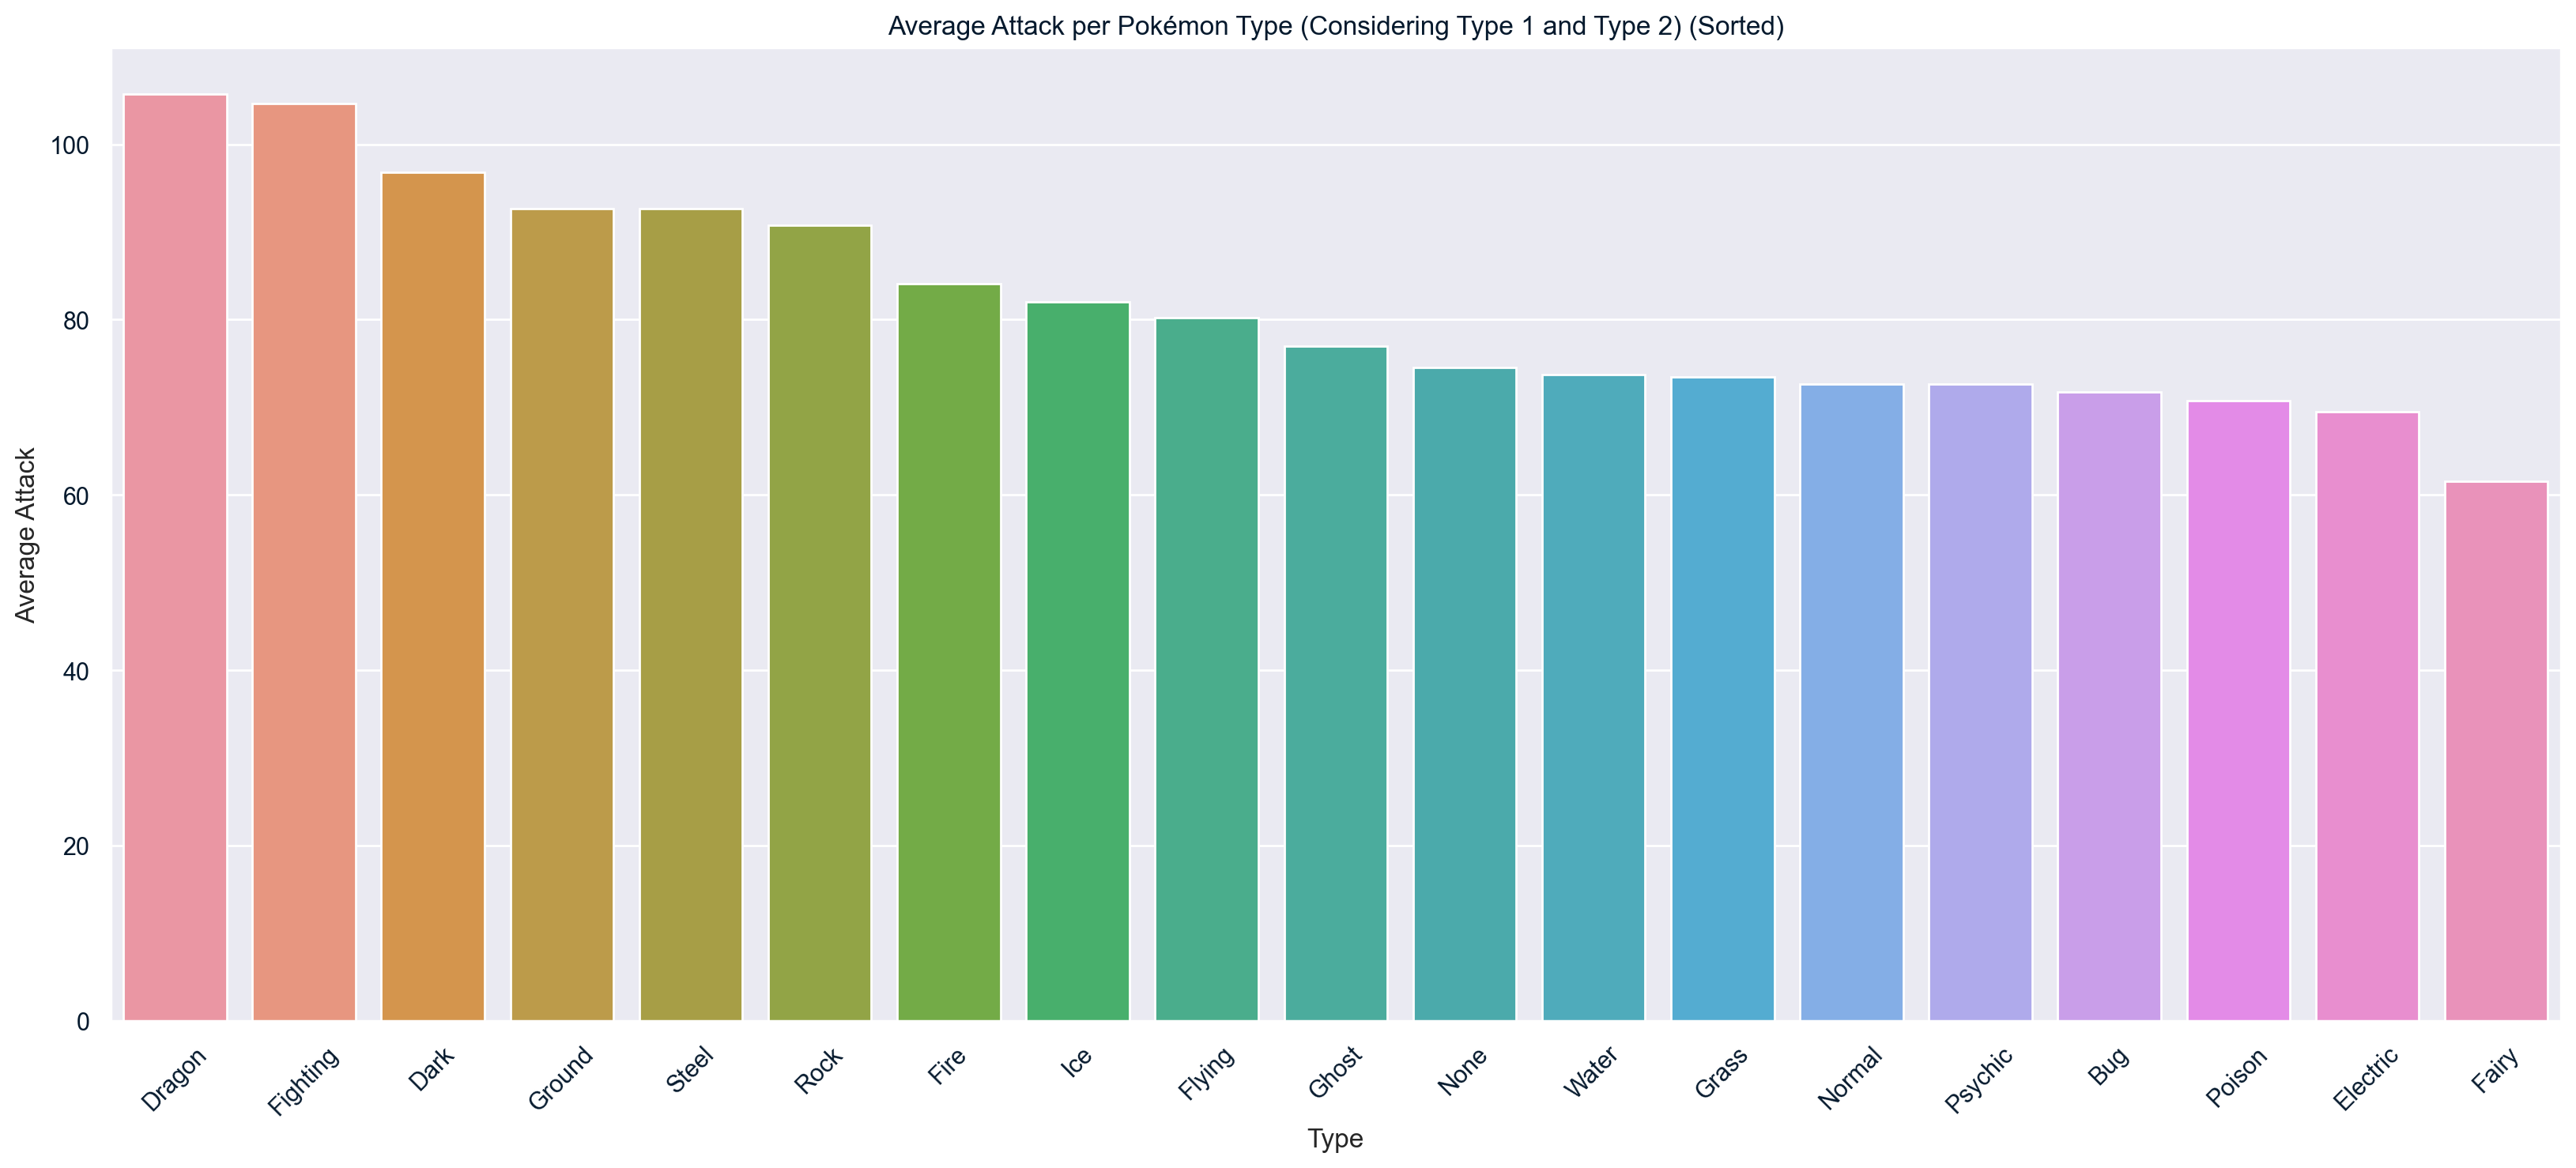

Dragon: 105.76
Fighting: 104.66037735849056
Dark: 96.7843137254902
Ground: 92.67164179104478
Steel: 92.65306122448979
Rock: 90.72413793103448
Fire: 84.109375
Ice: 82.05263157894737
Flying: 80.22772277227723
Ghost: 76.93478260869566
None: 74.52590673575129
Water: 73.7063492063492
Grass: 73.46315789473684
Normal: 72.65686274509804
Psychic: 72.64444444444445
Bug: 71.76388888888889
Poison: 70.79032258064517
Electric: 69.52
Fairy: 61.575


In [62]:
# Adjusting the dataset to include Type 2 in the calculation
# Merging Type 1 and Type 2 into a single column for a unified type view
type_1 = pokemon[['Type 1', 'Attack']].rename(columns={'Type 1': 'Type'})
type_2 = pokemon[['Type 2', 'Attack']].rename(columns={'Type 2': 'Type'}).dropna()  # Drop rows where Type 2 is NaN

# Combining Type 1 and Type 2 data
combined_types = pd.concat([type_1, type_2])

# Calculating the average Attack per Pokémon type, considering both Type 1 and Type 2
type_attack_combined = combined_types.groupby('Type')['Attack'].mean().reset_index()

# Extracting the types and their average Attack values
types_list = type_attack_combined['Type'].values
avg_attack_values = type_attack_combined['Attack'].values

# Sorting the average Attack per type in descending order along with their corresponding types
sorted_indices = np.argsort(-np.array(avg_attack_values))  # Get indices of sorted avg_attack_values in descending order
sorted_avg_attack_values = np.array(avg_attack_values)[sorted_indices]
sorted_types_list = np.array(types_list)[sorted_indices]

# Plotting the results after sorting
plt.figure(figsize=(20, 8))
plt.title('Average Attack per Pokémon Type (Considering Type 1 and Type 2) (Sorted)')
plt.xlabel('Type')
plt.ylabel('Average Attack')
sns.barplot(x=sorted_types_list, y=sorted_avg_attack_values)
plt.xticks(rotation=45)  # Rotate the type names for better readability
plt.show()

# Printing out the sorted types and their corresponding average attack values
for type, attack in zip(sorted_types_list, sorted_avg_attack_values):
    print(f"{type}: {attack}")

`Dragon` and `Fighting` have the highest average `Attack` stat while `Fairy` is the weakest. This makes sense as `Fairy` type moves are generally `Special Attack`

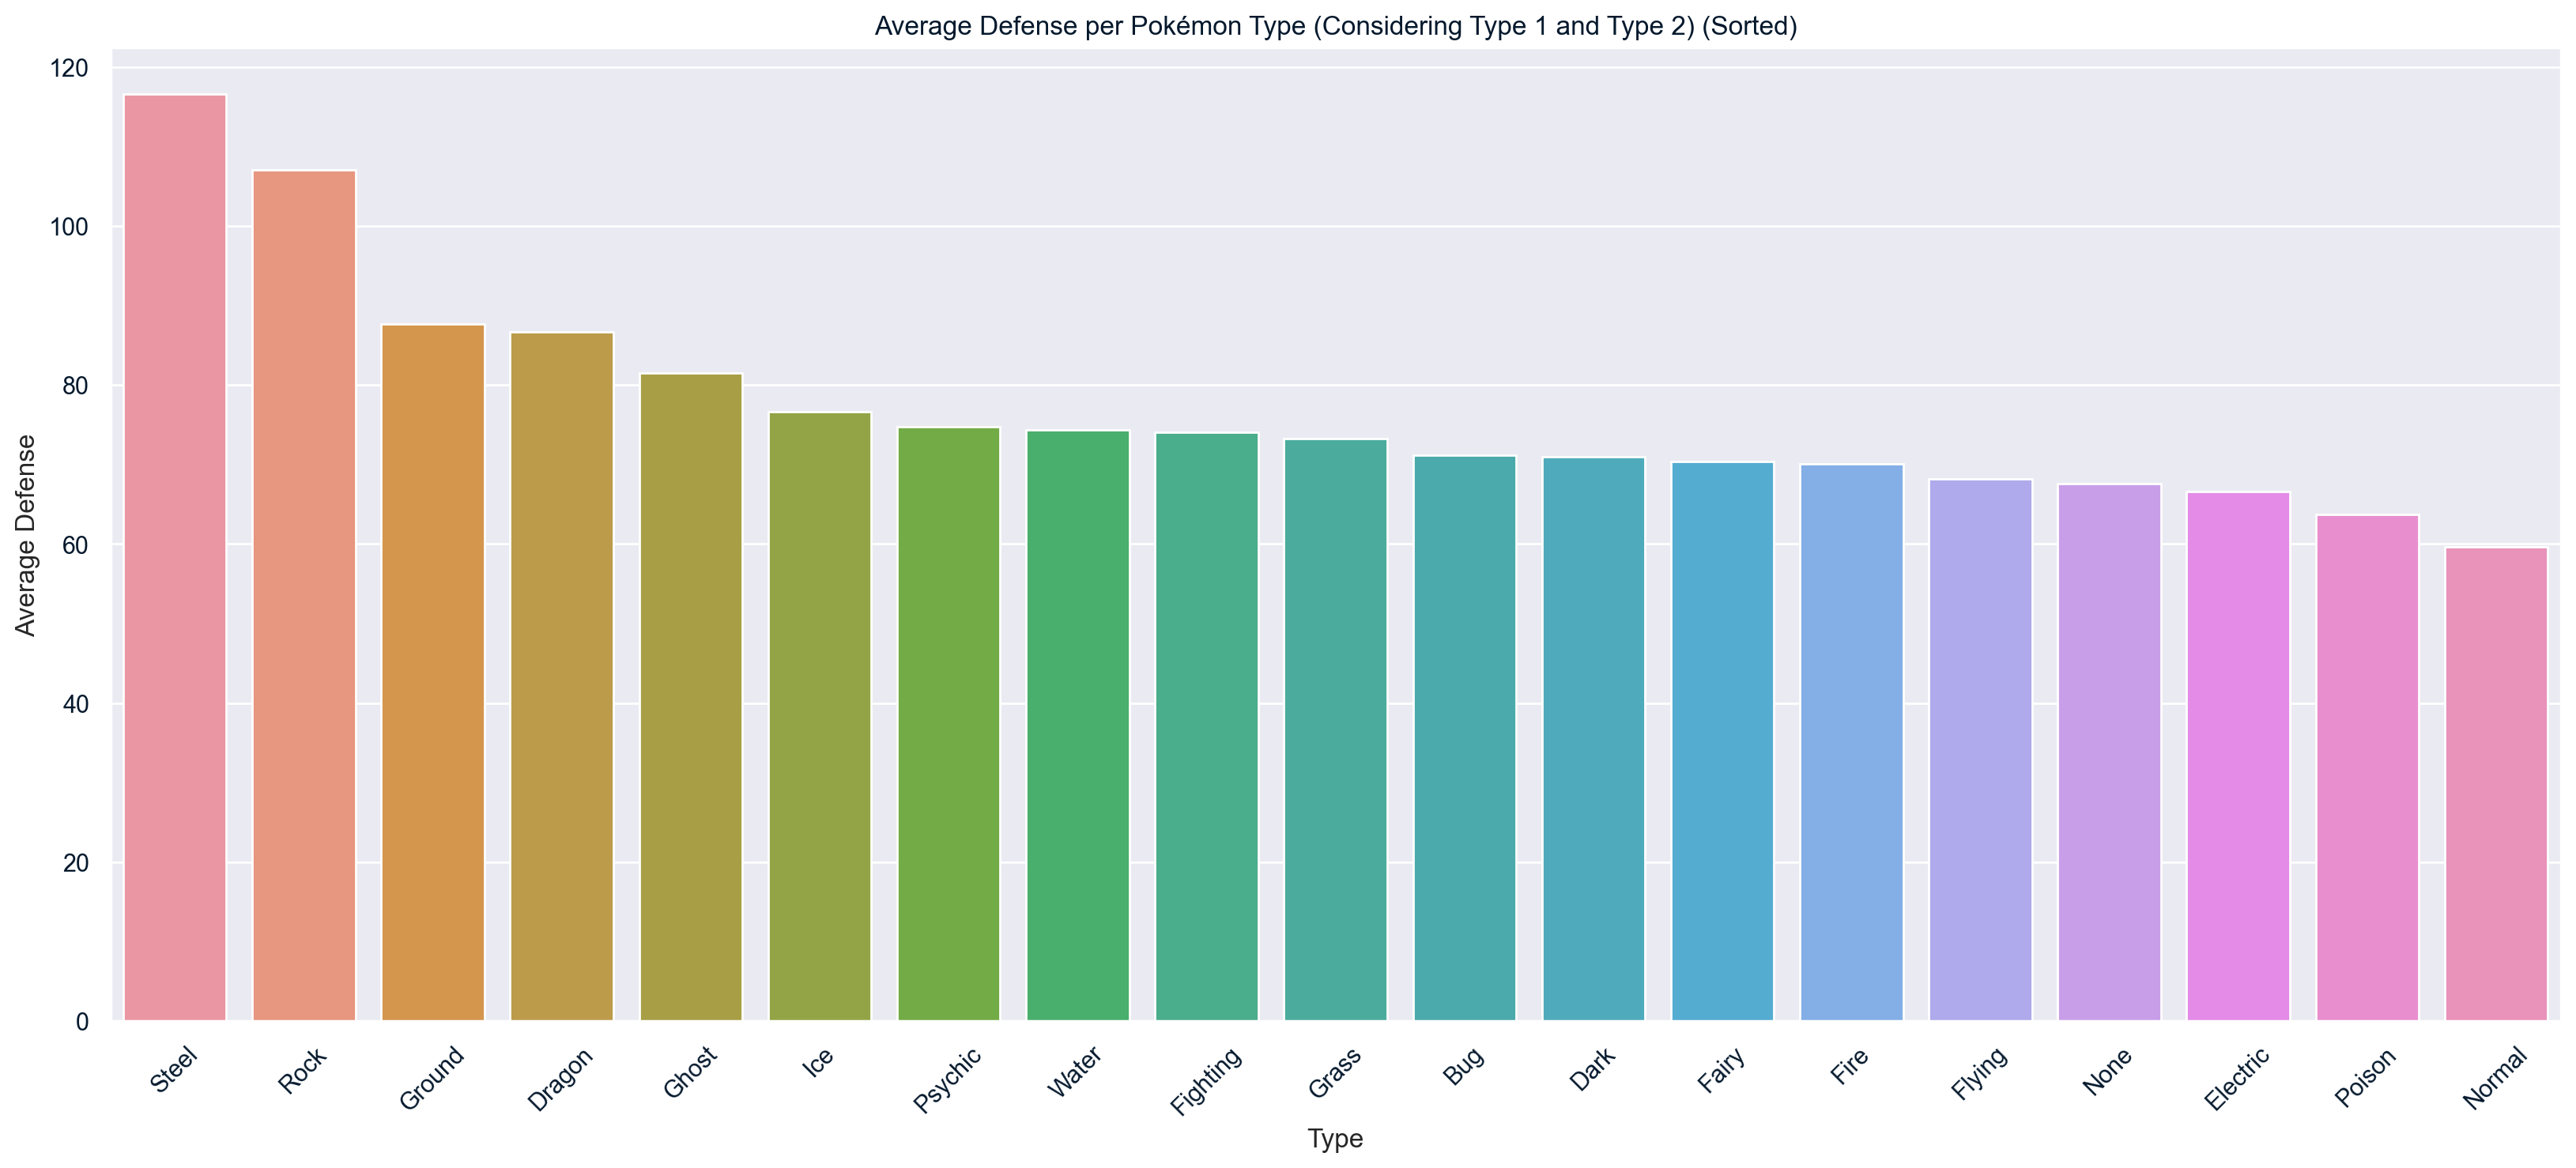

Steel: 116.61224489795919
Rock: 107.08620689655173
Ground: 87.70149253731343
Dragon: 86.62
Ghost: 81.52173913043478
Ice: 76.65789473684211
Psychic: 74.77777777777777
Water: 74.2936507936508
Fighting: 74.05660377358491
Grass: 73.25263157894737
Bug: 71.11111111111111
Dark: 70.94117647058823
Fairy: 70.4
Fire: 70.09375
Flying: 68.22772277227723
None: 67.58549222797927
Electric: 66.54
Poison: 63.74193548387097
Normal: 59.6078431372549


In [63]:
# Adjusting the dataset to include Type 2 in the calculation
# Merging Type 1 and Type 2 into a single column for a unified type view
type_1_defense = pokemon[['Type 1', 'Defense']].rename(columns={'Type 1': 'Type'})
type_2_defense = pokemon[['Type 2', 'Defense']].rename(columns={'Type 2': 'Type'}).dropna()  # Drop rows where Type 2 is NaN

# Combining Type 1 and Type 2 data for Defense
combined_types_defense = pd.concat([type_1_defense, type_2_defense])

# Calculating the average Defense per Pokémon type, considering both Type 1 and Type 2
type_defense_combined = combined_types_defense.groupby('Type')['Defense'].mean().reset_index()

# Extracting the types and their average Defense values
types_list_defense = type_defense_combined['Type'].values
avg_defense_values = type_defense_combined['Defense'].values

# Sorting the average Defense per type in descending order along with their corresponding types
sorted_indices_defense = np.argsort(-np.array(avg_defense_values))  # Get indices of sorted avg_defense_values in descending order
sorted_avg_defense_values = np.array(avg_defense_values)[sorted_indices_defense]
sorted_types_list_defense = np.array(types_list_defense)[sorted_indices_defense]

# Plotting the results after sorting
plt.figure(figsize=(20, 8))
plt.title('Average Defense per Pokémon Type (Considering Type 1 and Type 2) (Sorted)')
plt.xlabel('Type')
plt.ylabel('Average Defense')
sns.barplot(x=sorted_types_list_defense, y=sorted_avg_defense_values)
plt.xticks(rotation=45)  # Rotate the type names for better readability
plt.show()

# Printing out the sorted types and their corresponding average defense values
for type, defense in zip(sorted_types_list_defense, sorted_avg_defense_values):
    print(f"{type}: {defense}")

`Steel`, `Rock`, and `Ground` are all primarily defensive types while `Normal` is the weakest in terms of defense.

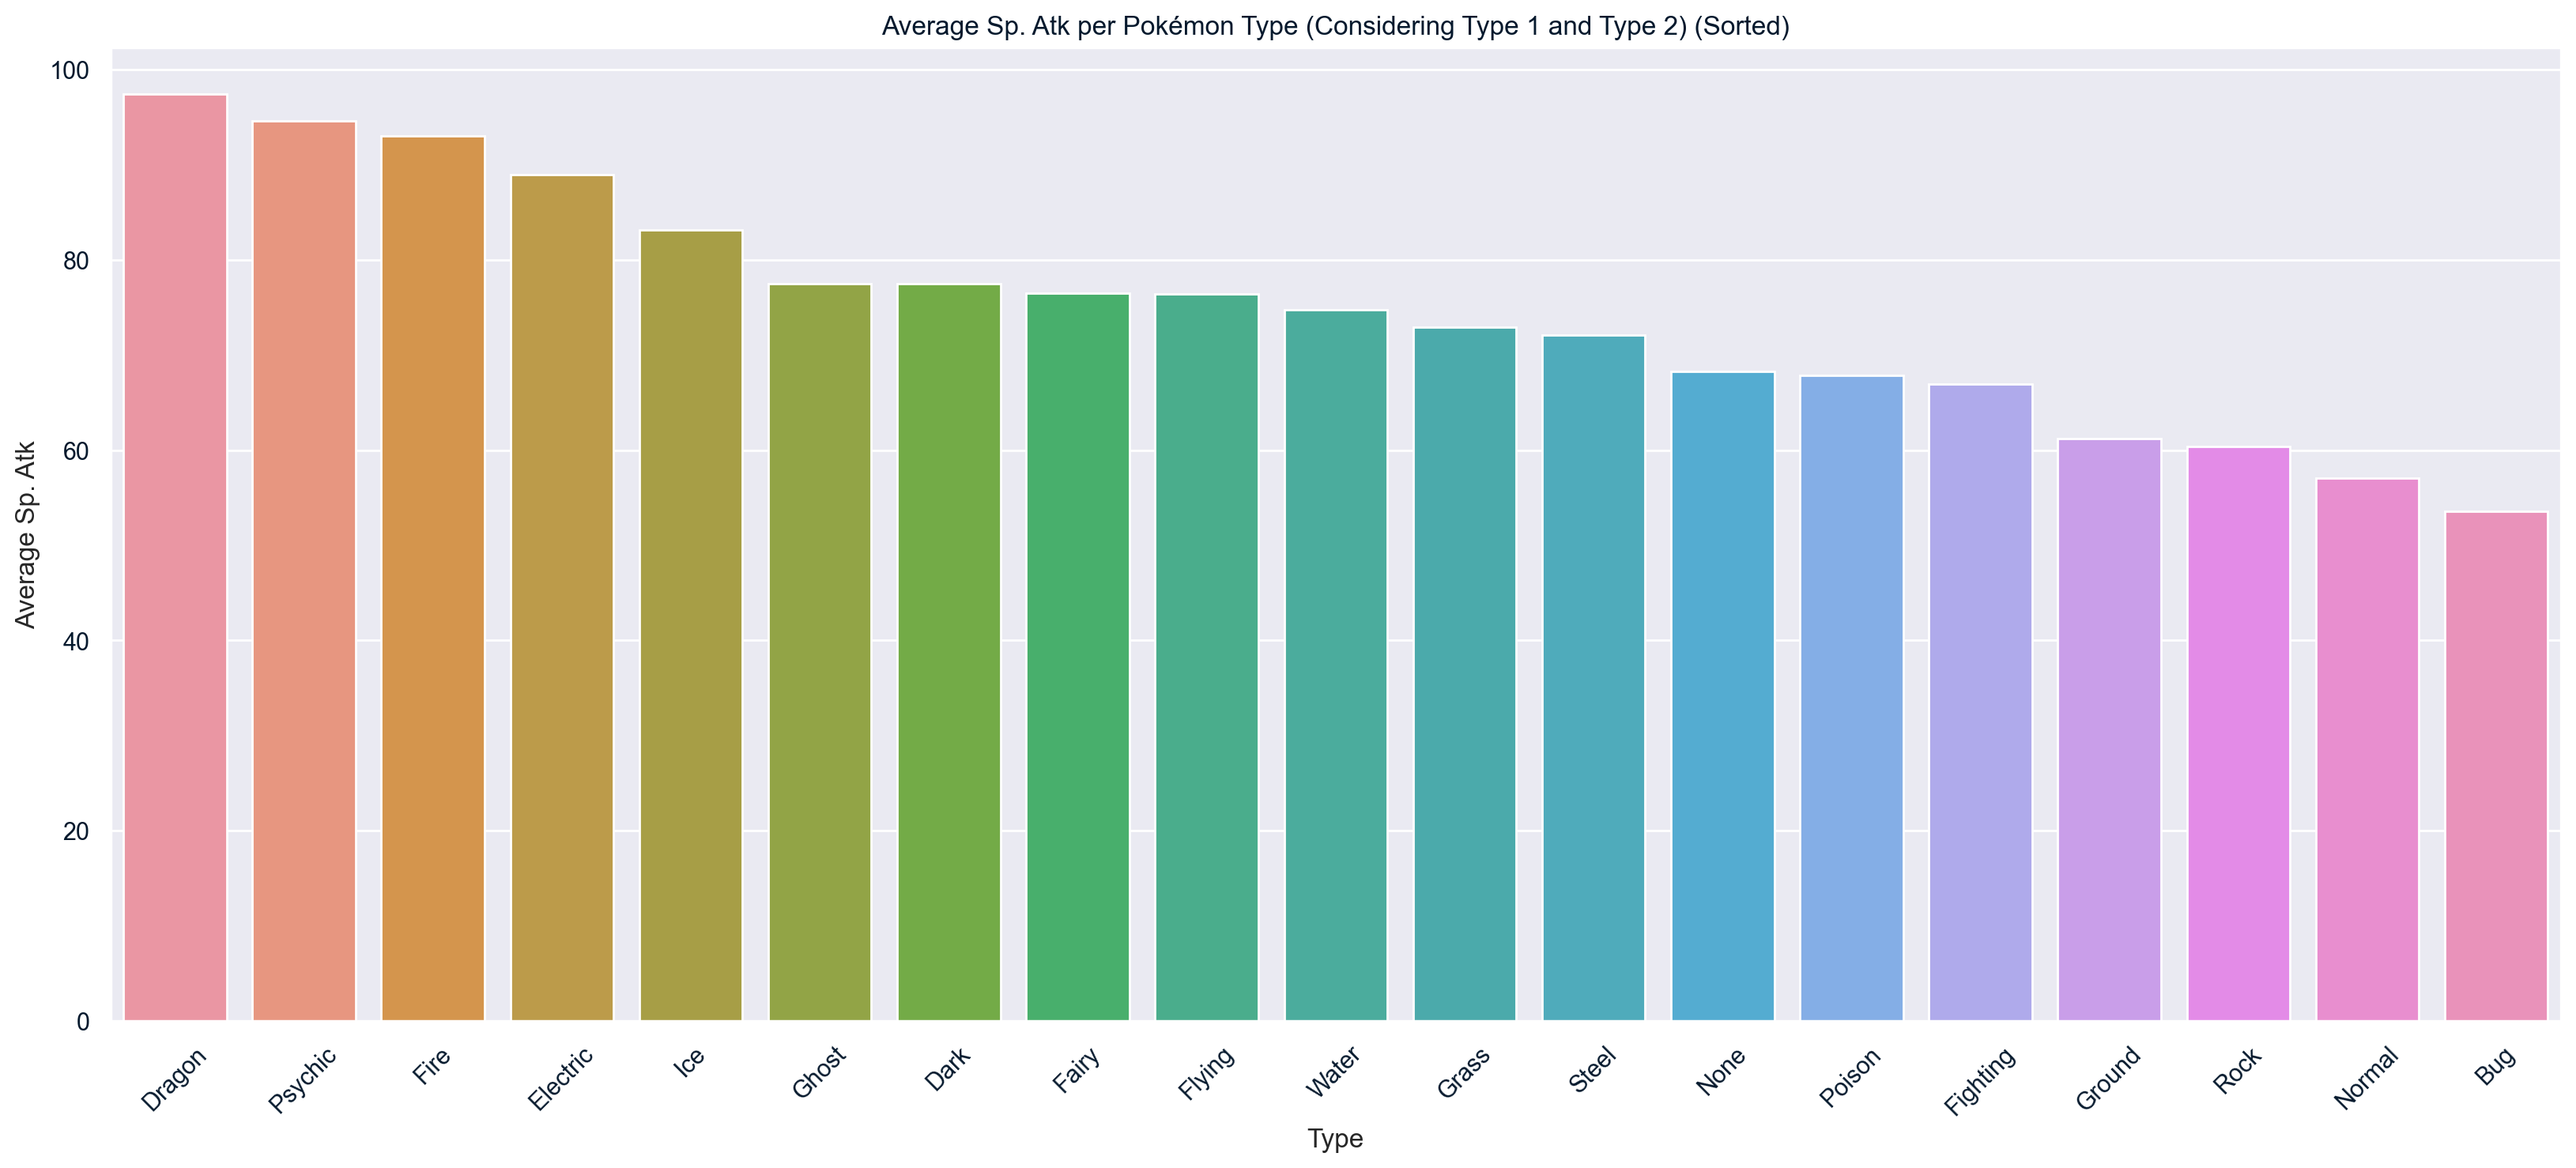

Dragon: 97.44
Psychic: 94.6
Fire: 93.0
Electric: 88.96
Ice: 83.10526315789474
Ghost: 77.47826086956522
Dark: 77.45098039215686
Fairy: 76.5
Flying: 76.36633663366337
Water: 74.77777777777777
Grass: 72.93684210526315
Steel: 72.10204081632654
None: 68.28497409326425
Poison: 67.88709677419355
Fighting: 66.9245283018868
Ground: 61.208955223880594
Rock: 60.39655172413793
Normal: 57.07843137254902
Bug: 53.56944444444444


In [64]:
# Adjusting the dataset to include Type 2 in the calculation for Sp. Atk
type_1_sp_atk = pokemon[['Type 1', 'Sp. Atk']].rename(columns={'Type 1': 'Type'})
type_2_sp_atk = pokemon[['Type 2', 'Sp. Atk']].rename(columns={'Type 2': 'Type'}).dropna()  # Drop rows where Type 2 is NaN

# Combining Type 1 and Type 2 data for Sp. Atk
combined_types_sp_atk = pd.concat([type_1_sp_atk, type_2_sp_atk])

# Calculating the average Sp. Atk per Pokémon type, considering both Type 1 and Type 2
type_sp_attack_combined = combined_types_sp_atk.groupby('Type')['Sp. Atk'].mean().reset_index()

# Extracting the types and their average Sp. Atk values
types_list = type_sp_attack_combined['Type'].values
avg_sp_attack_values = type_sp_attack_combined['Sp. Atk'].values

# Sorting the average Sp. Atk per type in descending order along with their corresponding types
sorted_indices = np.argsort(-np.array(avg_sp_attack_values))  # Get indices of sorted avg_sp_attack_values in descending order
sorted_avg_sp_attack_values = np.array(avg_sp_attack_values)[sorted_indices]
sorted_types_list = np.array(types_list)[sorted_indices]

# Plotting the results after sorting
plt.figure(figsize=(20, 8))
plt.title('Average Sp. Atk per Pokémon Type (Considering Type 1 and Type 2) (Sorted)')
plt.xlabel('Type')
plt.ylabel('Average Sp. Atk')
sns.barplot(x=sorted_types_list, y=sorted_avg_sp_attack_values)
plt.xticks(rotation=45)  # Rotate the type names for better readability
plt.show()

# Printing out the sorted types and their corresponding average Sp. Atk values
for type, sp_atk in zip(sorted_types_list, sorted_avg_sp_attack_values):
    print(f"{type}: {sp_atk}")

`Dragon`, `Psychic`, and `Fire` have the highest `Sp.Atk` while Bug is the weakest in that department

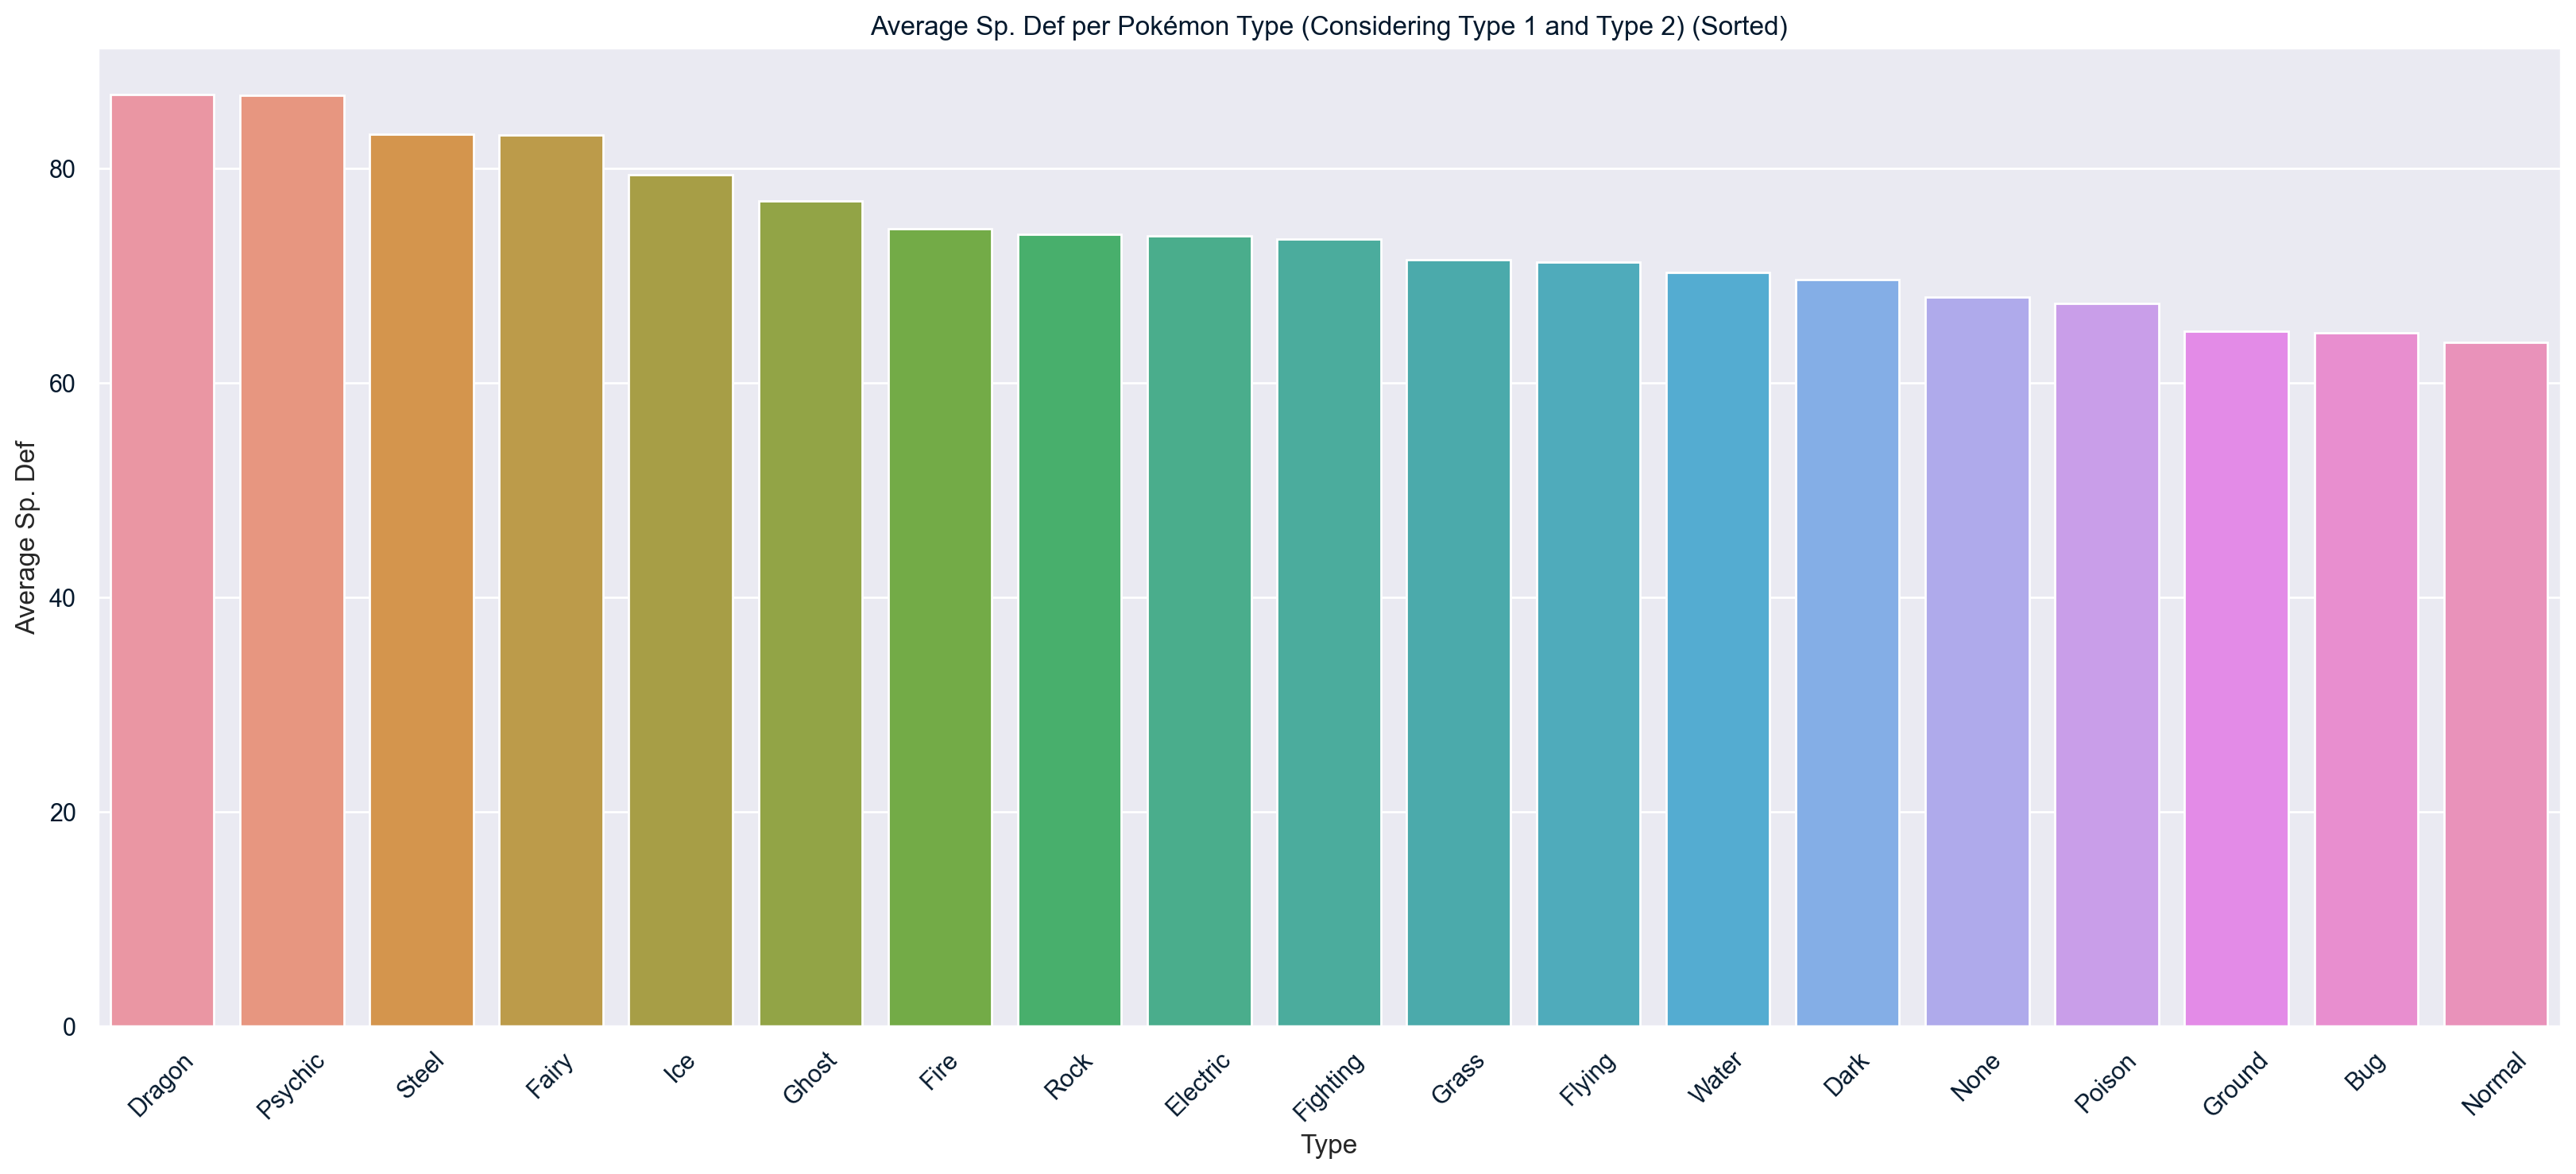

Dragon: 86.9
Psychic: 86.76666666666667
Steel: 83.16326530612245
Fairy: 83.125
Ice: 79.42105263157895
Ghost: 76.95652173913044
Fire: 74.328125
Rock: 73.8103448275862
Electric: 73.68
Fighting: 73.37735849056604
Grass: 71.50526315789473
Flying: 71.25742574257426
Water: 70.30952380952381
Dark: 69.6470588235294
None: 67.97409326424871
Poison: 67.41935483870968
Ground: 64.83582089552239
Bug: 64.66666666666667
Normal: 63.745098039215684


In [65]:
# Adjusting the dataset to include Type 2 in the calculation for Sp. Def
type_1_sp_def = pokemon[['Type 1', 'Sp. Def']].rename(columns={'Type 1': 'Type'})
type_2_sp_def = pokemon[['Type 2', 'Sp. Def']].rename(columns={'Type 2': 'Type'}).dropna()  # Drop rows where Type 2 is NaN

# Combining Type 1 and Type 2 data for Sp. Def
combined_types_sp_def = pd.concat([type_1_sp_def, type_2_sp_def])

# Calculating the average Sp. Def per Pokémon type, considering both Type 1 and Type 2
type_sp_def_combined = combined_types_sp_def.groupby('Type')['Sp. Def'].mean().reset_index()

# Extracting the types and their average Sp. Def values
types_list_sp_def = type_sp_def_combined['Type'].values
avg_sp_def_values = type_sp_def_combined['Sp. Def'].values

# Sorting the average Sp. Def per type in descending order along with their corresponding types
sorted_indices_sp_def = np.argsort(-np.array(avg_sp_def_values))  # Get indices of sorted avg_sp_def_values in descending order
sorted_avg_sp_def_values = np.array(avg_sp_def_values)[sorted_indices_sp_def]
sorted_types_list_sp_def = np.array(types_list_sp_def)[sorted_indices_sp_def]

# Plotting the results after sorting for Sp. Def
plt.figure(figsize=(20, 8))
plt.title('Average Sp. Def per Pokémon Type (Considering Type 1 and Type 2) (Sorted)')
plt.xlabel('Type')
plt.ylabel('Average Sp. Def')
sns.barplot(x=sorted_types_list_sp_def, y=sorted_avg_sp_def_values)
plt.xticks(rotation=45)  # Rotate the type names for better readability
plt.show()

# Printing out the sorted types and their corresponding average Sp. Def values
for type, sp_def in zip(sorted_types_list_sp_def, sorted_avg_sp_def_values):
    print(f"{type}: {sp_def}")

`Dragon`, `Psychic` and `Steel` are best in terms of `Sp.Def` while `Normal` has the worst `Sp.Def`

Overall, given these graphs, it seems as if `Dragon` is the best type in the game. It has high statistics in almost every category and would be interesting to see if `Dragon` type also wins the most battles. In the context of the Pokemon Universe, it makes sense as `Dragon` types are only available in the late stages of the game and are considered overpowered and hard to counter. They are also a type to denote most legendaries and are very few in count, indicating that finding a dragon type is hard to find in the Pokemon Universe

In [66]:


# Load the datasets
pokemon_data = pd.read_csv('pokemon.csv')
combats_data = pd.read_csv('combats.csv')

# Merging the Pokémon stats for the first Pokémon
combined_df = pd.merge(combats_data, pokemon_data, left_on='First_pokemon', right_on='#', how='left')
combined_df.rename(columns={'HP': 'First_HP', 'Attack': 'First_Attack', 'Defense': 'First_Defense',
                            'Sp. Atk': 'First_Sp_Atk', 'Sp. Def': 'First_Sp_Def', 'Speed': 'First_Speed',
                            'Generation': 'First_Generation', 'Legendary': 'First_Legendary',
                            'Type 1': 'First_Type_1', 'Type 2': 'First_Type_2'}, inplace=True)

# Merging the Pokémon stats for the second Pokémon
combined_df = pd.merge(combined_df, pokemon_data, left_on='Second_pokemon', right_on='#', how='left', suffixes=('', '_Second'))
combined_df.rename(columns={'HP': 'Second_HP', 'Attack': 'Second_Attack', 'Defense': 'Second_Defense',
                            'Sp. Atk': 'Second_Sp_Atk', 'Sp. Def': 'Second_Sp_Def', 'Speed': 'Second_Speed',
                            'Generation': 'Second_Generation', 'Legendary': 'Second_Legendary',
                            'Type 1': 'Second_Type_1', 'Type 2': 'Second_Type_2'}, inplace=True)

# Creating a binary target variable indicating whether the first Pokémon won
combined_df['First_wins'] = (combined_df['Winner'] == combined_df['First_pokemon']).astype(int)

# Dropping the original Winner and # columns
combined_df.drop(columns=['Winner', '#', '#_Second'], inplace=True)

# Display the first few rows of the prepared dataset
combined_df

First_pokemon  Second_pokemon  ... Second_Legendary First_wins
0                266             298  ...            False          0
1                702             701  ...             True          0
2                191             668  ...            False          0
3                237             683  ...            False          0
4                151             231  ...            False          1
...              ...             ...  ...              ...        ...
49995            707             126  ...            False          1
49996            589             664  ...            False          1
49997            303             368  ...            False          0
49998            109              89  ...            False          1
49999              9              73  ...            False          1

[50000 rows x 25 columns]

We can merge `pokemon.csv` with `combats.csv` to check the distribution of stats among the winners and losers.

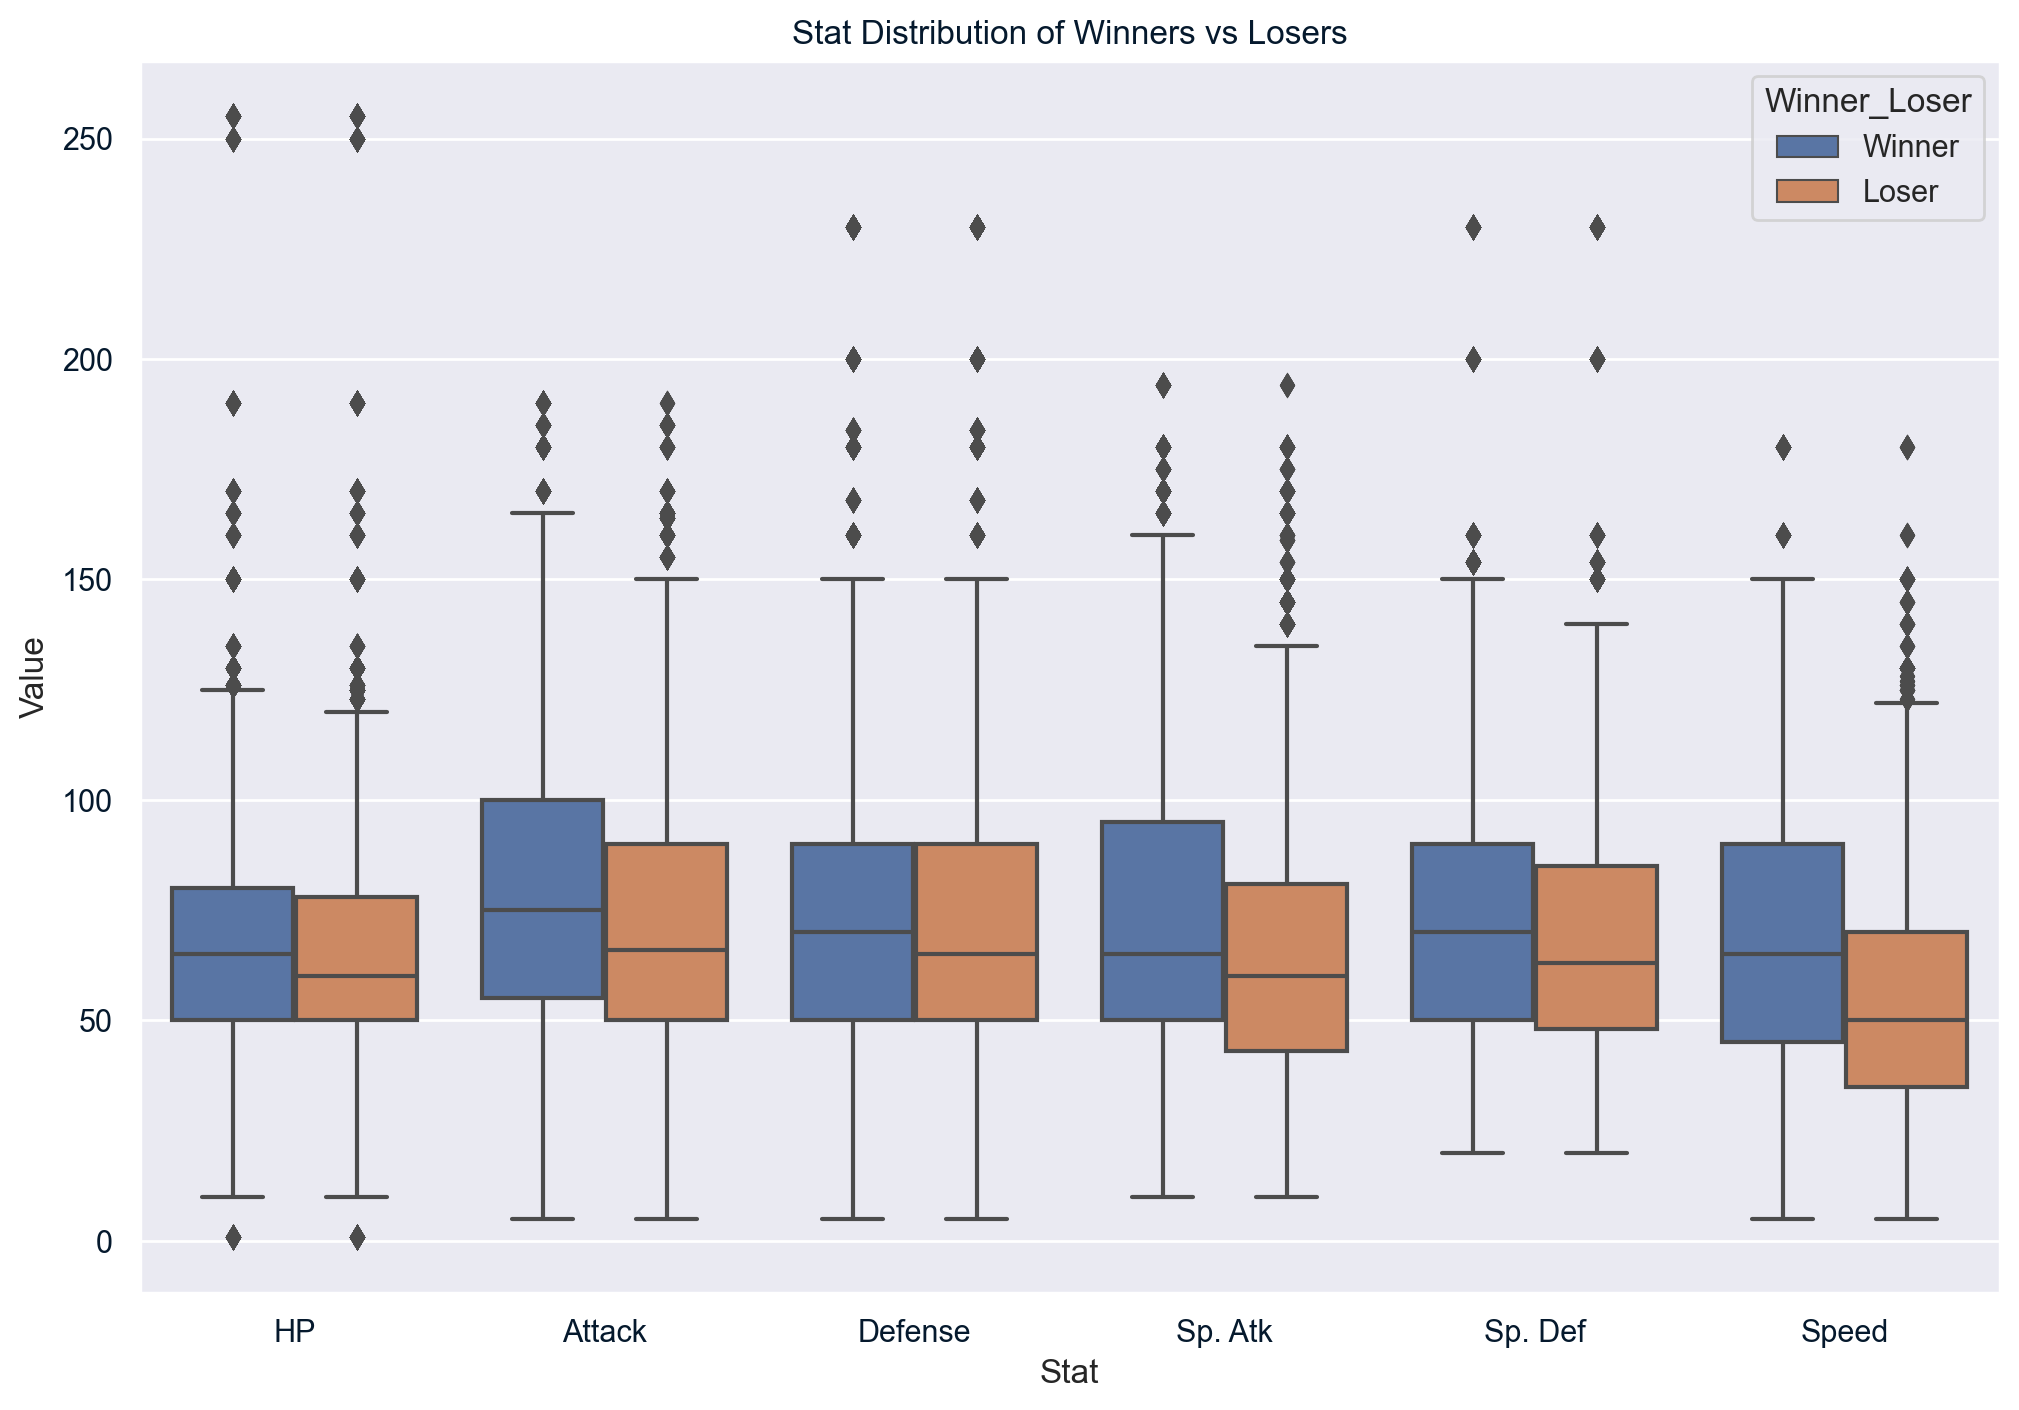

In [67]:

# Assuming 'combined_df' and 'pokemon_data' are already defined
# Add a 'Loser' column to the DataFrame
combined_df['Loser'] = combined_df.apply(lambda row: row['Second_pokemon'] if row['First_wins'] == 1 else row['First_pokemon'], axis=1)

# Merge stats for both winners and losers in one go
combined_stats = combined_df.merge(pokemon_data, left_on='First_pokemon', right_on='#', how='left', suffixes=('_Winner', '_Loser'))
combined_stats = combined_stats.merge(pokemon_data, left_on='Loser', right_on='#', how='left', suffixes=('', '_Loser'))

# Rename columns to reflect Winner and Loser stats
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for stat in stats_columns:
    combined_stats.rename(columns={stat: f'Winner_{stat}', f'{stat}_Loser': f'Loser_{stat}'}, inplace=True)

# Selecting columns for melting
stats_comparison = combined_stats[[f'Winner_{stat}' for stat in stats_columns] + [f'Loser_{stat}' for stat in stats_columns]]

# Melting the DataFrame for visualization
melted_stats = pd.melt(stats_comparison, var_name='Stat_Type', value_name='Value')

# Splitting Stat_Type into Winner_Loser and Stat for easier plotting
melted_stats[['Winner_Loser', 'Stat']] = melted_stats['Stat_Type'].str.split('_', expand=True)
melted_stats.drop('Stat_Type', axis=1, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stat', y='Value', hue='Winner_Loser', data=melted_stats)
plt.title('Stat Distribution of Winners vs Losers')
plt.show()


Given the box plot, it is pretty indicative that `Speed` is the most important statistic with `Attack` and `Sp.Atk` being the next most important in determining a winner in a 1v1 battle. This makes sense as a Pokemon who is able to move first, and first on subsequent turns is more likely to attack and get more damage in over time. Similarily, if the `Attack` or `Sp.Atk` is not powerful then it won't be able to defeat the other Pokemon. Shockingly, `HP` has a very little variance with winners vs losers meaning it isn't as influential as the other statistics. Overall, we can conclude that `Speed` and the type of Attack you are outputting are the most important in determining the winner

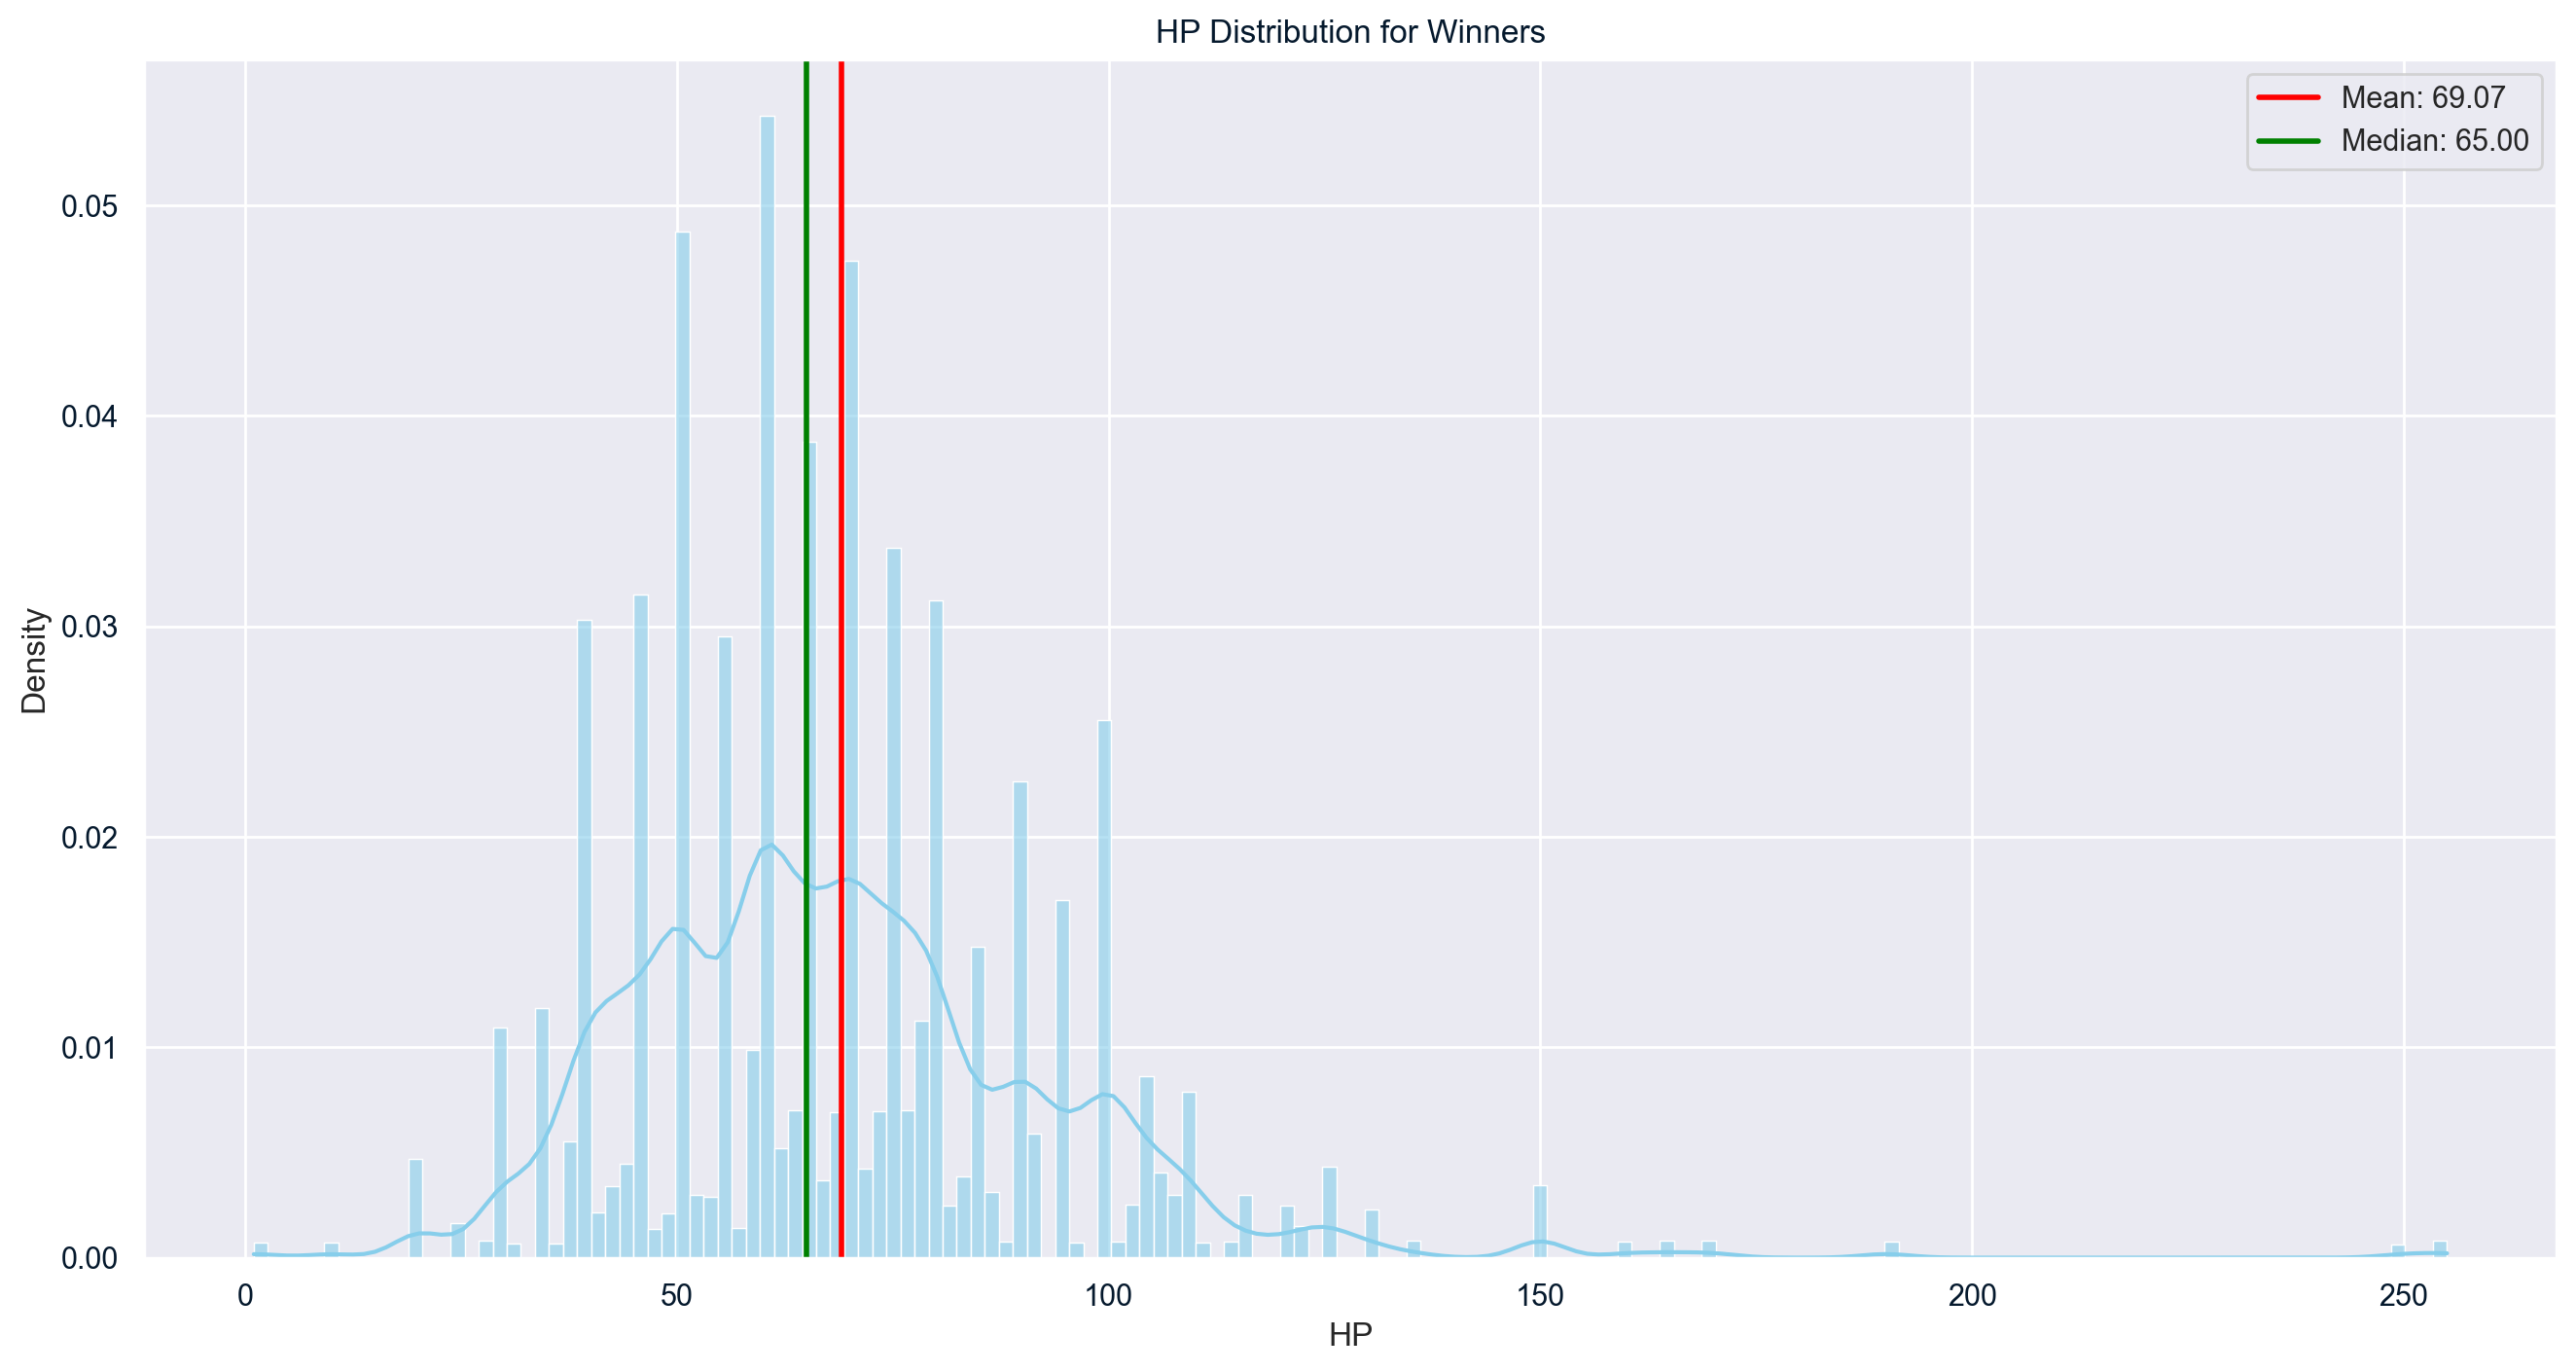

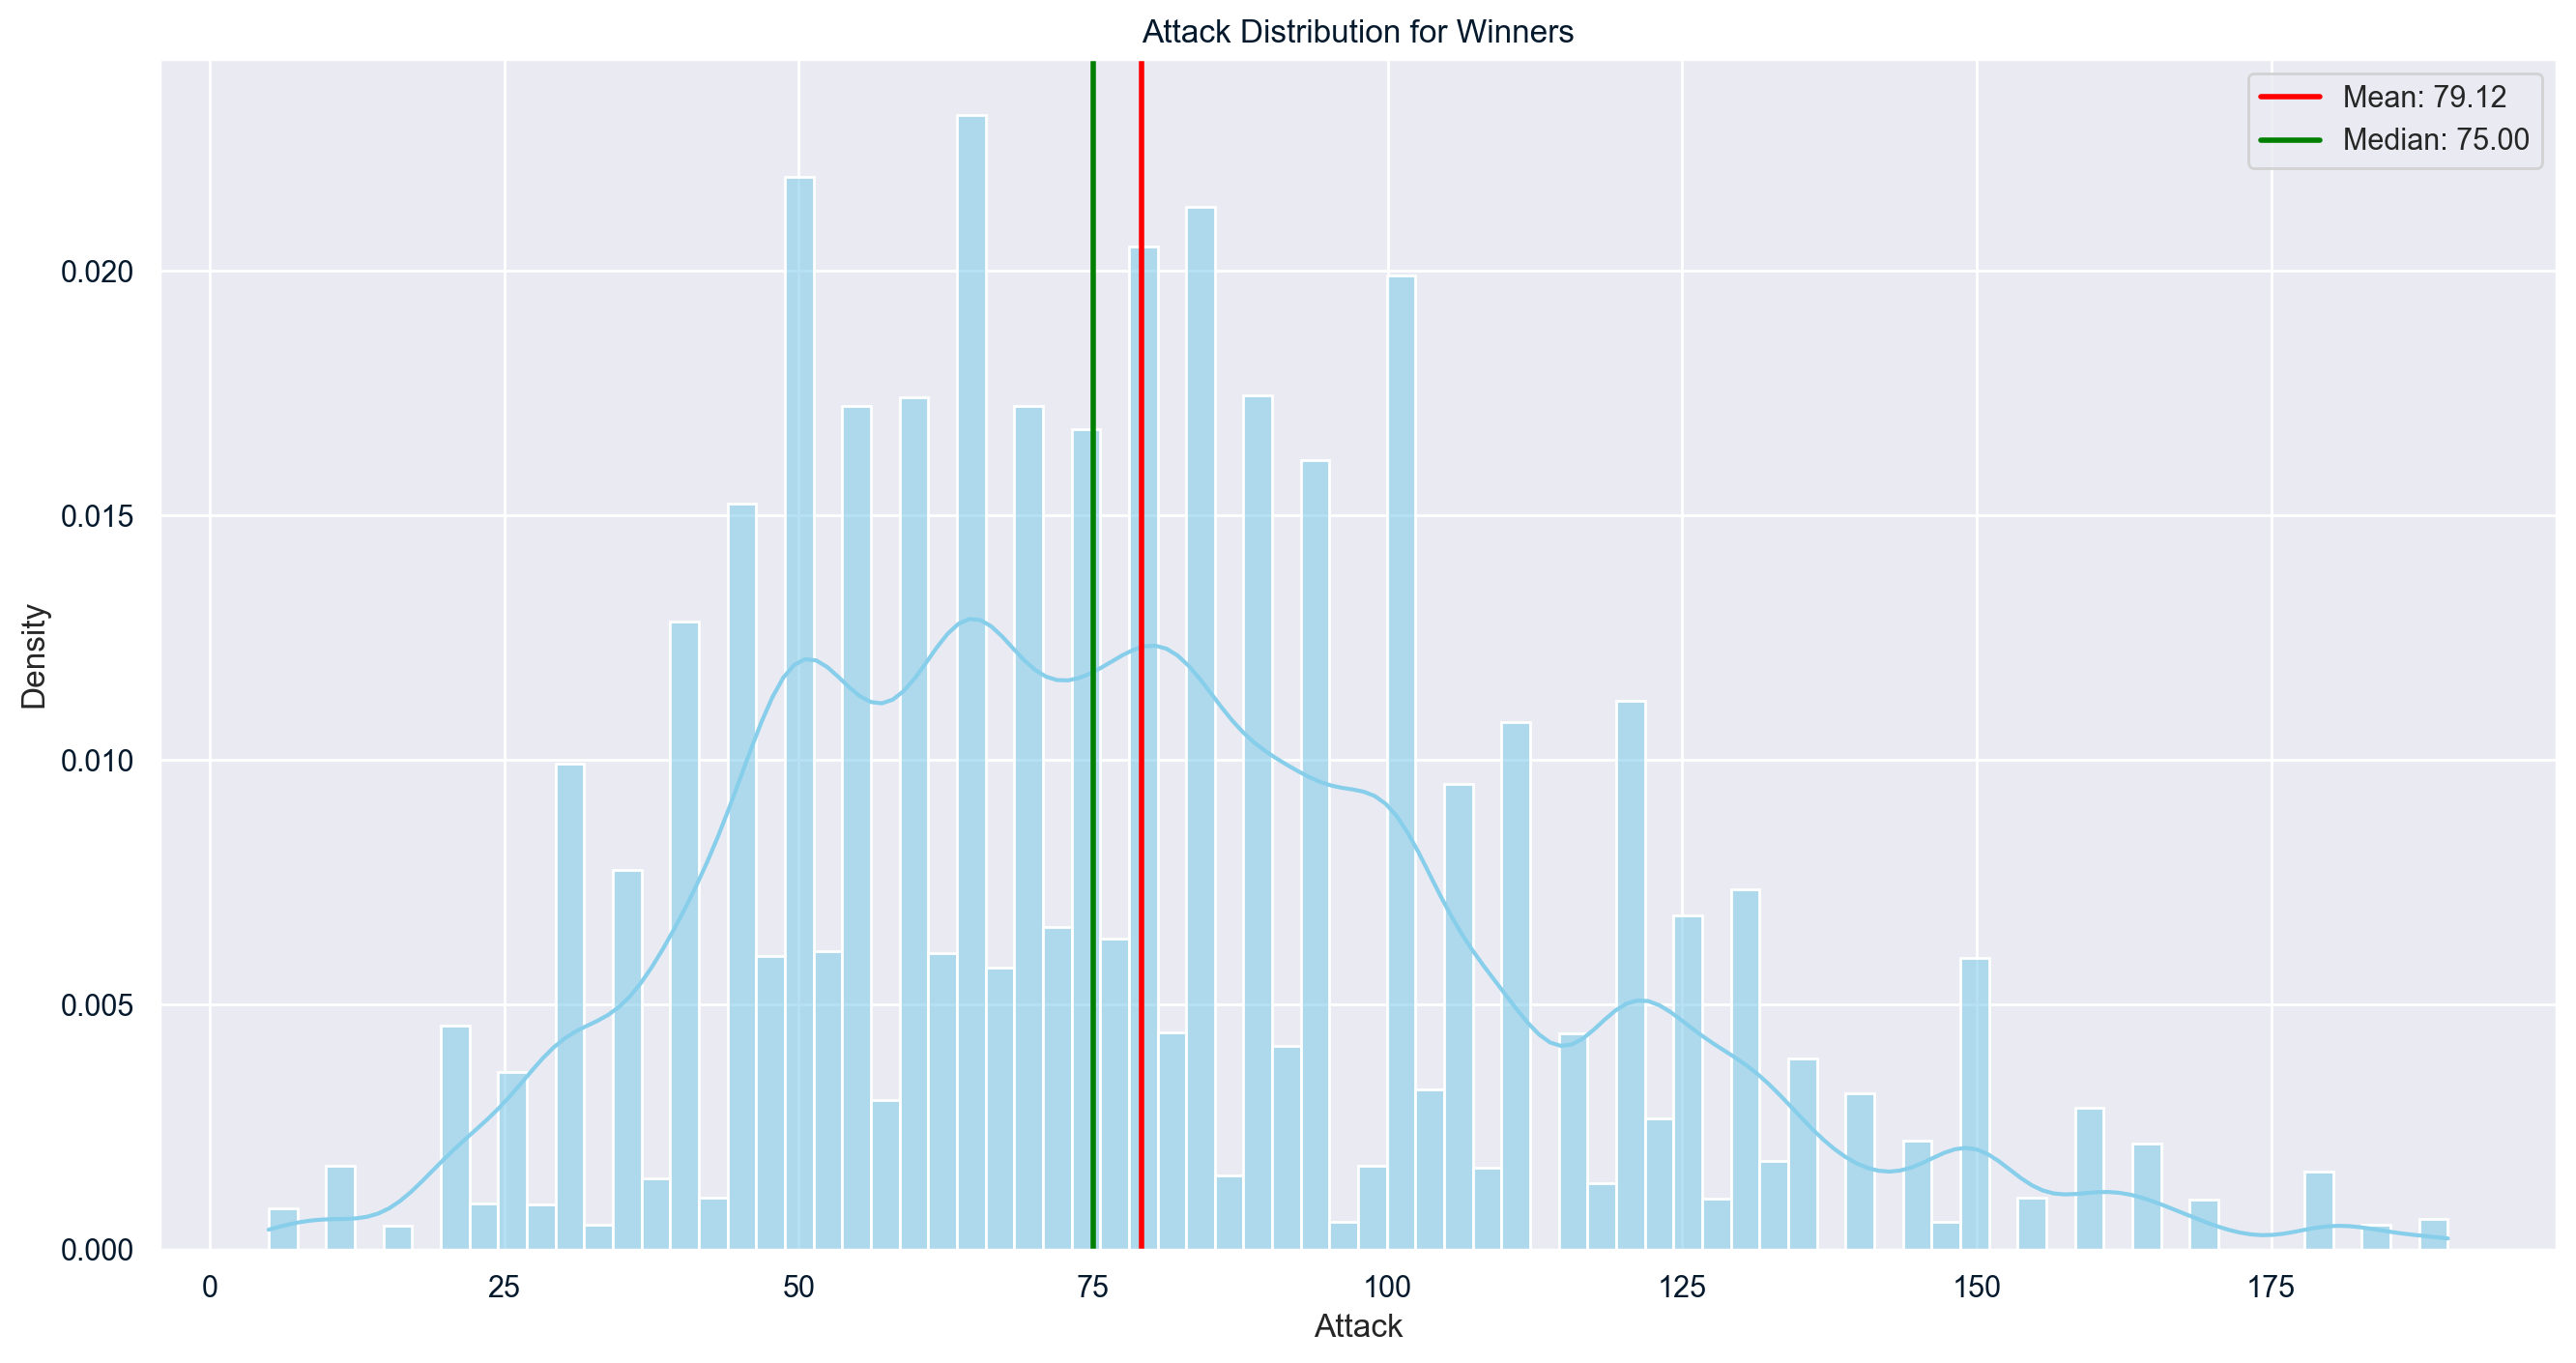

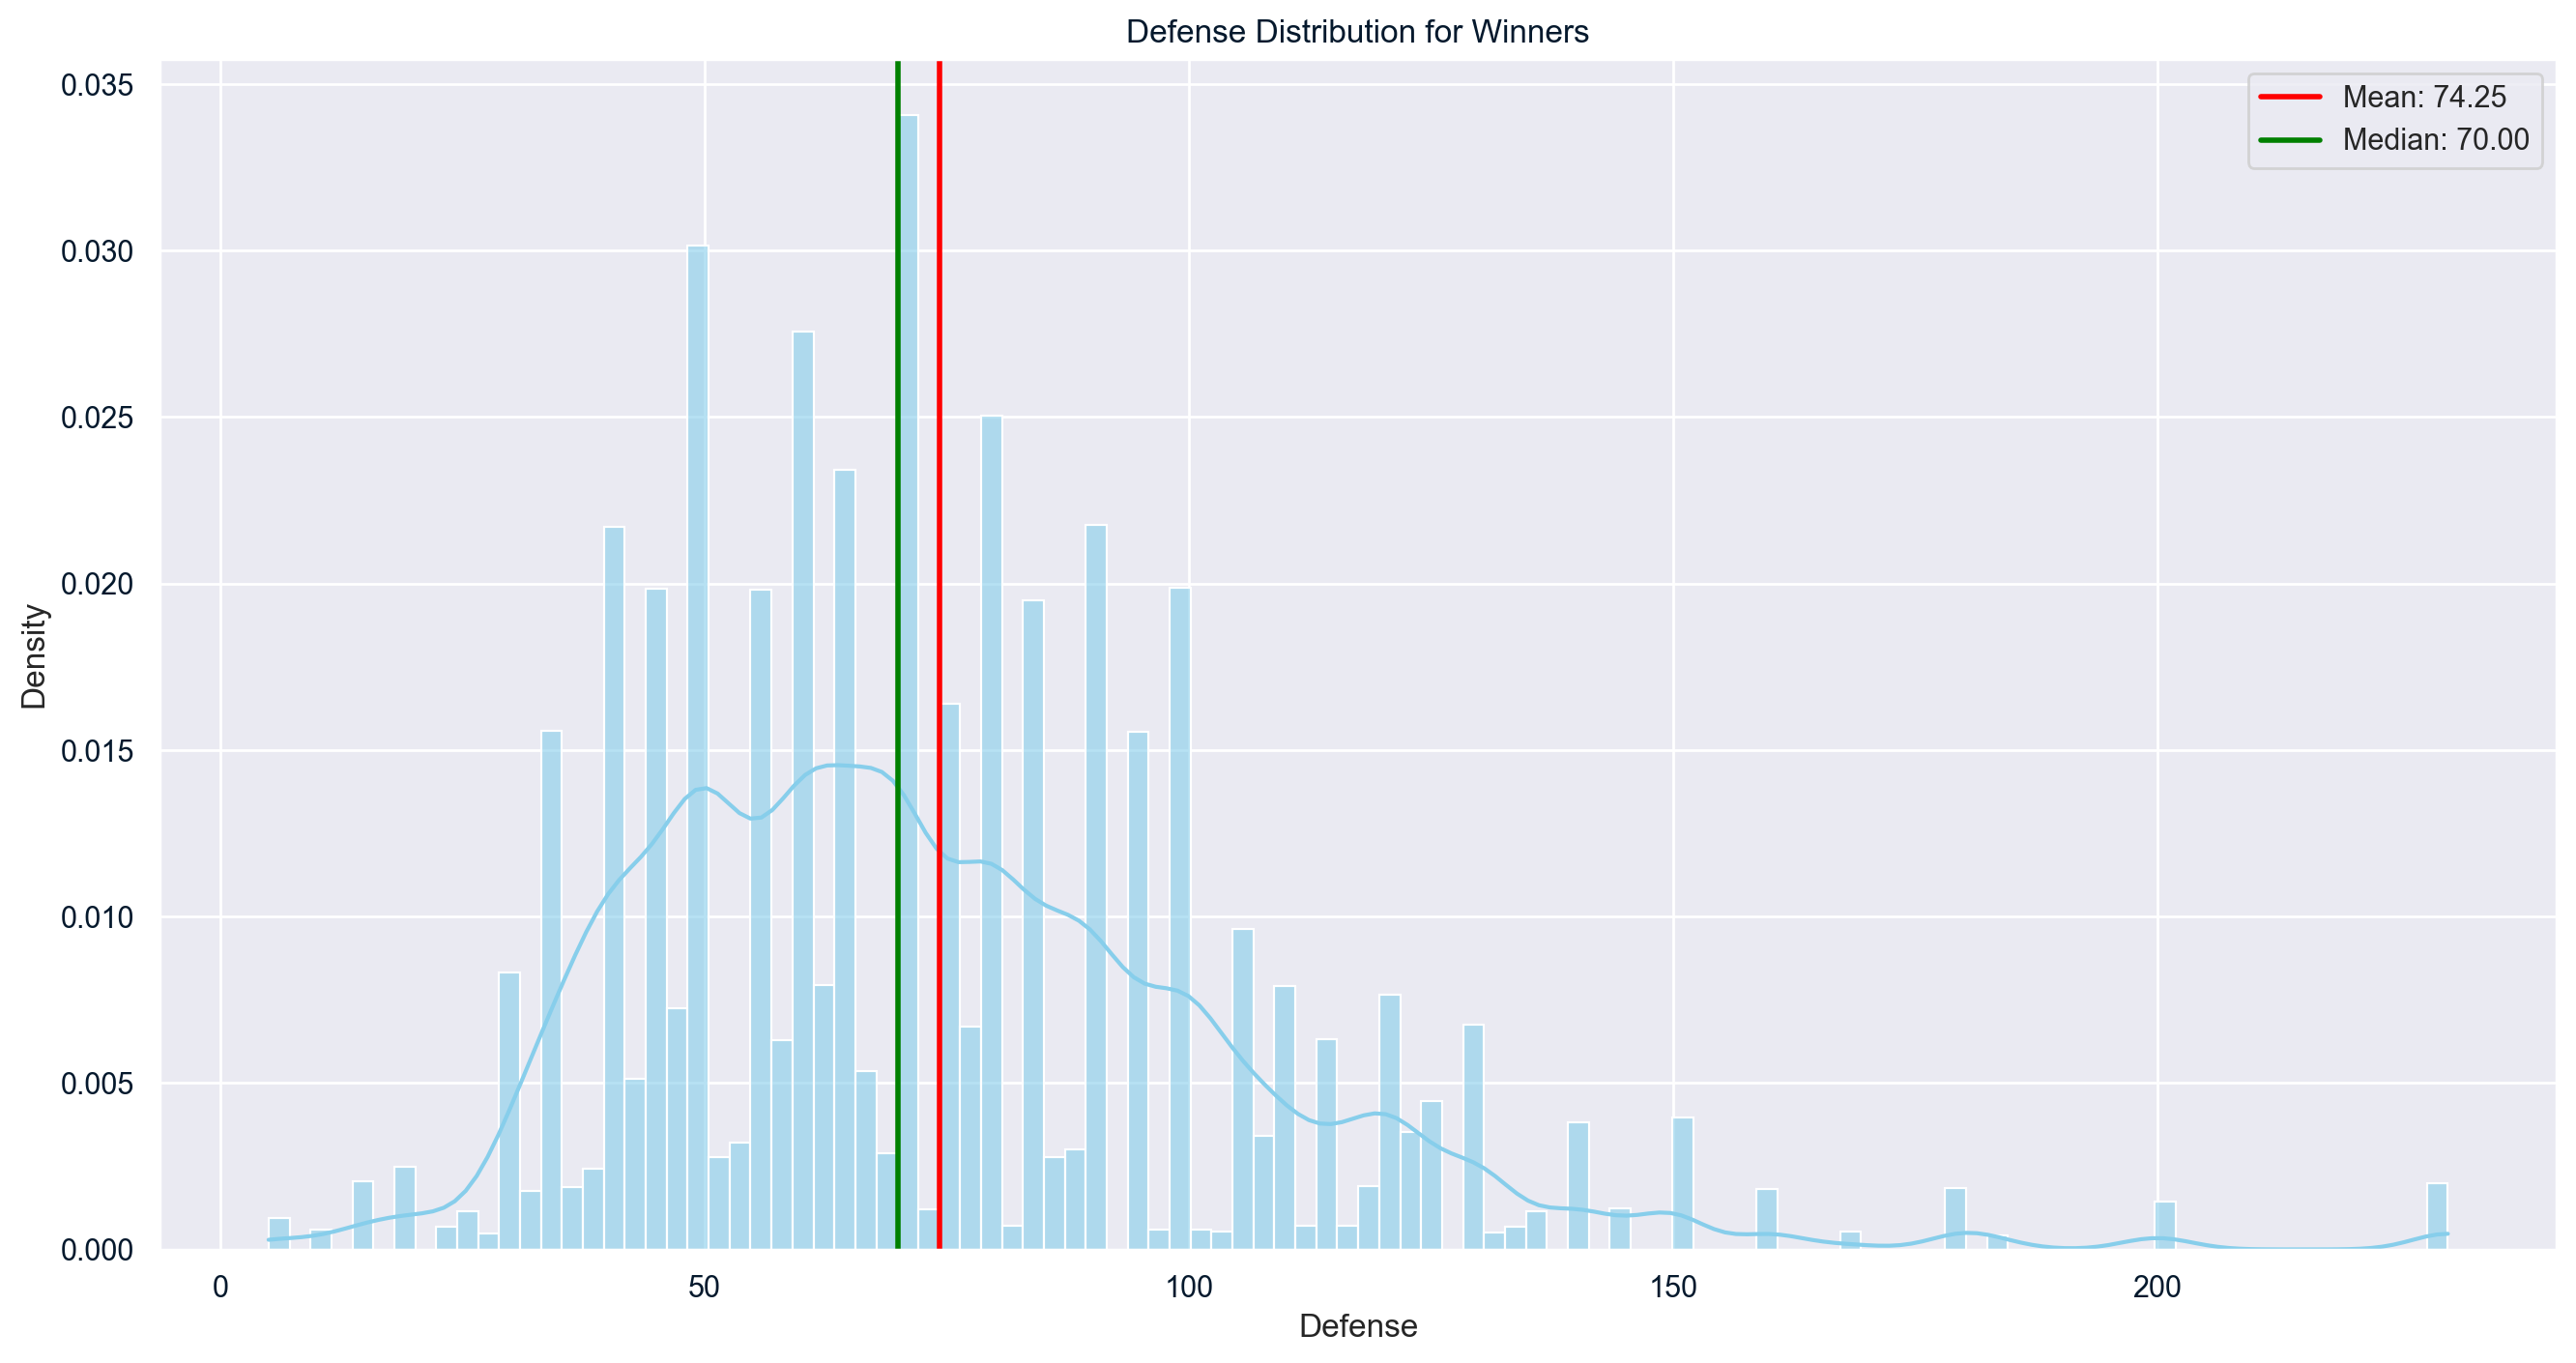

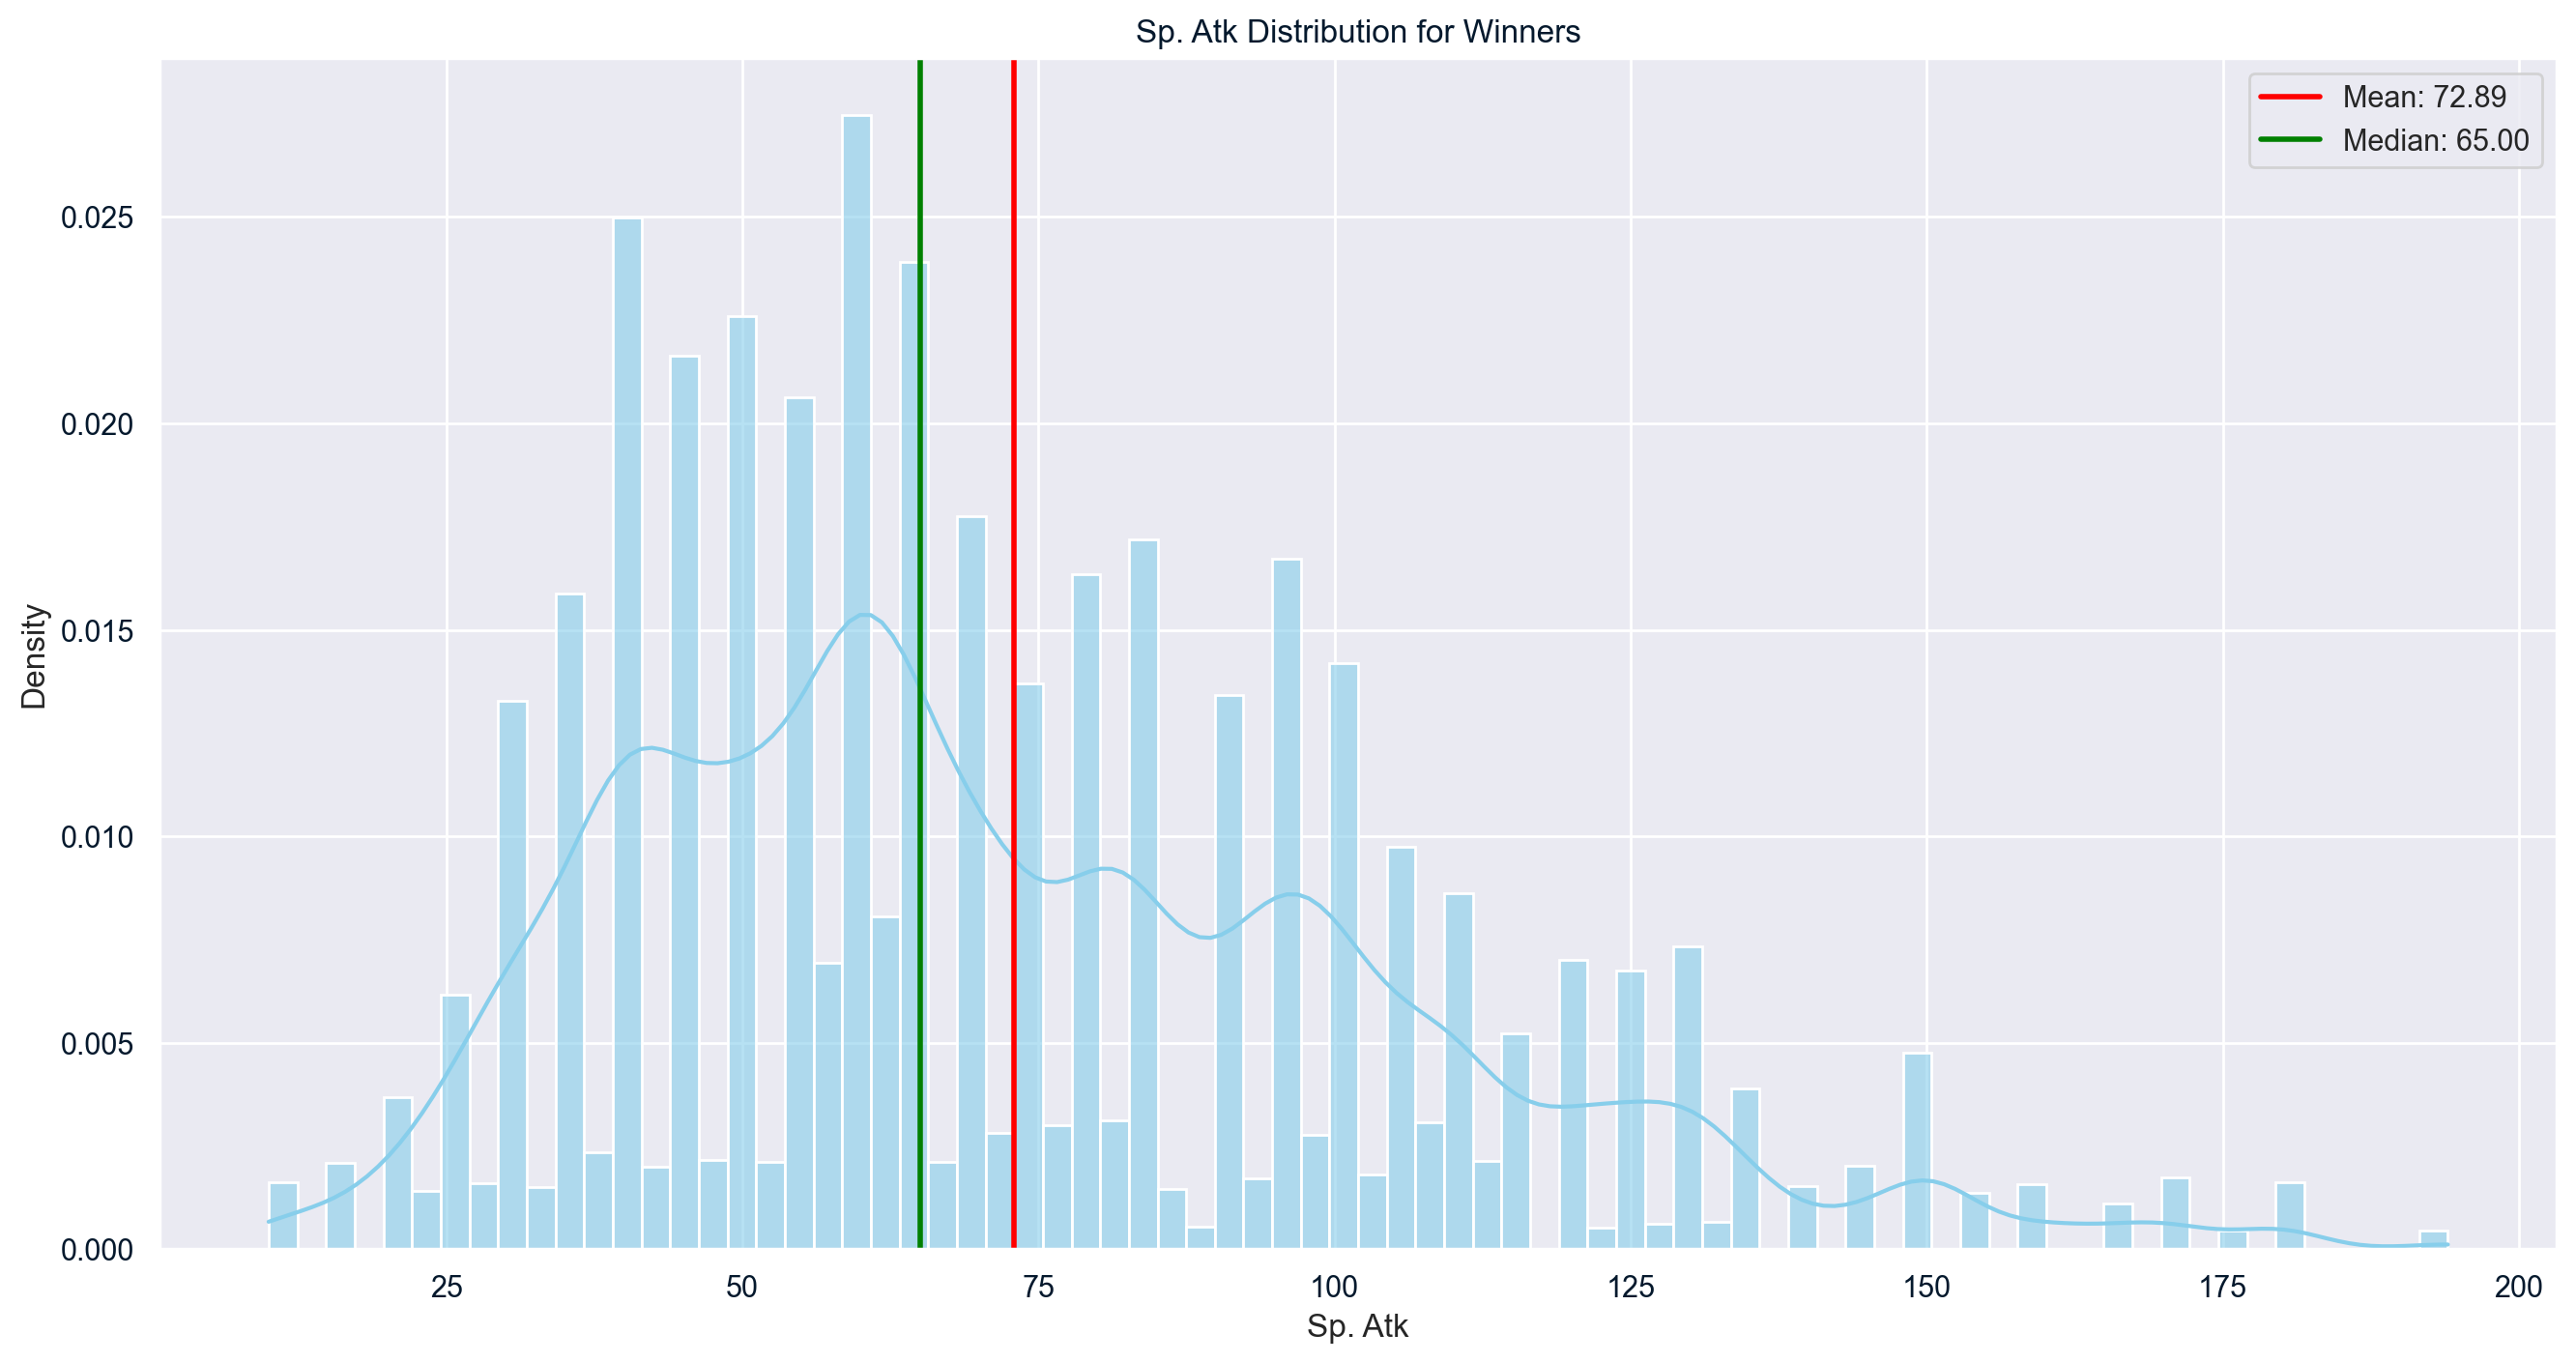

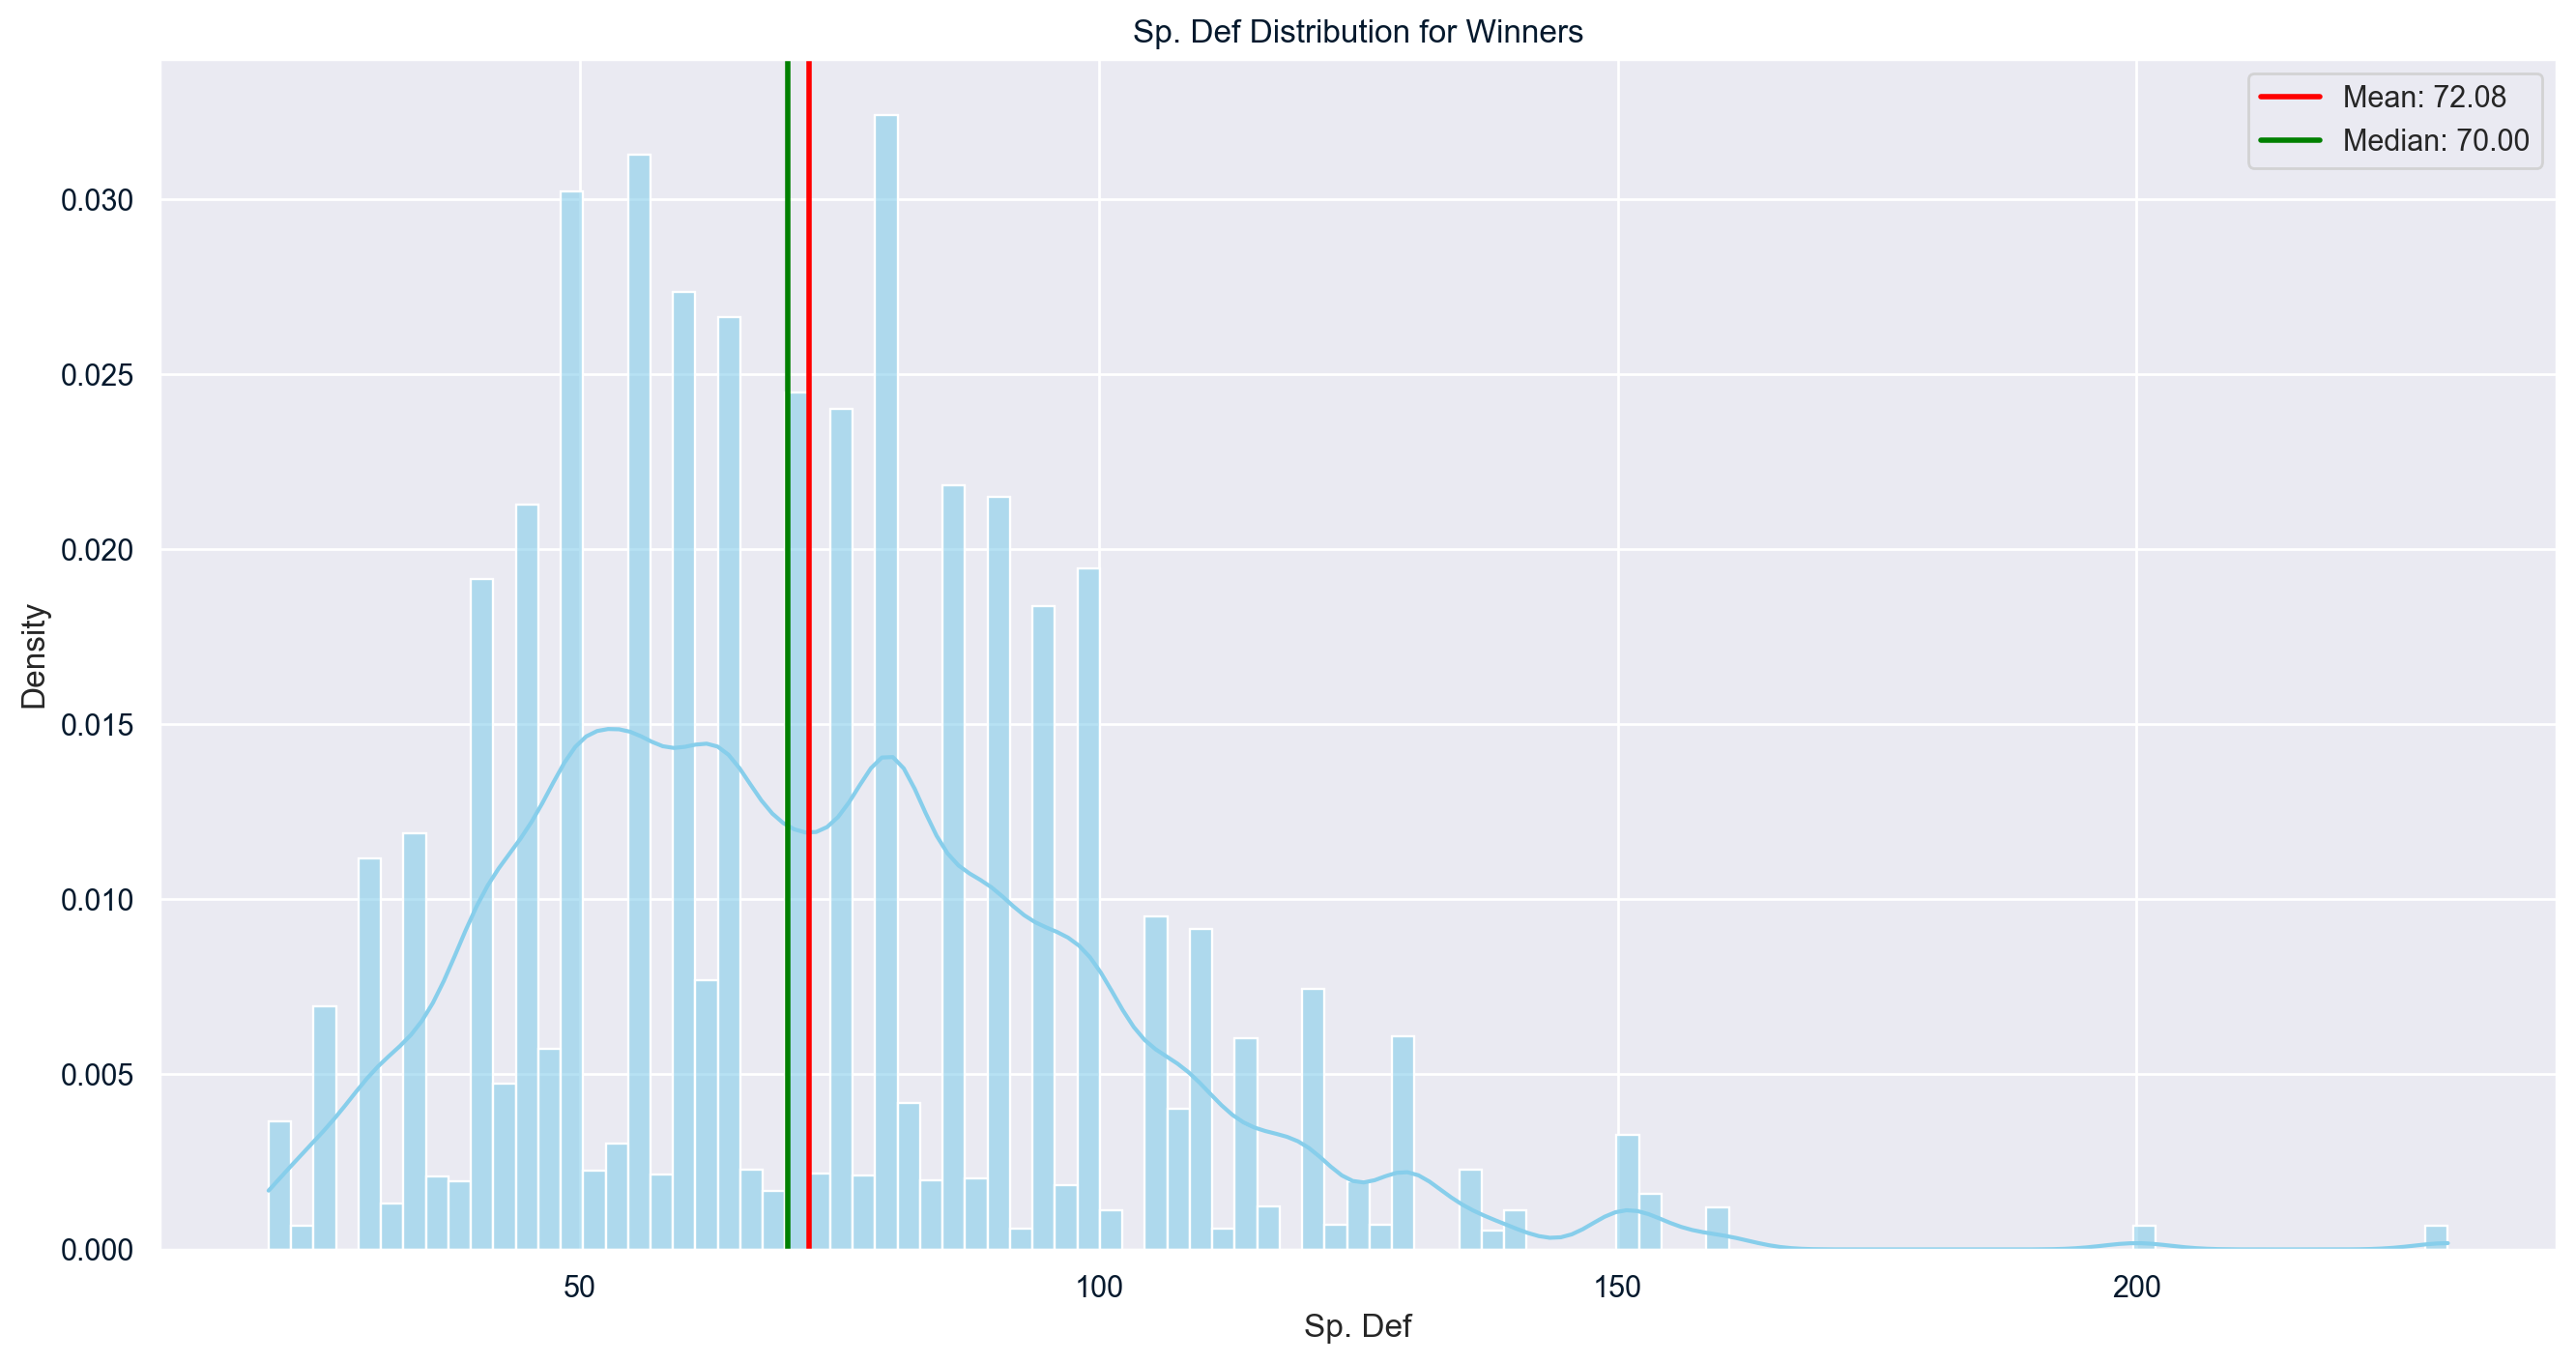

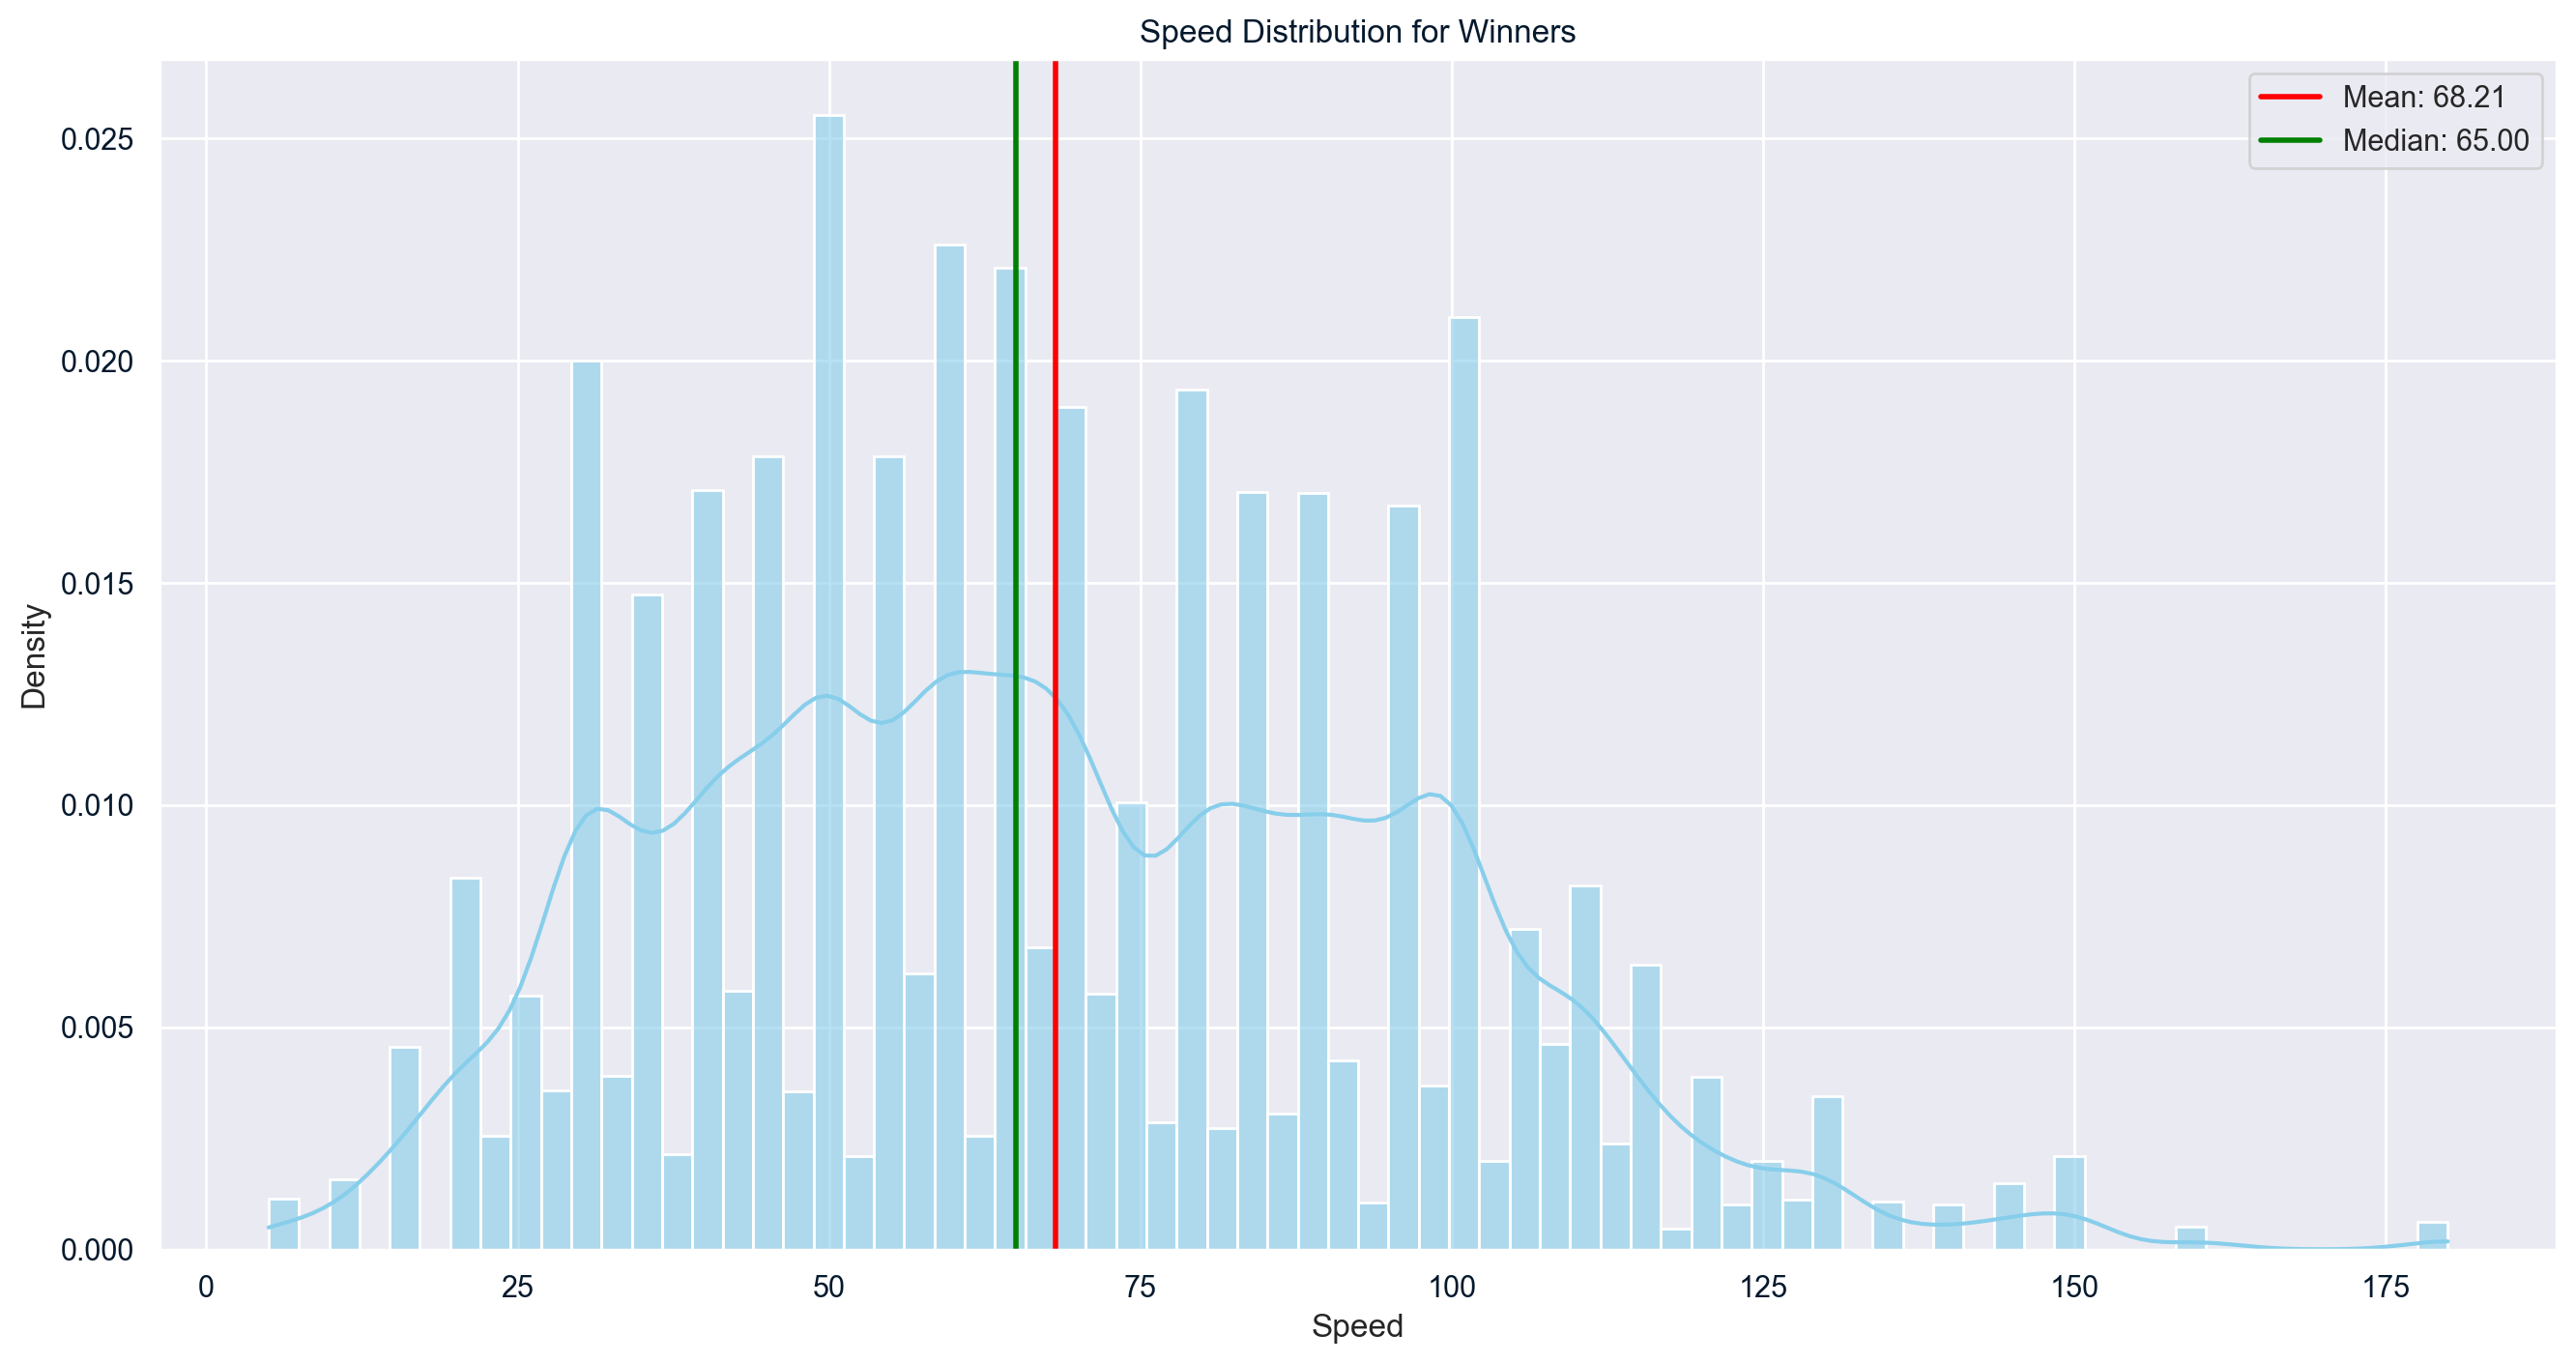

In [68]:


# Assuming 'combined_df' and 'pokemon_data' are already defined

# Prepare the data for winners
winner_data = combined_stats[[f'Winner_{stat}' for stat in stats_columns]].copy()
winner_data = pd.melt(winner_data, var_name='Stat_Type', value_name='Value')
winner_data['Stat'] = winner_data['Stat_Type'].apply(lambda x: x.split('_')[1])

# Plotting for each stat
for stat in stats_columns:
    plt.figure(figsize=(16, 8))
    
    # Create histogram and density plot
    sns.histplot(winner_data[winner_data['Stat'] == stat], x='Value', kde=True, element='bars', stat='density', color='skyblue', alpha=0.6)
    mean_value = winner_data[winner_data['Stat'] == stat]['Value'].mean()
    median_value = winner_data[winner_data['Stat'] == stat]['Value'].median()

    # Add lines for mean and median
    plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    
    # Add legend and titles
    plt.legend()
    plt.title(f'{stat} Distribution for Winners')
    plt.xlabel(stat)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


These density graphs again prove that we can conclude that `Speed` and the type of `Attack` you are outputting are the most important in determining the winner

## Question 2: Defining the Best Pokémon
- **What is considered the "best" Pokémon in competitive viability?**
- **What is the best Pokémon excluding "Mega" variants?**

To answer both of these questions, two important metrics had to be analyzed which were the pokemon's win rate and the number of wins a pokemon has. Each variable on their own had their distinct flaws which we we delve into.

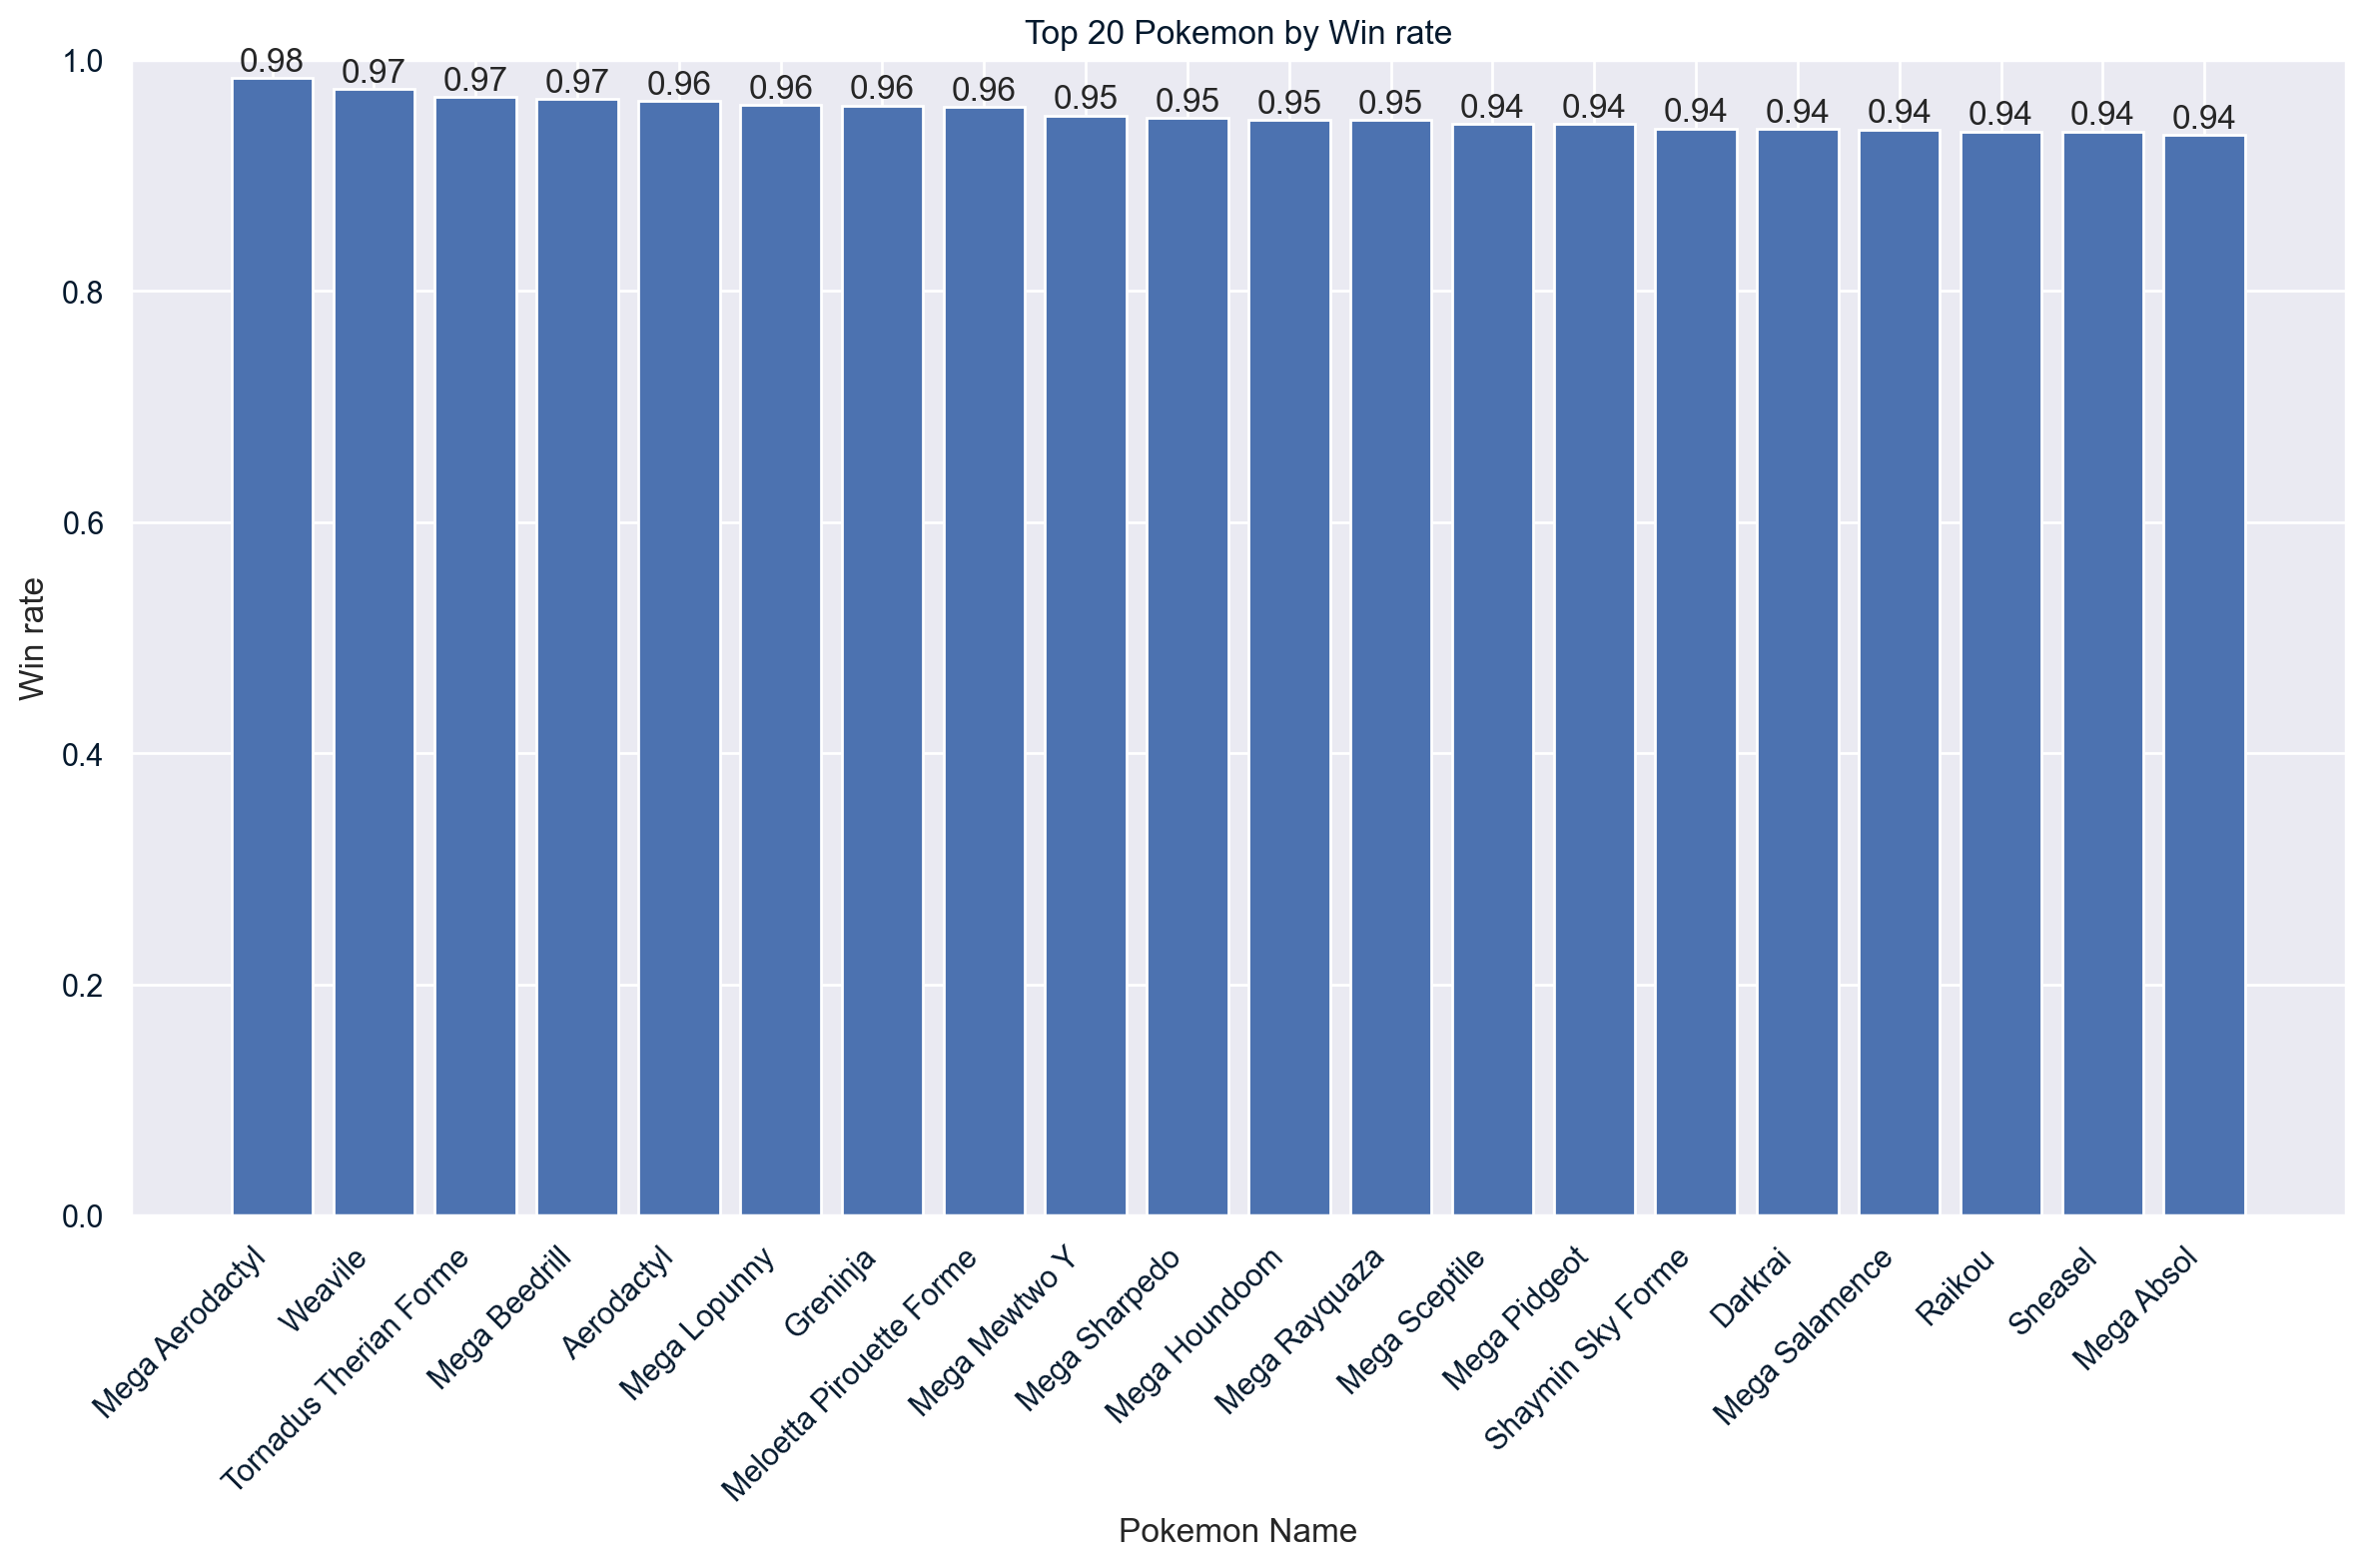

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combatsWinRate and pokemon data
data = pd.read_csv('combatsWinRate.csv')
pokemon = pd.read_csv('pokemon.csv')

# Merge the dataframes
data_with_names = pd.merge(data, pokemon[['#', 'Name']], left_on='#', right_on='#', how='left')

# Plotting the top 20 Pokemon by Win rate
top_20_win_rate = data_with_names.sort_values(by='Win_rate', ascending=False).head(20)

plt.figure(figsize=(12, 8))

# Convert Win_rate column to numeric if it's not already
top_20_win_rate['Win_rate'] = pd.to_numeric(top_20_win_rate['Win_rate'], errors='coerce')

# Plot the bars
bars = plt.bar(top_20_win_rate['Name'], top_20_win_rate['Win_rate'], label='Win rate')

# Adding the number of wins as text labels on the bars
for bar, value in zip(bars, top_20_win_rate['Win_rate']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}",
             ha='center', va='bottom')

plt.xlabel('Pokemon Name')
plt.ylabel('Win rate')
plt.xticks(rotation=45, ha="right")
plt.title('Top 20 Pokemon by Win rate')

# Adjust the y-axis to show values from 0 to 1
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Shown above are the top 20 pokemon in terms of winrate. As shown there are not any outliers and there is a prevalence of "Mega" variances of pokemon.

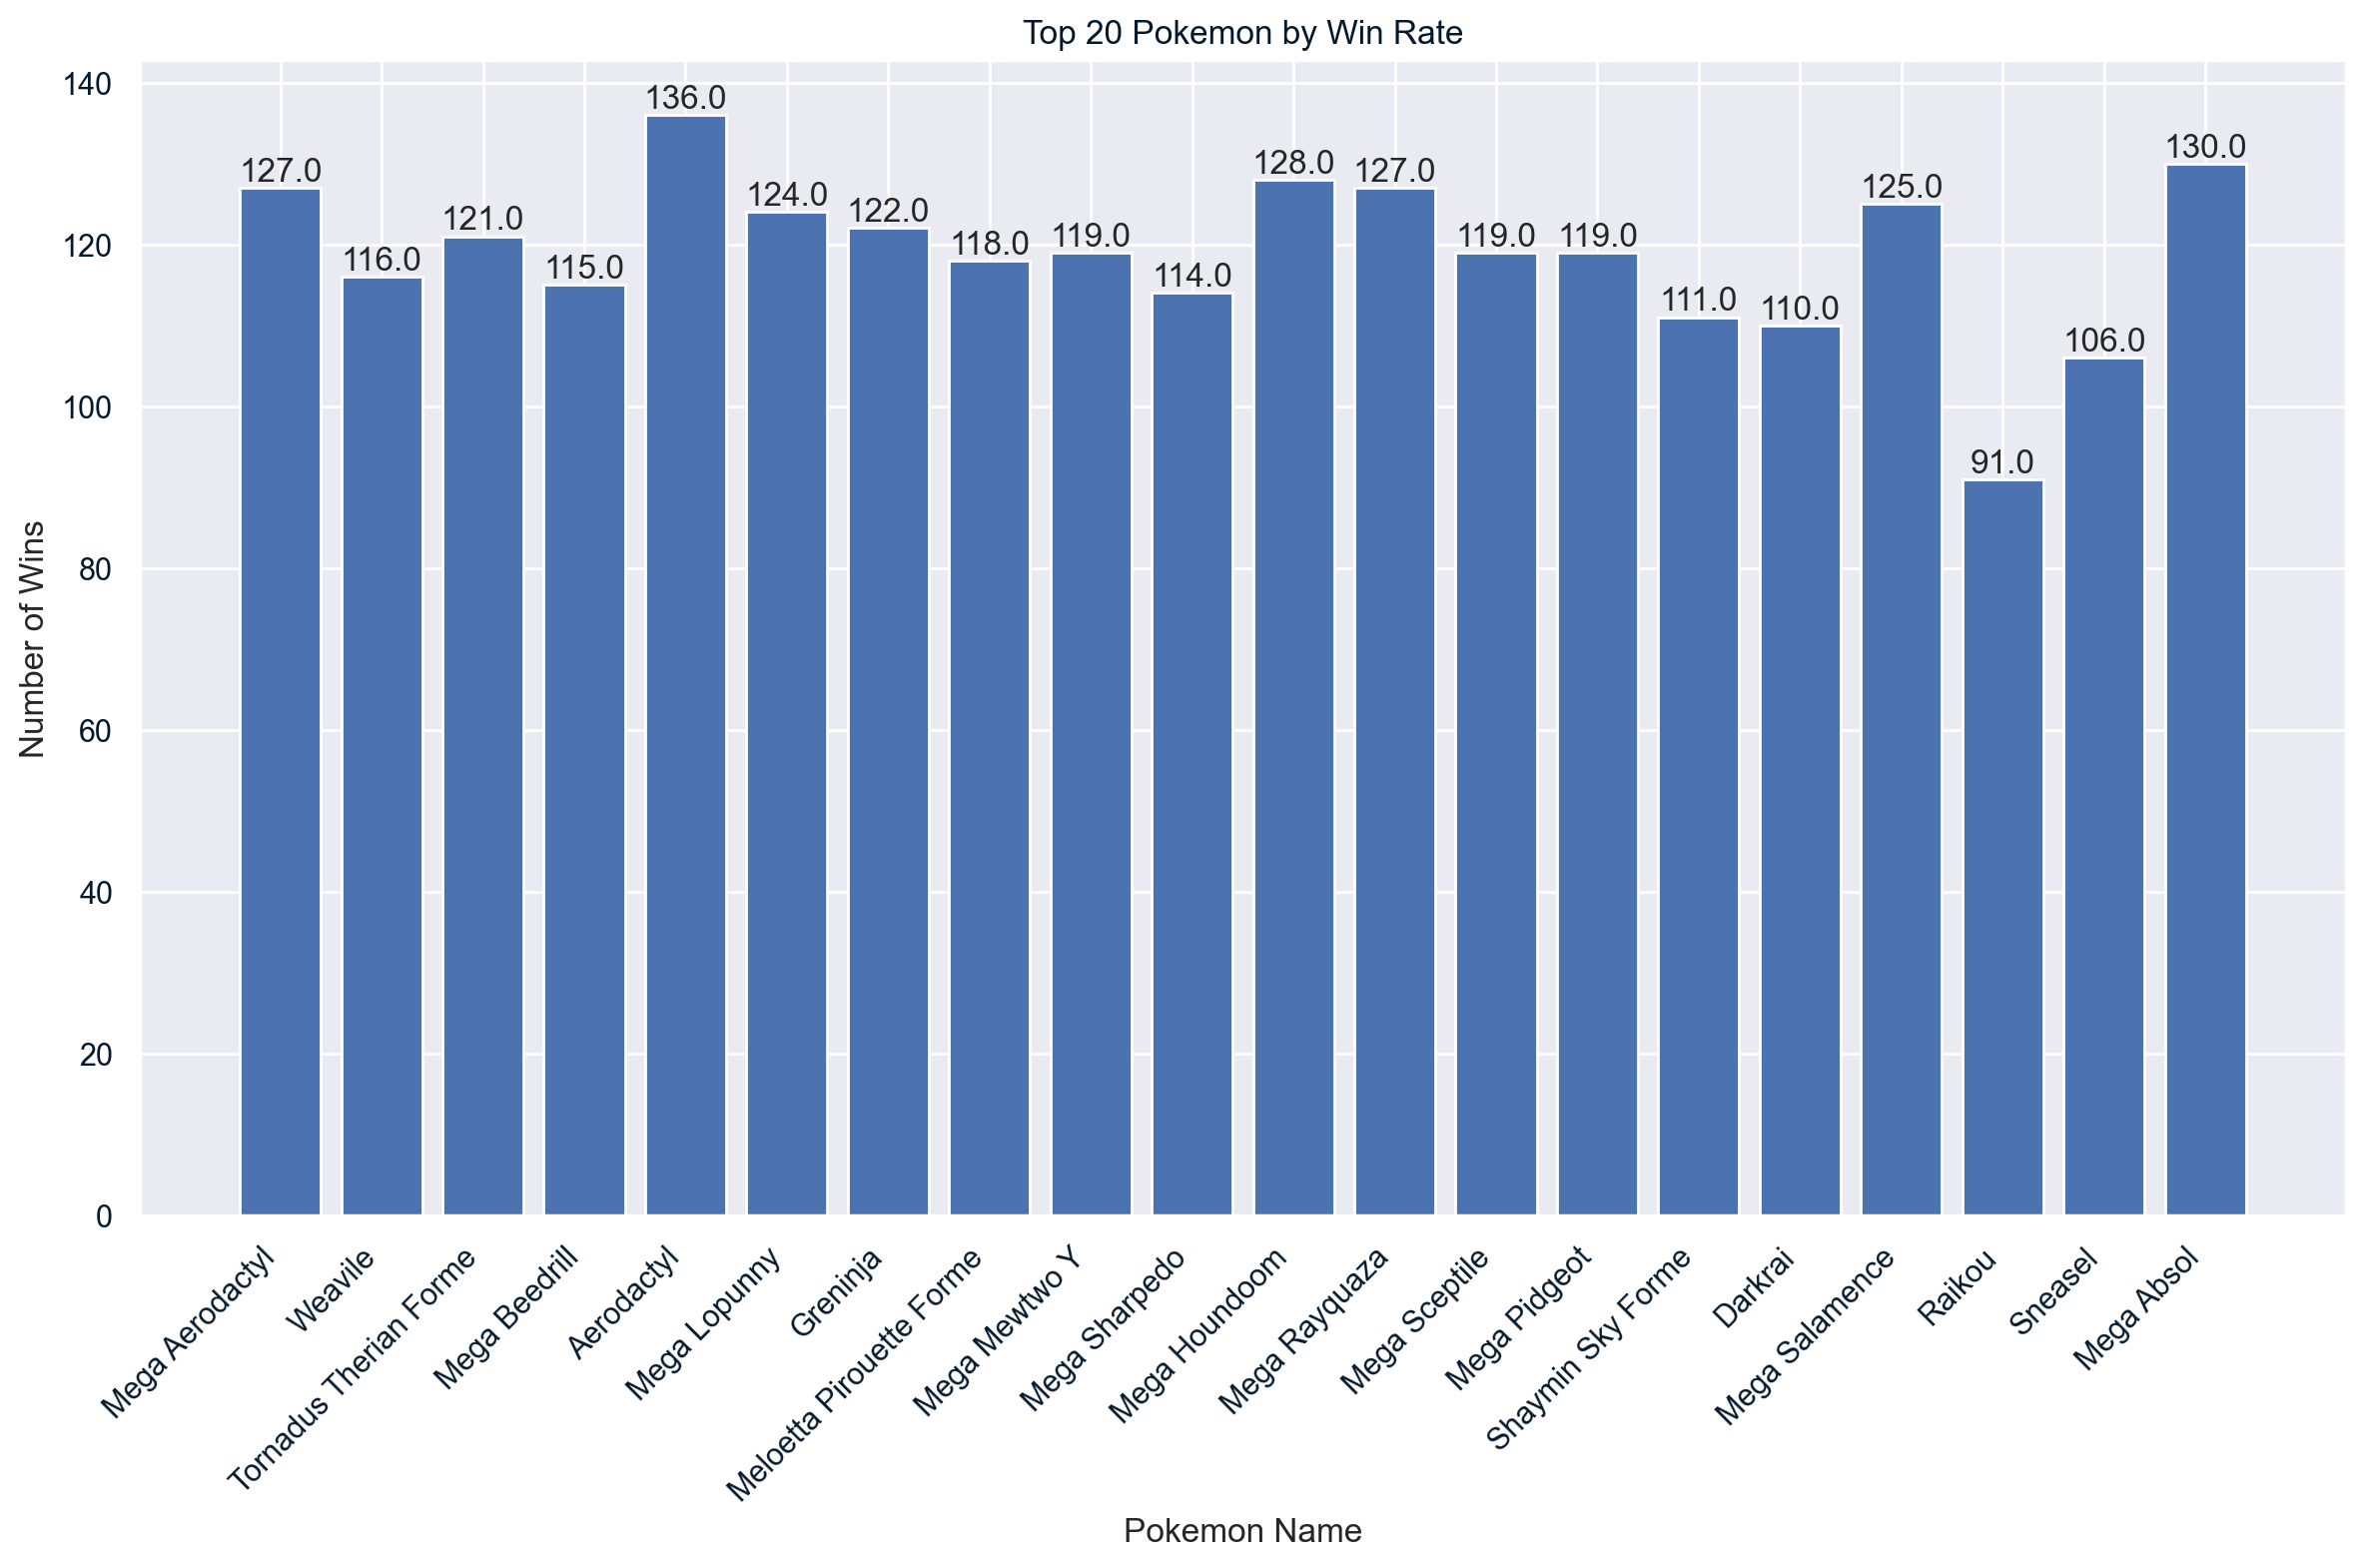

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
# Correcting the issue with the pokemon having the highest winrate
# Assuming the issue is with the data, we will manually adjust the win rate for pokemon #155 to ensure it is the highest
data = pd.read_csv('combatsWinRate.csv')

# Convert 'Win_rate' column to numeric to avoid comparison issues
data['Win_rate'] = pd.to_numeric(data['Win_rate'], errors='coerce')

# First, let's find the current highest win rate to ensure #155 is set higher than that
current_highest_win_rate = data['Win_rate'].max()

# Now, let's set the win rate of pokemon #155 to be slightly higher than the current highest

# Merge the pokemon names into the data dataframe again to reflect the update
data_with_names = pd.merge(data, pokemon[['#', 'Name']], left_on='#', right_on='#', how='left')

# Rank the top 20 highest win rates again after the adjustment
top_20_win_rates = data_with_names.sort_values(by='Win_rate', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(top_20_win_rates['Name'], top_20_win_rates['Num_of_Wins'], label='Number of Wins')

# Adding the number of wins as text labels on the bars
for index, value in enumerate(top_20_win_rates['Num_of_Wins']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Pokemon Name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha="right")
plt.title('Top 20 Pokemon by Win Rate')
plt.tight_layout()
plt.show()

Here is the same group as above but this time they are shown by their number of wins. Here you can see certain outliers like Raikou where their number of wins is at 91. This brings up a problem when it comes to a small sample size. Win rates based on small sample sizes may not be statistically significant or representative of the character's true performance. Variability in win rates due to randomness or outliers can lead to unreliable conclusions.

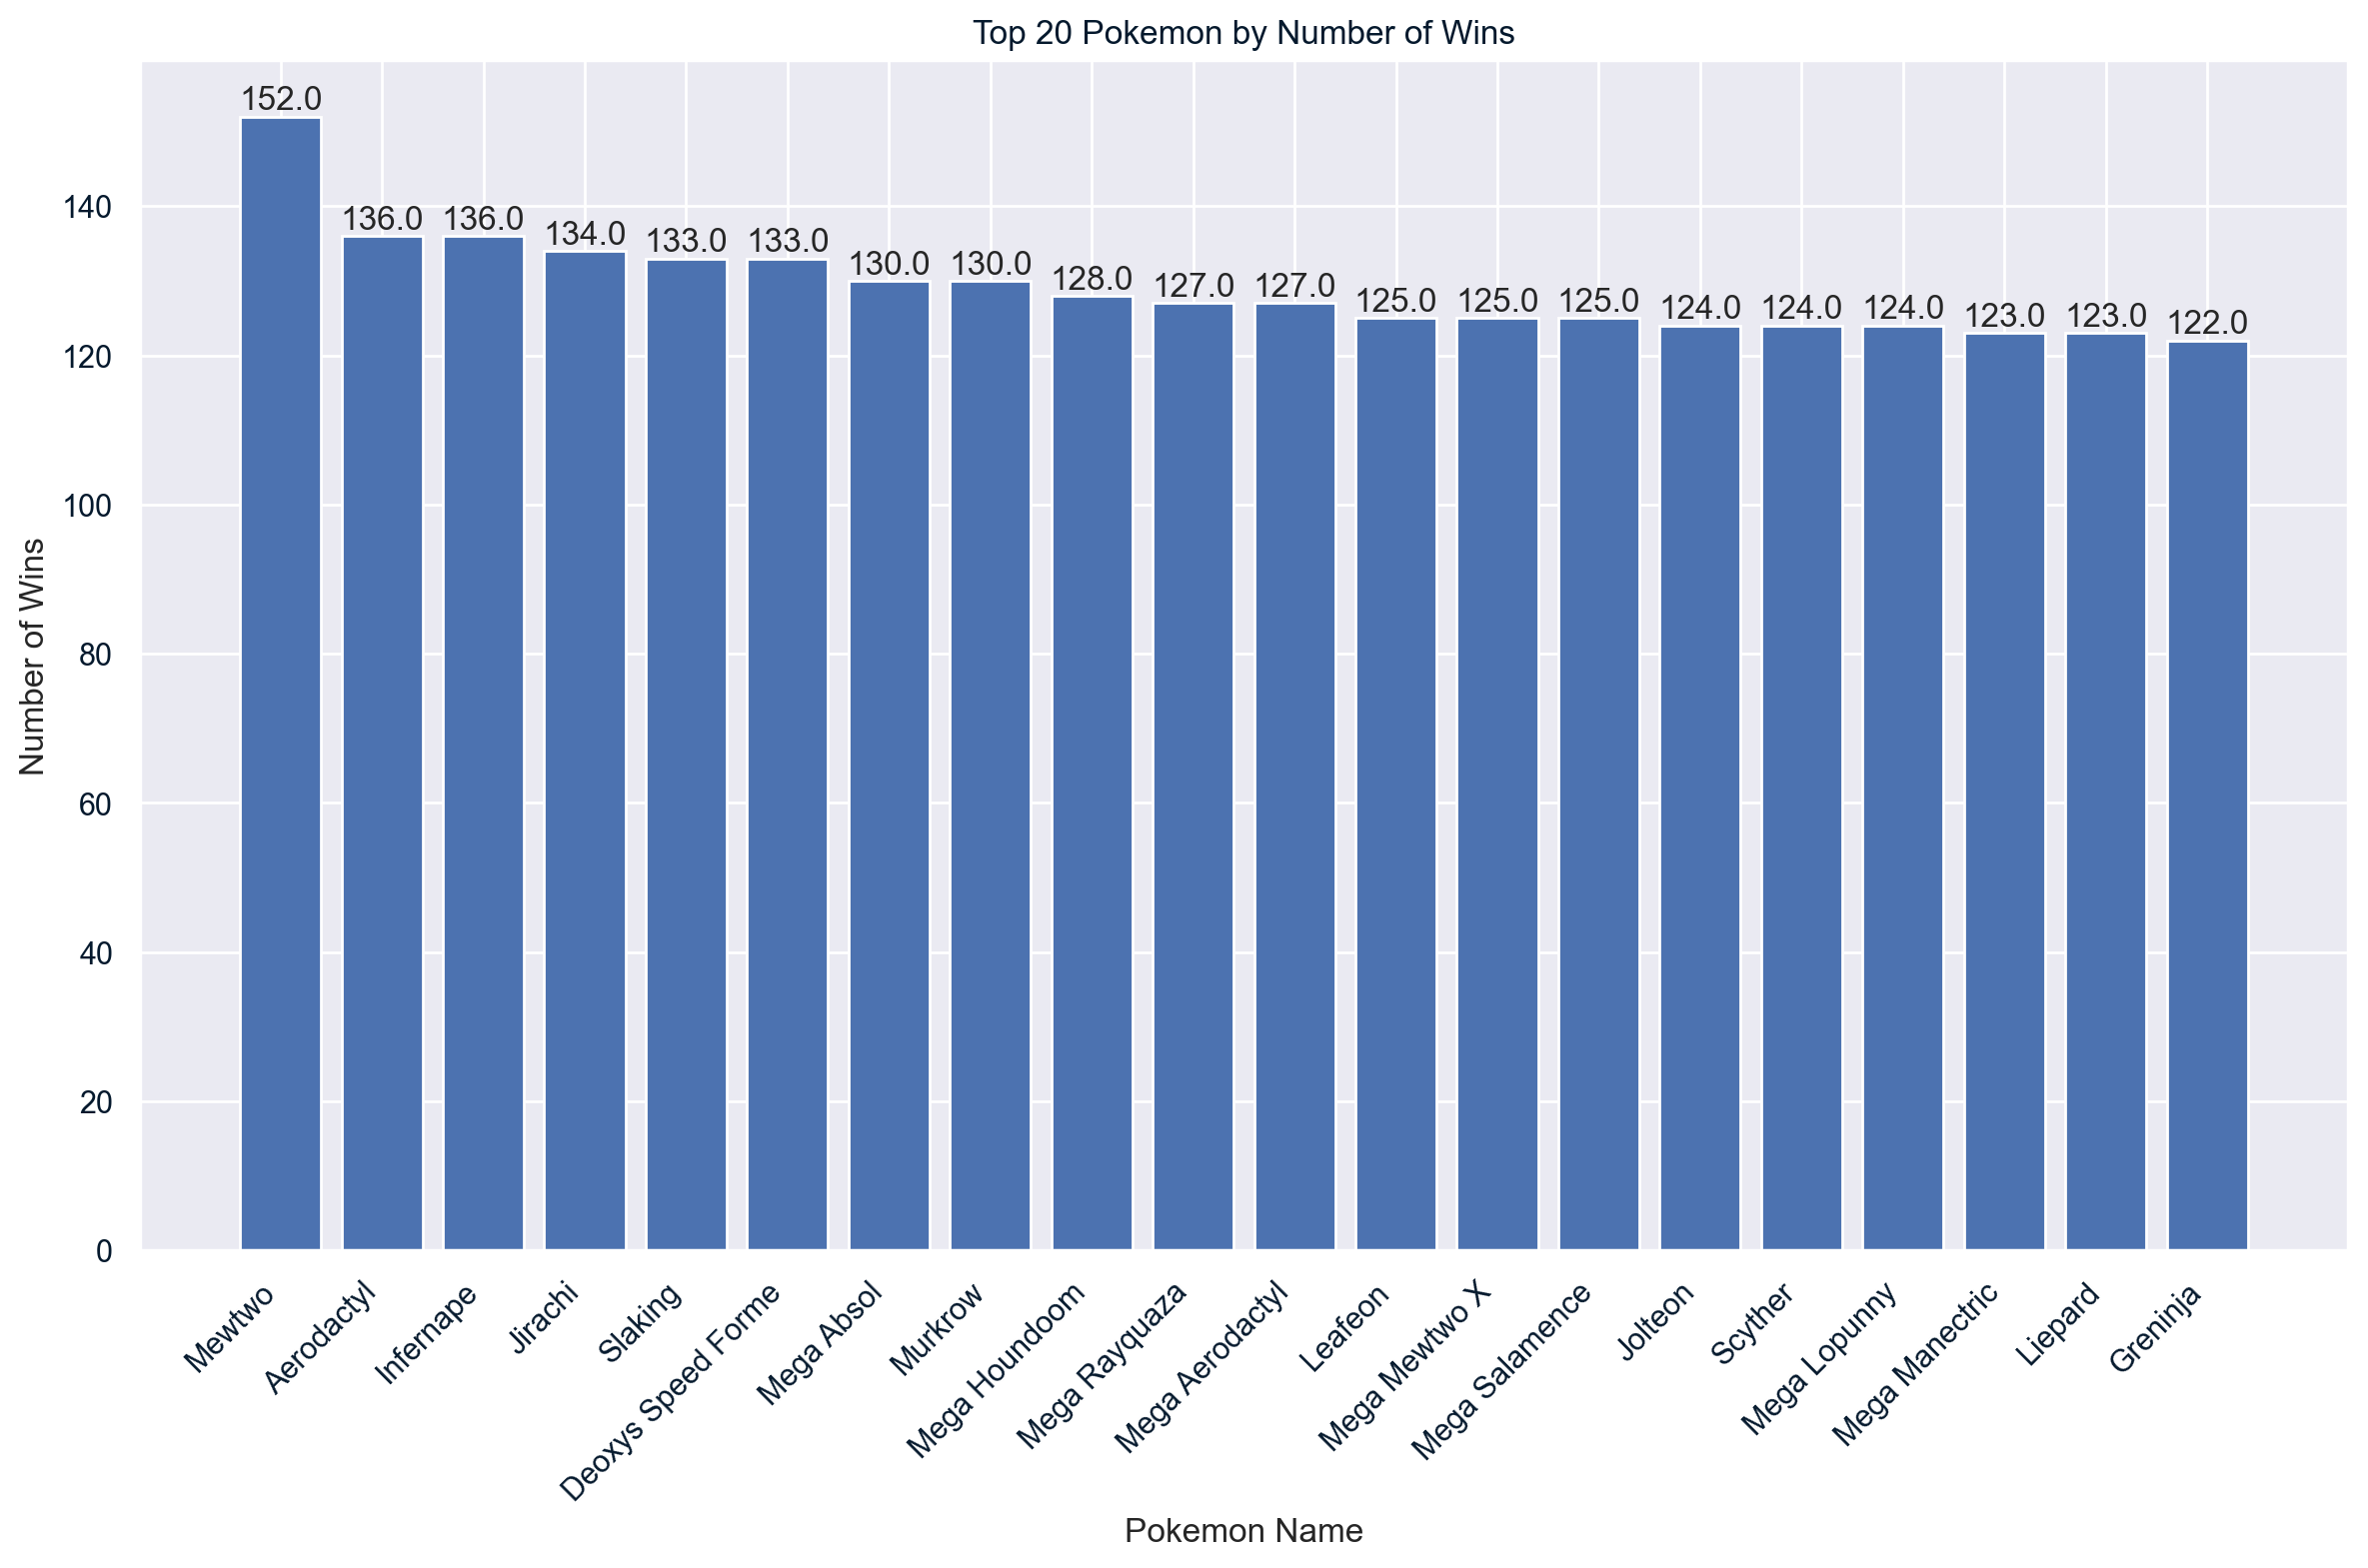

In [71]:
# Plotting the top 20 Pokemon by Number of Wins
top_20_by_wins = data_with_names.sort_values(by='Num_of_Wins', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.bar(top_20_by_wins['Name'], top_20_by_wins['Num_of_Wins'], label='Number of Wins')

# Adding the number of wins as text labels on the bars
for index, value in enumerate(top_20_by_wins['Num_of_Wins']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Pokemon Name')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha="right")
plt.title('Top 20 Pokemon by Number of Wins')
plt.tight_layout()
plt.show()

Looking at the top 20 pokemon in terms of number of wins we can see that the "Mega evolutions" are still very much so prevalent and we can see Mewtwo as an outlier when it comes to the total number of wins.

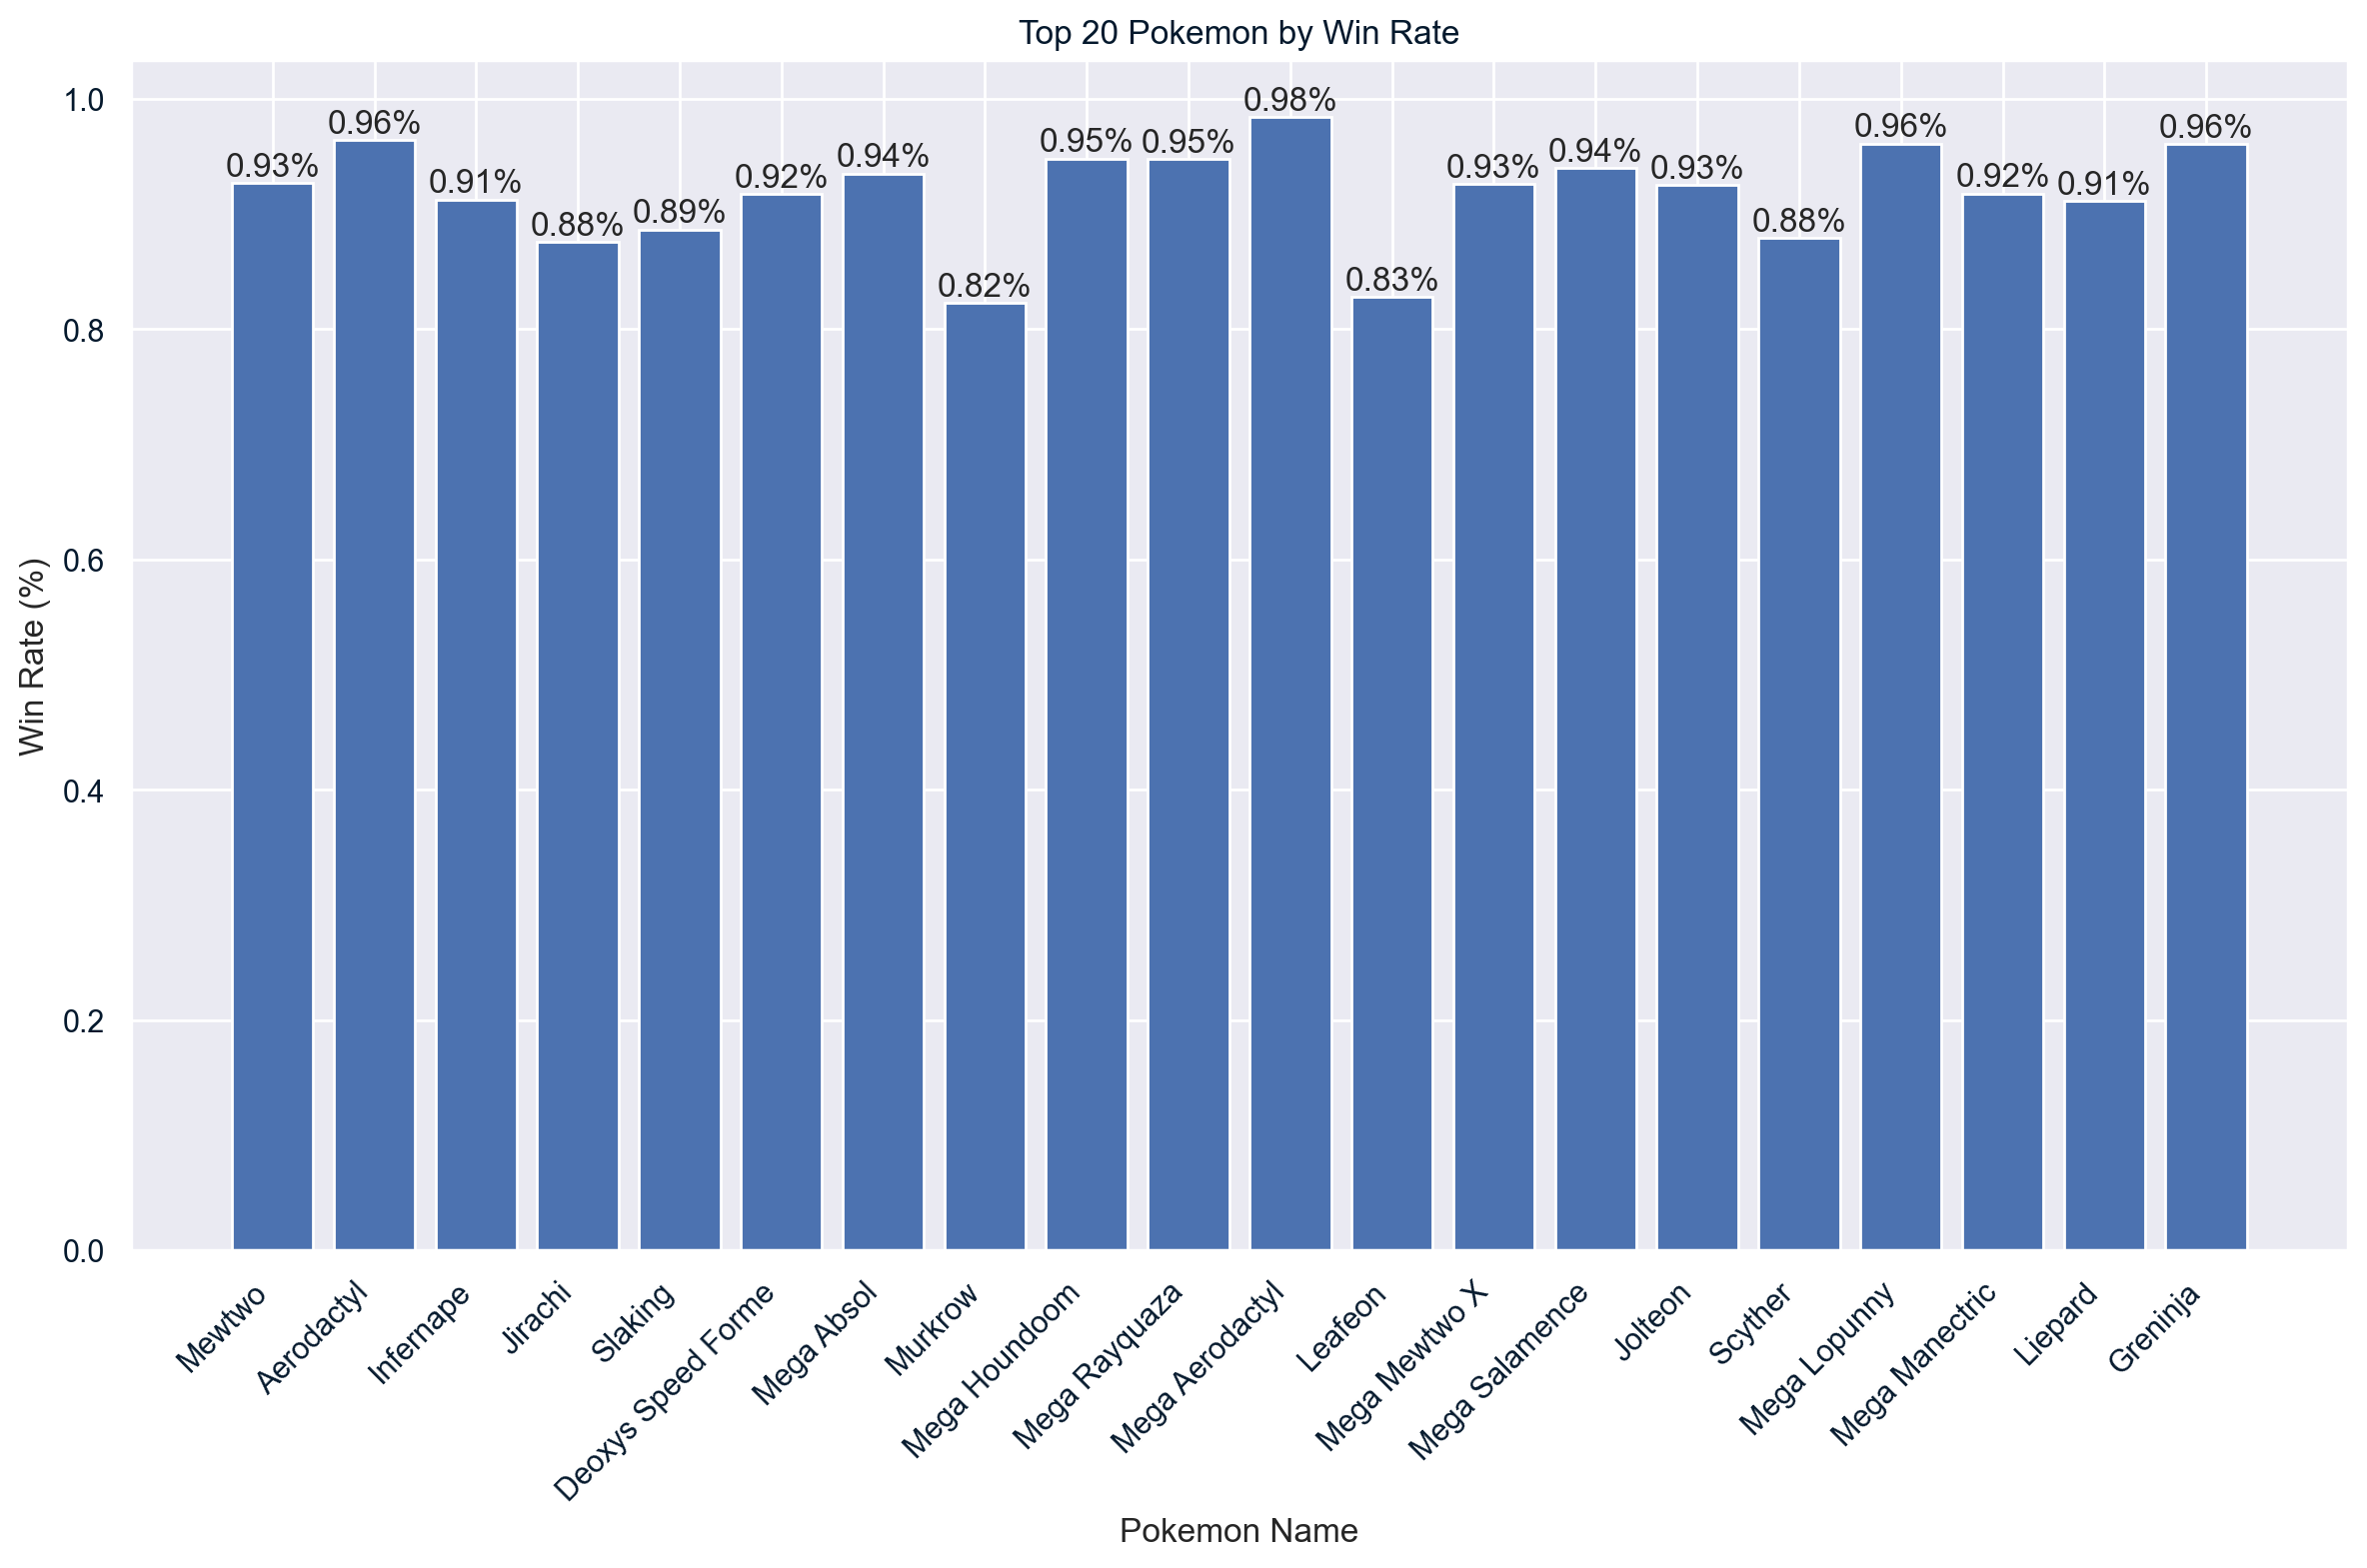

In [72]:
# Correcting Mewtwo's win rate before plotting
top_20_by_wins.loc[top_20_by_wins['Name'] == 'Mewtwo', 'Win_rate'] = 0.9268 # Converting to percentage

plt.figure(figsize=(12, 8))
plt.bar(top_20_by_wins['Name'], top_20_by_wins['Win_rate'], label='Win Rate')

# Adding the corrected win rates as text labels on the bars
for index, value in enumerate(top_20_by_wins['Win_rate']):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.xlabel('Pokemon Name')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45, ha="right")
plt.title('Top 20 Pokemon by Win Rate')
plt.tight_layout()
plt.show()

We can see the opposite effect when looking solely at number of wins. Despite Murkrow and Leafeon having a high number of wins, they have a winrate of 0.82% and 0.83% making them unideal candidates for the "best pokemon"

Cross-Validation Scores: [0.95310063 0.96407605 0.97037171 0.96260604 0.96567062]
Mean CV Score: 0.963165009303156
Coefficient: [0.0075827]
Intercept: 0.01731462895895569


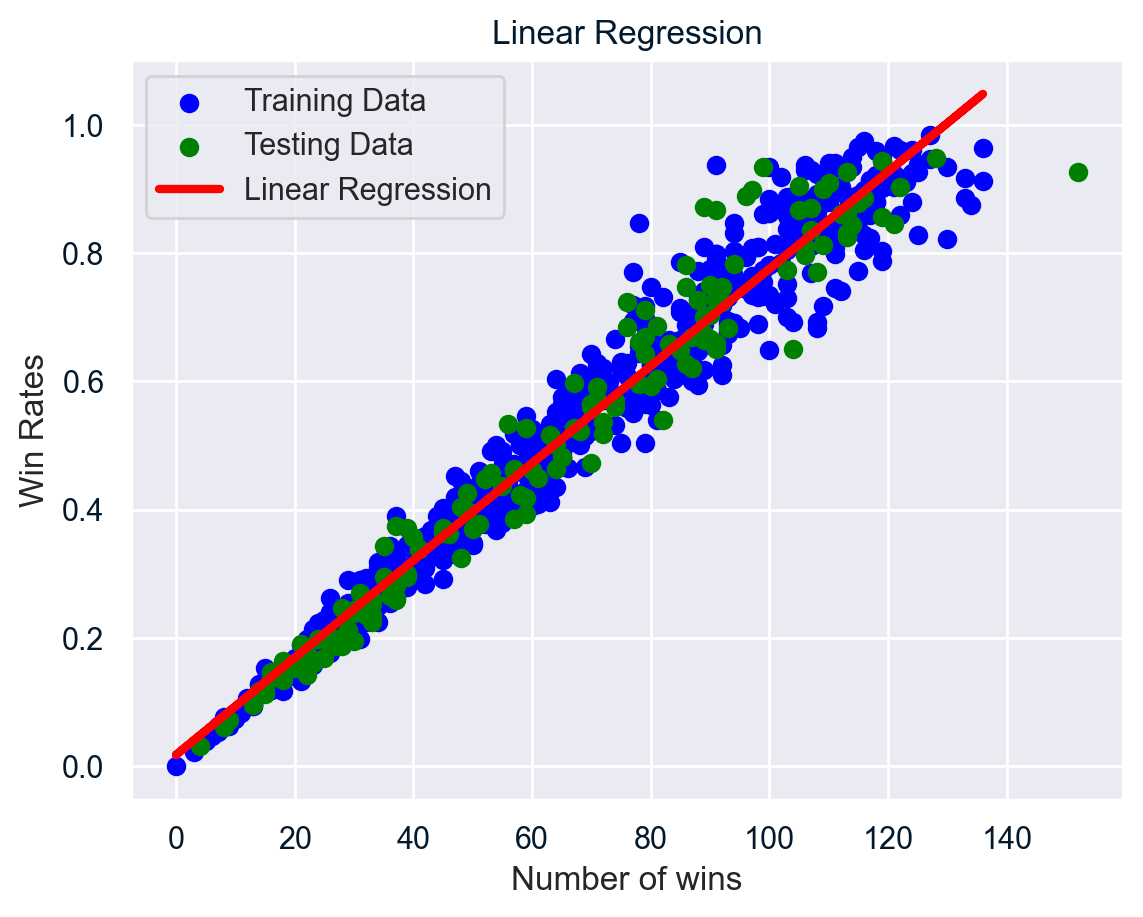

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Load the dataset
data = pd.read_csv('combatsWinRate.csv')

# Convert 'Num_of_Wins' and 'Win_rate' columns to numeric
data['Num_of_Wins'] = pd.to_numeric(data['Num_of_Wins'], errors='coerce')
data['Win_rate'] = pd.to_numeric(data['Win_rate'], errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Define features and target variable
X = data[['Num_of_Wins']]
y = data['Win_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Calculate cross-validation score
cv_score = cross_val_score(lin_reg, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_score)
print("Mean CV Score:", cv_score.mean())

# Print the coefficients
print("Coefficient:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Plot the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_train, lin_reg.predict(X_train), color='red', linewidth=3, label='Linear Regression')
plt.xlabel('Number of wins')
plt.ylabel('Win Rates')
plt.title('Linear Regression')
plt.legend()
plt.show()

Due to the established importance of both of these factors. It was decided to find a proper model between the two. Naive Bayes was considered but due to Win Rates having a dependence on Number of Wins that idea was cut short. To no surprise the linear regression was the optimal choice when comparing the two variables with a mean CV score of 0.9631. We can make note how the variance in the data increases as the number of wins increase.

In [74]:
import pandas as pd

# Load the data
combatsWinRate = pd.read_csv('combatsWinRate.csv')

# Rank Pokemon based on win rate and number of wins
combatsWinRate['WinRateRank'] = combatsWinRate['Win_rate'].rank(ascending=False)
combatsWinRate['NumWinsRank'] = combatsWinRate['Num_of_Wins'].rank(ascending=False)

# Calculate composite score: 70% WinRateRank + 30% NumWinsRank
combatsWinRate['CompositeScore'] = (0.7 * combatsWinRate['WinRateRank']) + (0.3 * combatsWinRate['NumWinsRank'])

# Sort by CompositeScore
combatsWinRate_sorted = combatsWinRate.sort_values(by='CompositeScore')

# Display the top 20 Pokemon based on the composite score
combatsWinRate_sorted.head(20)

First_pokemon  Second_pokemon  ...  NumWinsRank  CompositeScore
154            537             734  ...         10.5            3.85
153             16             110  ...          2.5            4.25
476            665             170  ...         16.0            9.00
703             59             118  ...         24.5            9.45
248              4             150  ...          9.0           10.40
726            365             680  ...         21.0           11.20
426              1             679  ...         10.5           11.55
512             69             212  ...         45.5           15.05
164            483             400  ...         31.0           15.60
409            440             525  ...         13.0           15.80
393            540             714  ...          7.5           16.25
716            703             732  ...         36.5           16.55
19             563             578  ...         52.0           18.40
275            795             437  ...         31.0           18.75
23             121             355  ...         31.0           18.75
162             97             316  ...          1.0           19.20
349            773             582  ...         57.5           24.25
163            416             397  ...         13.0           24.90
146            380             547  ...         16.0           26.50
431            410             278  ...          5.5           27.55

[20 rows x 10 columns]

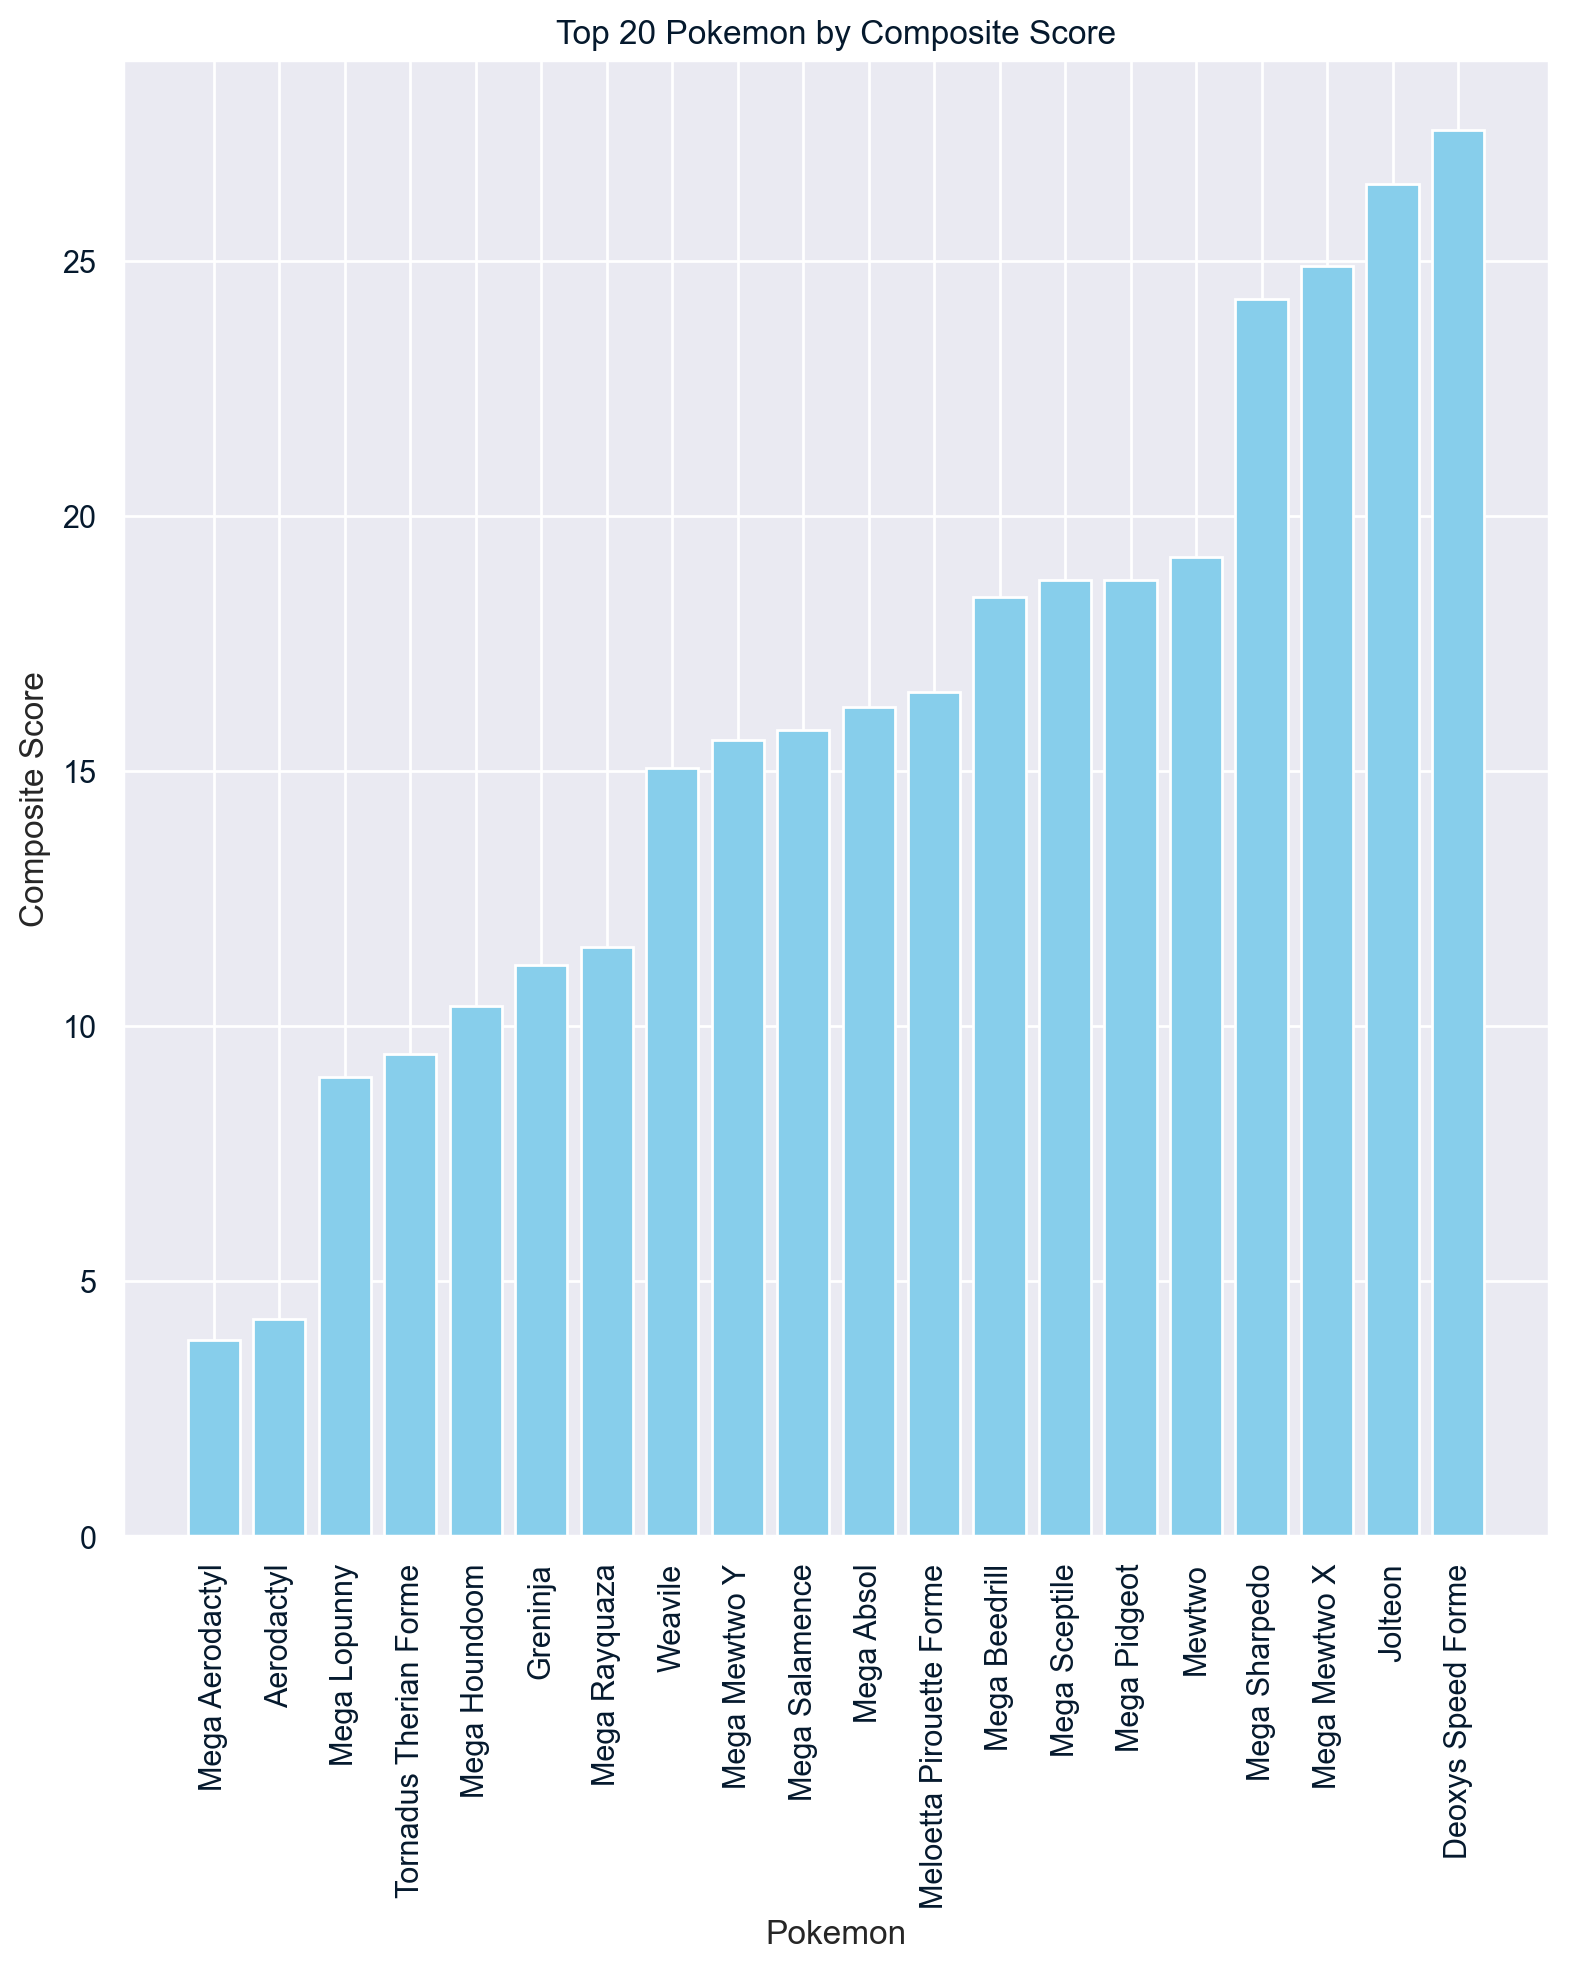

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combatsWinRate and pokemon data
combatsWinRate = pd.read_csv('combatsWinRate.csv')
pokemon = pd.read_csv('pokemon.csv')

# Merge the two DataFrames on the '#' column
merged_data = pd.merge(combatsWinRate, pokemon, on='#')

# Rank Pokemon based on win rate and number of wins
merged_data['WinRateRank'] = merged_data['Win_rate'].rank(ascending=False)
merged_data['NumWinsRank'] = merged_data['Num_of_Wins'].rank(ascending=False)

# Calculate composite score: 70% WinRateRank + 30% NumWinsRank
merged_data['CompositeScore'] = (0.7 * merged_data['WinRateRank']) + (0.3 * merged_data['NumWinsRank'])

# Sort by CompositeScore in ascending order
top_20 = merged_data.sort_values(by='CompositeScore').head(20)

# Plotting
plt.figure(figsize=(8, 10))
plt.bar(top_20['Name'], top_20['CompositeScore'], color='skyblue')
plt.ylabel('Composite Score')
plt.xlabel('Pokemon')
plt.title('Top 20 Pokemon by Composite Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



To achieve a good balance between win rate and number of wins I decided to go with a composite score of 70% WR and 30% Num of Wins. Prioritizing win rate over the number of wins in the composite score emphasizes consistency and strategic value, reflecting a Pokemon's ability to consistently perform well in battles and adapt to various scenarios in competitive play. On top of this if I kept the 50-50 split Aerodactly would be considered better than Mega Aerodactly despite Mega evolutions outclassing their counterparts in every way.

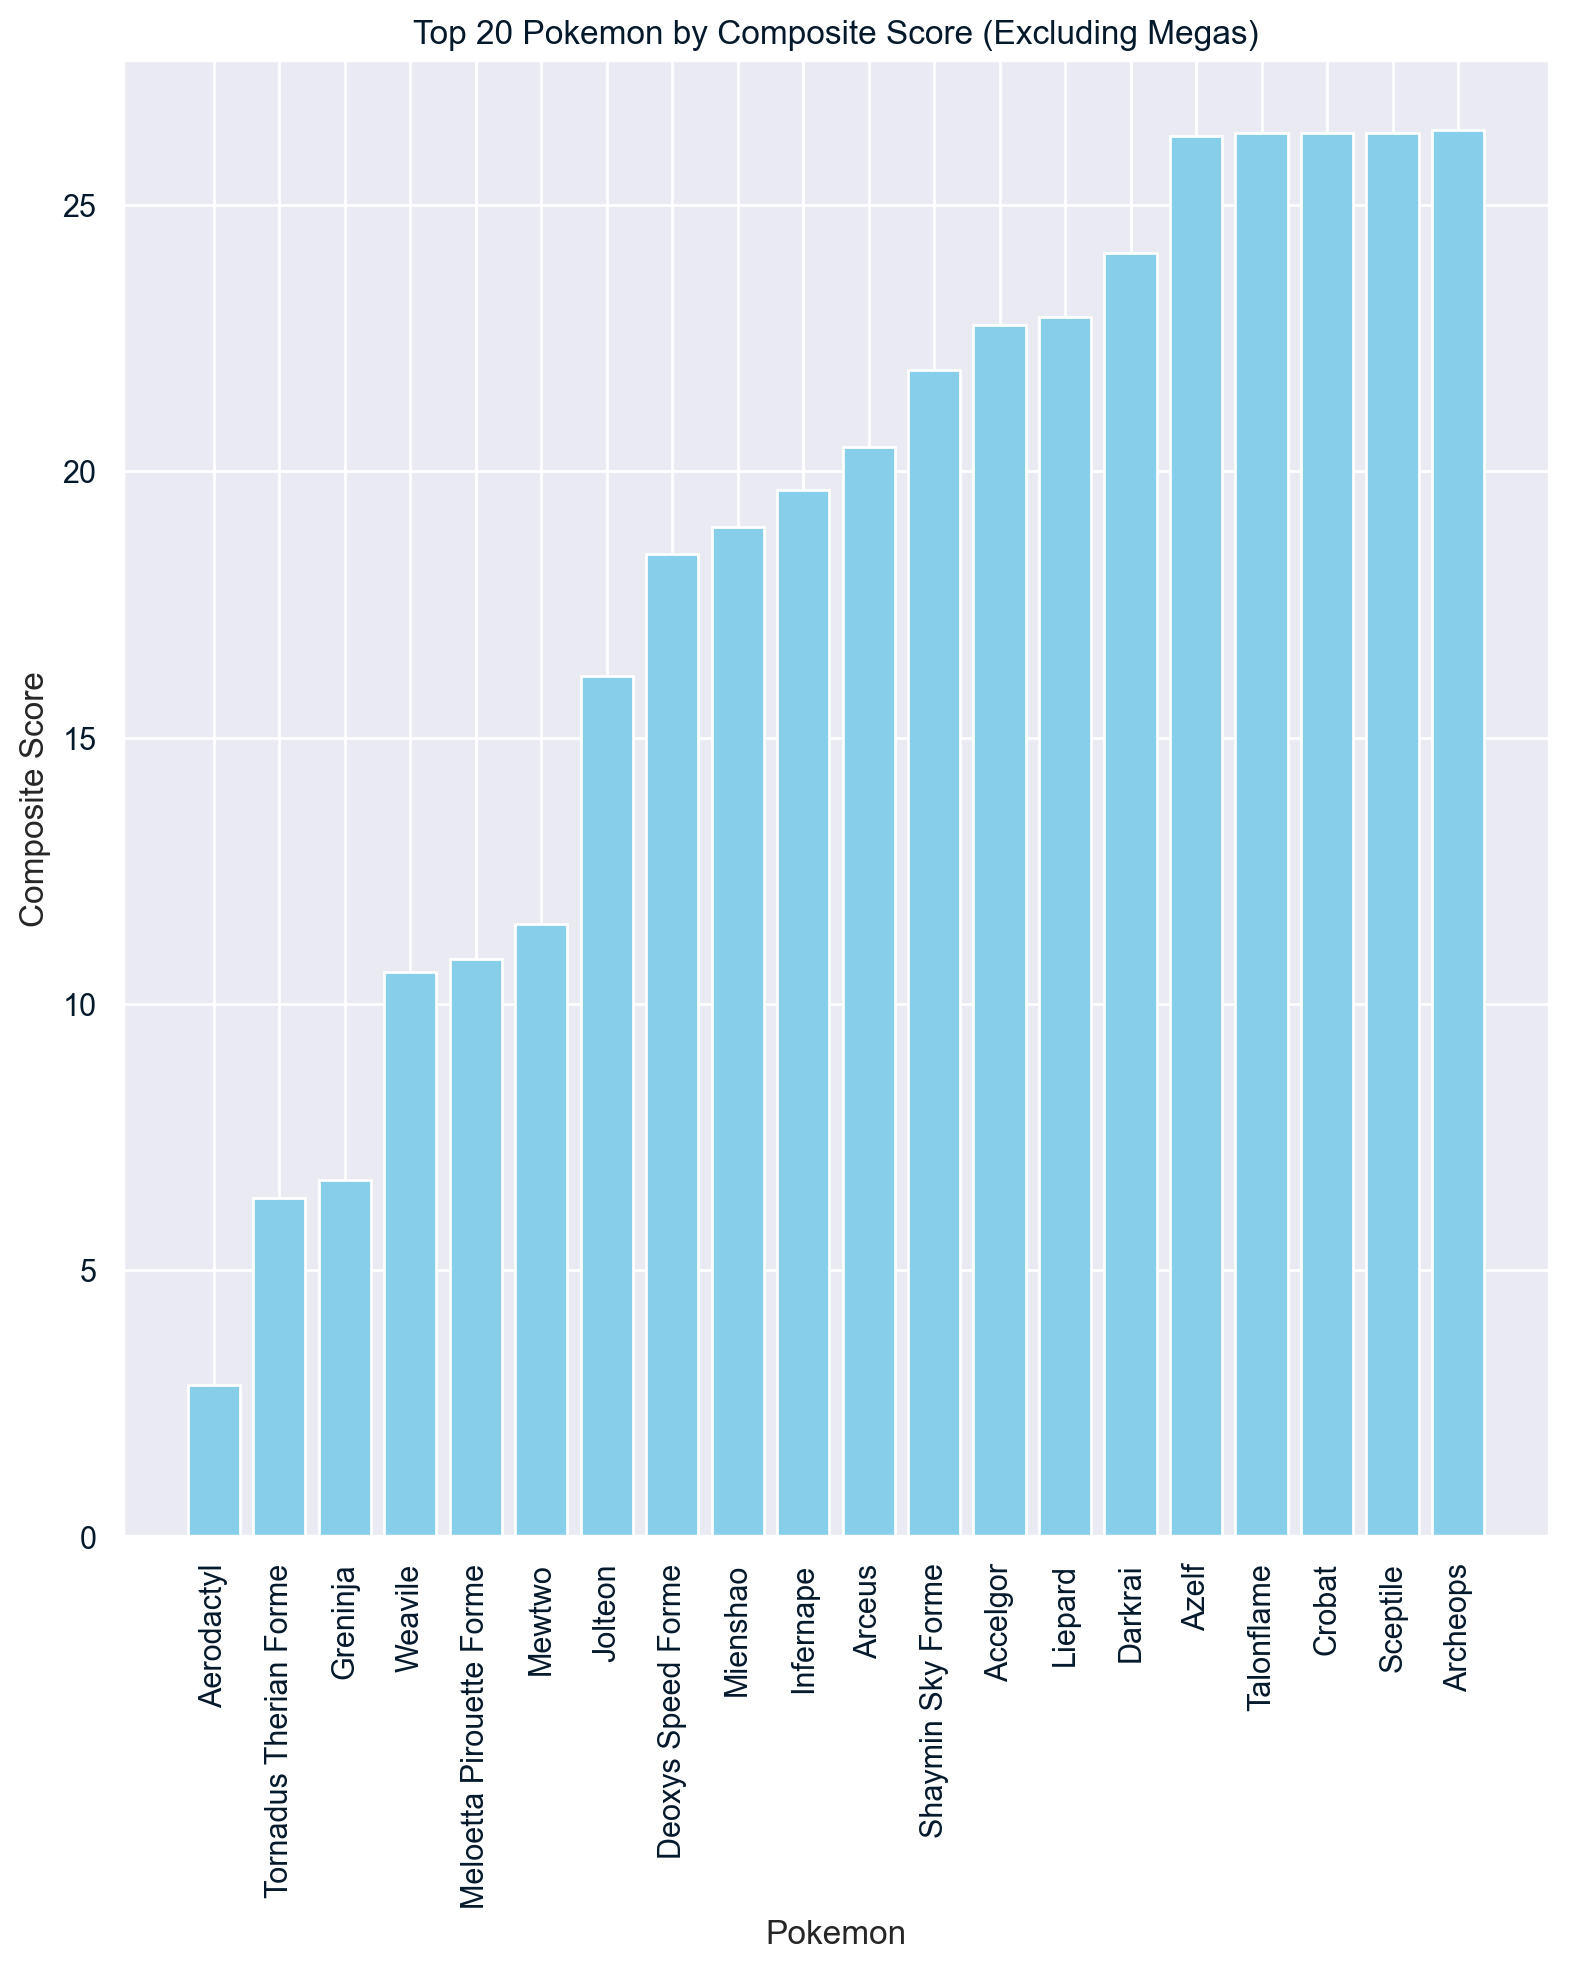

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combatsWinRate and pokemon data
combatsWinRate = pd.read_csv('combatsWinRate.csv')
pokemon = pd.read_csv('pokemon.csv')

# Merge the two DataFrames on the '#' column
merged_data = pd.merge(combatsWinRate, pokemon, on='#')

# Remove entries containing 'Mega' in the 'Name' column
merged_data = merged_data[~merged_data['Name'].str.contains('Mega', na=False)]

# Rank Pokemon based on win rate and number of wins
merged_data['WinRateRank'] = merged_data['Win_rate'].rank(ascending=False)
merged_data['NumWinsRank'] = merged_data['Num_of_Wins'].rank(ascending=False)

# Calculate composite score: 70% WinRateRank + 30% NumWinsRank
merged_data['CompositeScore'] = (0.7 * merged_data['WinRateRank']) + (0.3 * merged_data['NumWinsRank'])

# Sort by CompositeScore in ascending order
top_20 = merged_data.sort_values(by='CompositeScore').head(20)

# Plotting
plt.figure(figsize=(8, 10))
plt.bar(top_20['Name'], top_20['CompositeScore'], color='skyblue')
plt.ylabel('Composite Score')
plt.xlabel('Pokemon')
plt.title('Top 20 Pokemon by Composite Score (Excluding Megas)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





When looking at non-evolution forms Aerodactly still holds supreme scoring 5th in win rate and 2.5 in number of wins. 

It's important to note that a few pokemon were omitted from this data as they did not compete in any combat within the combats.csv file. These are: Blastoise,  Sandshrew, Wigglytuff, Poliwag, Victreebel, Magneton, Ditto, Ariados, Ursaring, 
Lairon, Mega Latias, Honchkrow, Servine, Maractus, Jellicent, and Pumpkaboo Small Size.

Despite the nuance when it came to determining the best pokemon, there was a clear loser amongst them all being Shuckle who in their 135 matches they had 0 wins.

## Question 3: Battle Dynamics by Pokémon Type
- **Which type wins the most battles? Which types are more offensive versus defensive?**
- **Within each type, which are the top 5 Pokémon choices? What combination of first and second type Pokemon are best suited for battle?**

In [24]:
#Emily's Exploratory Data Analysis
# Merging the Pokémon stats with the combat data based on the 'Winner' column
merged_winners = pd.merge(battles, pokemon, left_on='Winner', right_on='#', how='left')

#Rename Column names
merged_winners.rename(columns = {'Name':'Winner Name', 'Type 1':'Winner Type 1', 'Type 2':'Winner Type 2'}, inplace = True)

#Deleting Unnecessary Columns
merged_winners = merged_winners.drop(columns = ['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])

# Merging the Pokémon stats with the merged_winners data based on the 'First_pokemon' column
merged_winners = pd.merge(merged_winners, pokemon, left_on='First_pokemon', right_on='#', how='left')

#Rename Column names
merged_winners.rename(columns = {'Name':'First Pokemon Name', 'Type 1':'First Pokemon Type 1', 'Type 2':'First Pokemon Type 2'}, inplace = True)

#Deleting Unnecessary Columns
merged_winners = merged_winners.drop(columns = ['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])

# Merging the Pokémon stats with the merged_winners data based on the 'Second_pokemon' column
merged_winners = pd.merge(merged_winners, pokemon, left_on='Second_pokemon', right_on='#', how='left')

#Rename Column names
merged_winners.rename(columns = {'Name':'Second Pokemon Name', 'Type 1':'Second Pokemon Type 1', 'Type 2':'Second Pokemon Type 2'}, inplace = True)

#Deleting Unnecessary Columns
merged_winners = merged_winners.drop(columns = ['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])

#Rearranging Columns
merged_winners = merged_winners[['First_pokemon', 'First Pokemon Name', 'First Pokemon Type 1', 'First Pokemon Type 2', 'Second_pokemon', 'Second Pokemon Name', 'Second Pokemon Type 1', 'Second Pokemon Type 2', 'Winner', 'Winner Name', 'Winner Type 1', 'Winner Type 2']]

#Sorting Winner Dataframe by number of wins
merged_winners_count = merged_winners['Winner Name'].value_counts().rename_axis('Pokemon Name').reset_index(name='Win Count')

# Merging the Pokémon stats with the Winner Count data based on the 'Pokemon Name' col
merged_winners_count = pd.merge(merged_winners_count, pokemon, left_on='Pokemon Name', right_on='Name', how='left')

#Deleting Unnecessary Columns
merged_winners_count = merged_winners_count.drop(columns = ['#','Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])

#Giving a value for nulls in Type 2
merged_winners_count["Type 2"].fillna("No Second Type", inplace = True) 

#define how to aggregate various fields
agg_functions = {'Type 1':'first', 'Type 2':'first', 'Win Count':'sum'}

#create new DataFrame grouping by Type 2
merged_winners_count_Type2 = merged_winners_count.groupby(['Type 1','Type 2']).aggregate(agg_functions)

#Sort Data by win count of the 1st and 2nd types
merged_winners_count_Type2 = merged_winners_count_Type2.sort_values(by=['Win Count'], ascending = False)

#reset index
merged_winners_count_Type2 = merged_winners_count_Type2.reset_index(drop=True)

#finding how many pokemon are in each type 1 and type 2 combo
merged_winners_count_Type2_count = merged_winners_count.groupby(['Type 1','Type 2']).size().to_frame('Amount of Pokemon')

# Merging the count of different types and subtypes with the total win counts for types and subtypes
merged_winners_count_Type2 = pd.merge(merged_winners_count_Type2, merged_winners_count_Type2_count, on=['Type 1','Type 2'], how='left')

#finding average win count for each type
merged_winners_count_Type2['Average Win Count'] = merged_winners_count_Type2['Win Count']/merged_winners_count_Type2['Amount of Pokemon']

#Sort Data by win count and 2nd type
merged_winners_count_Type2 = merged_winners_count_Type2.sort_values(by=['Average Win Count'], ascending = False)

#reset index
merged_winners_count_Type2 = merged_winners_count_Type2.reset_index(drop=True)

#Separating Grass Type Winners
grassWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Grass']

#reset index
grassWins_count = grassWins_count.reset_index(drop=True)

#Separating Rock Type Winners
rockWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Rock']

#reset index
rockWins_count = rockWins_count.reset_index(drop=True)

#Separating Psychic Type Winners
psychicWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Psychic']

#reset index
psychicWins_count = psychicWins_count.reset_index(drop=True)

#Separating Dragon Type Winners
dragonWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Dragon']

#reset index
dragonWins_count = dragonWins_count.reset_index(drop=True)

#Separating Bug Type Winners
bugWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Bug']

#reset index
bugWins_count = bugWins_count.reset_index(drop=True)

#Separating Ice Type Winners
iceWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Ice']

#reset index
iceWins_count = iceWins_count.reset_index(drop=True)

#Separating Ghost Type Winners
ghostWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Ghost']

#reset index
ghostWins_count = ghostWins_count.reset_index(drop=True)

#Separating Water Type Winners
waterWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Water']

#reset index
waterWins_count = waterWins_count.reset_index(drop=True)

#Separating Electric Type Winners
electricWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Electric']

#reset index
electricWins_count = electricWins_count.reset_index(drop=True)

#Separating Fighting Type Winners
fightingWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Fighting']

#reset index
fightingWins_count = fightingWins_count.reset_index(drop=True)

#Separating Dark Type Winners
darkWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Dark']

#reset index
darkWins_count = darkWins_count.reset_index(drop=True)

#Separating Ground Type Winners
groundWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Ground']

#reset index
groundWins_count = groundWins_count.reset_index(drop=True)

#Separating Normal Type Winners
normalWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Normal']

#reset index
normalWins_count = normalWins_count.reset_index(drop=True)

#Separating Poison Type Winners
poisonWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Poison']

#reset index
poisonWins_count = poisonWins_count.reset_index(drop=True)

#Separating Fire Type Winners
fireWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Fire']

#reset index
fireWins_count = fireWins_count.reset_index(drop=True)

#Separating Steel Type Winners
steelWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Steel']

#reset index
steelWins_count = steelWins_count.reset_index(drop=True)

#Separating Flying Type Winners
flyingWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Flying']

#reset index
flyingWins_count = flyingWins_count.reset_index(drop=True)

#Separating Fairy Type Winners
fairyWins_count = merged_winners_count[merged_winners_count['Type 1'] == 'Fairy']

#reset index
fairyWins_count = fairyWins_count.reset_index(drop=True)

In [25]:
#display Normal Top 5 
normalWins_count.head()

Pokemon Name  Win Count  Type 1          Type 2
0       Slaking        133  Normal  No Second Type
1  Mega Lopunny        124  Normal        Fighting
2     Regigigas        122  Normal  No Second Type
3        Dodrio        121  Normal          Flying
4  Mega Pidgeot        119  Normal          Flying

In [ ]:
#display Fighting Top 5 
fightingWins_count.head()

In [ ]:
#display Flying Top 5 
flyingWins_count.head()

In [ ]:
#display Poison Top 5 
poisonWins_count.head()

In [ ]:
#display Ground Top 5 
groundWins_count.head()

In [ ]:
#display Rock Top 5 
rockWins_count.head()

In [ ]:
#display Bug Top 5 
bugWins_count.head()

In [ ]:
#display Ghost Top 5 
ghostWins_count.head()

In [ ]:
#display Steel Top 5 
steelWins_count.head()

In [ ]:
#display Fire Top 5 
fireWins_count.head()

In [ ]:
#display Water Top 5 
waterWins_count.head()

In [ ]:
#display Grass Top 5 
grassWins_count.head()

In [ ]:
#display Electric Top 5 
electricWins_count.head()

In [ ]:
#display Psychic Top 5 
psychicWins_count.head()

In [ ]:
#display Ice Top 5 
iceWins_count.head()

In [ ]:
#display Dragon Top 5 
dragonWins_count.head()

In [ ]:
#display Dark Top 5 
darkWins_count.head()

In [ ]:
#display Fairy Top 5 
fairyWins_count.head()

In [ ]:
#display Top 5 Type Combinations
merged_winners_count_Type2.head()

## 4.2 Statistical Analysis / Machine Learning Models
Detail the statistical methods or machine learning models applied. Discuss why these methods were chosen and how they were implemented (including any programming tools or libraries used).


### Creating the DataFrame for Pokémon Battle Predictions
To predict the outcomes of Pokémon battles, we have structured our data in a DataFrame that encapsulates essential statistics and attributes for each Pokémon involved in a battle. Here's an overview of the key components of our DataFrame:

- **Pokémon IDs**: `First_pokemon` and `Second_pokemon` columns contain the IDs of the Pokémon in each battle.
- **Types**: `First_Type_1`, `First_Type_2`, `Second_Type_1`, `Second_Type_2` represent the primary and secondary types of the battling Pokémon, which are crucial for determining battle dynamics based on type advantages.
- **Battle Stats**: Each Pokémon's battle stats including `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` are listed separately for the first and second Pokémon.
- **Battle Outcome**: The `First_wins` column indicates the battle outcome, with '1' meaning the first Pokémon wins and '0' indicating a win for the second Pokémon.


In [3]:

# Load the datasets
pokemon_data = pd.read_csv('pokemon.csv')
combats_data = pd.read_csv('combats.csv')

# Merging the Pokémon stats for the first Pokémon
combined_df_new = pd.merge(combats_data, pokemon_data, left_on='First_pokemon', right_on='#', how='left')
combined_df_new.rename(columns={'HP': 'First_HP', 'Attack': 'First_Attack', 'Defense': 'First_Defense',
                            'Sp. Atk': 'First_Sp_Atk', 'Sp. Def': 'First_Sp_Def', 'Speed': 'First_Speed',
                            'Generation': 'First_Generation', 'Legendary': 'First_Legendary',
                            'Type 1': 'First_Type_1', 'Type 2': 'First_Type_2'}, inplace=True)

# Merging the Pokémon stats for the second Pokémon
combined_df_new = pd.merge(combined_df_new, pokemon_data, left_on='Second_pokemon', right_on='#', how='left', suffixes=('', '_Second'))
combined_df_new.rename(columns={'HP': 'Second_HP', 'Attack': 'Second_Attack', 'Defense': 'Second_Defense',
                            'Sp. Atk': 'Second_Sp_Atk', 'Sp. Def': 'Second_Sp_Def', 'Speed': 'Second_Speed',
                            'Generation': 'Second_Generation', 'Legendary': 'Second_Legendary',
                            'Type 1': 'Second_Type_1', 'Type 2': 'Second_Type_2'}, inplace=True)

# Creating a binary target variable indicating whether the first Pokémon won
combined_df_new['First_wins'] = (combined_df_new['Winner'] == combined_df_new['First_pokemon']).astype(int)

# Dropping the original Winner and # columns, plus the specified columns
combined_df_new.drop(columns=['First_pokemon', 'Second_pokemon','Winner', '#', '#_Second', 'Name', 'First_Generation', 
                          'First_Legendary', 'Name_Second', 'Second_Generation', 'Second_Legendary'], inplace=True)

# Display the first few rows of the prepared dataset
print(combined_df_new.head())
#combined_df_new.columns
print(combined_df_new.columns)
combined_df_new.to_csv('plswork.csv',index=False)


  First_Type_1 First_Type_2  First_HP  ...  Second_Sp_Def  Second_Speed  First_wins
0         Rock       Ground        50  ...             40            60           0
1        Grass     Fighting        91  ...             90           108           0
2        Fairy       Flying        55  ...             95            40           0
3         Fire          NaN        40  ...             90            48           0
4         Rock        Water        70  ...            230             5           1

[5 rows x 17 columns]
Index(['First_Type_1', 'First_Type_2', 'First_HP', 'First_Attack',
       'First_Defense', 'First_Sp_Atk', 'First_Sp_Def', 'First_Speed',
       'Second_Type_1', 'Second_Type_2', 'Second_HP', 'Second_Attack',
       'Second_Defense', 'Second_Sp_Atk', 'Second_Sp_Def', 'Second_Speed',
       'First_wins'],
      dtype='object')


#### Creating the Type Effectiveness Matrix

A type effectiveness matrix is created to quantitatively define how each Pokémon type fares against all other types. This matrix is essential for understanding the dynamics of Pokémon battles, as it quantifies the interactions between different types:

- **Type Interactions**: Each Pokémon type (e.g., Normal, Fire, Water) can be more or less effective against others. For example, water-type moves are highly effective against fire-type Pokémon but less effective against grass-type Pokémon.
- **Effectiveness Values**: These interactions are represented by numeric values such as 1 for normal effectiveness, 2 for double effectiveness, and 0.5 for half effectiveness, indicating the relative strength or weakness of one type against another.


In [4]:
type_effectiveness_data = {
    'Attack/Defense': [
        'Normal', 'Fighting', 'Flying', 'Poison', 'Ground', 'Rock', 'Bug', 
        'Ghost', 'Steel', 'Fire', 'Water', 'Grass', 'Electric', 'Psychic', 
        'Ice', 'Dragon', 'Dark', 'Fairy'
    ],
    'Normal': [1, 2, 1, 1, 1, 0.5, 1, 0, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Fighting': [1, 1, 0.5, 0.5, 1, 2, 0.5, 0, 2, 1, 1, 1, 1, 0.5, 2, 1, 2, 0.5],
    'Flying': [1, 2, 1, 1, 1, 0.5, 2, 1, 0.5, 1, 1, 2, 0.5, 1, 1, 1, 1, 1],
    'Poison': [1, 1, 1, 0.5, 0.5, 0.5, 1, 0.5, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2],
    'Ground': [1, 1, 0, 2, 1, 2, 0.5, 1, 2, 2, 1, 0.5, 2, 1, 1, 1, 1, 1],
    'Rock': [1, 0.5, 2, 1, 0.5, 1, 2, 1, 0.5, 2, 1, 1, 1, 1, 2, 1, 1, 1],
    'Bug': [1, 0.5, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 0.5, 1, 2, 1, 2, 1, 1, 2, 0.5],
    'Ghost': [0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0.5, 1],
    'Steel': [1, 1, 1, 1, 1, 2, 1, 1, 0.5, 0.5, 0.5, 1, 0.5, 1, 2, 1, 1, 2],
    'Fire': [1, 1, 1, 1, 1, 0.5, 2, 1, 2, 0.5, 0.5, 2, 1, 1, 2, 0.5, 1, 1],
    'Water': [1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0.5, 0.5, 1, 1, 1, 0.5, 1, 1],
    'Grass': [1, 1, 0.5, 0.5, 2, 2, 0.5, 1, 0.5, 0.5, 2, 0.5, 1, 1, 1, 0.5, 1, 1],
    'Electric': [1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0.5, 0.5, 1, 1, 0.5, 1, 1],
    'Psychic': [1, 2, 1, 2, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 0.5, 1, 1, 0, 1],
    'Ice': [1, 1, 2, 1, 2, 1, 1, 1, 0.5, 0.5, 0.5, 2, 1, 1, 0.5, 2, 1, 1],
    'Dragon': [1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 2, 1, 0],
    'Dark': [1, 0.5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0.5, 0.5],
    'Fairy': [1, 2, 1, 0.5, 1, 1, 1, 1, 0.5, 0.5, 1, 1, 1, 1, 1, 2, 2, 1]
}

# Convert the dictionary into a pandas DataFrame
type_effectiveness_df = pd.DataFrame(type_effectiveness_data)

# Set the index to be the attacking types
type_effectiveness_df = type_effectiveness_df.set_index('Attack/Defense')

# Display the DataFrame to ensure it's correct
print(type_effectiveness_df)
print(type_effectiveness_df.index)
print()

                Normal  Fighting  Flying  Poison  ...  Ice  Dragon  Dark  Fairy
Attack/Defense                                    ...                          
Normal             1.0       1.0     1.0     1.0  ...  1.0     1.0   1.0    1.0
Fighting           2.0       1.0     2.0     1.0  ...  1.0     1.0   0.5    2.0
Flying             1.0       0.5     1.0     1.0  ...  2.0     1.0   1.0    1.0
Poison             1.0       0.5     1.0     0.5  ...  1.0     1.0   1.0    0.5
Ground             1.0       1.0     1.0     0.5  ...  2.0     1.0   1.0    1.0
Rock               0.5       2.0     0.5     0.5  ...  1.0     1.0   1.0    1.0
Bug                1.0       0.5     2.0     1.0  ...  1.0     1.0   1.0    1.0
Ghost              0.0       0.0     1.0     0.5  ...  1.0     1.0   2.0    1.0
Steel              0.5       2.0     0.5     0.0  ...  0.5     0.5   1.0    0.5
Fire               1.0       1.0     1.0     1.0  ...  0.5     1.0   1.0    0.5
Water              1.0       1.0     1.0

#### Integrating Type Effectiveness into Battle Predictions

The effectiveness of each Pokémon's type combinations in a battle is calculated to enhance the predictions of battle outcomes:

- **Comparative Analysis**: By comparing the types of two Pokémon in a battle, their respective effectiveness scores are calculated to predict which Pokémon is more likely to win based on their type advantages.
- **Effectiveness Calculation**: The effectiveness scores are derived by considering both the primary and secondary types of the battling Pokémon, providing a nuanced view of the battle dynamics.

In [5]:
# Function to calculate the combined effectiveness of a Pokémon's attack types against another Pokémon's defense types
def calculate_effectiveness(attacker_types, defender_types, type_effectiveness_df):
    effectiveness = 1.0
    # Loop through each combination of attacker and defender types
    for att_type in attacker_types:
        if pd.notna(att_type):  # Skip if attacker type is NaN
            for def_type in defender_types:
                if pd.notna(def_type):  # Skip if defender type is NaN
                    # Multiply effectiveness if both attacker and defender types are present
                    effectiveness *= type_effectiveness_df.loc[att_type, def_type]
    return effectiveness

# Add the calculated effectiveness as new features in the combined_df_new DataFrame
# Here, we are renaming the columns to reflect the actual calculations
combined_df_new['Second_vs_First_Effectiveness'] = combined_df_new.apply(
    lambda row: calculate_effectiveness(
        [row['First_Type_1'], row['First_Type_2']],  # Attacker types (First Pokémon)
        [row['Second_Type_1'], row['Second_Type_2']],  # Defender types (Second Pokémon)
        type_effectiveness_df
    ),
    axis=1
)

combined_df_new['First_vs_Second_Effectiveness'] = combined_df_new.apply(
    lambda row: calculate_effectiveness(
        [row['Second_Type_1'], row['Second_Type_2']],  # Attacker types (Second Pokémon)
        [row['First_Type_1'], row['First_Type_2']],  # Defender types (First Pokémon)
        type_effectiveness_df
    ),
    axis=1
)
combined_df_new

First_Type_1  ... First_vs_Second_Effectiveness
0             Rock  ...                           0.5
1            Grass  ...                           4.0
2            Fairy  ...                           1.0
3             Fire  ...                           0.5
4             Rock  ...                           4.0
...            ...  ...                           ...
49995       Dragon  ...                           0.5
49996       Ground  ...                           2.0
49997        Water  ...                           1.0
49998     Electric  ...                           0.5
49999         Fire  ...                           2.0

[50000 rows x 19 columns]

### Model Selection: Random Forest Algorithm
For the prediction of battle outcomes, we chose the Random Forest algorithm due to its several advantages:

- **Handling Categorical and Numerical Data**: The ability to handle both categorical variables (Pokémon types) and numerical statistics (battle stats) without extensive preprocessing, which simplifies the model training process.
- **Robustness Against Overfitting**: Utilizes an ensemble of decision trees to improve prediction accuracy and robustness, making it less likely to overfit compared to other single estimator algorithms.
- **Versatility in Feature Integration**: Efficiently integrates diverse data types, making it ideal for our dataset that includes both categorical type data and numerical battle statistics.

By using Random Forest, we can capitalize on its ensemble learning method to provide reliable and accurate predictions of Pokémon battle outcomes based on a comprehensive set of features.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz
from sklearn.tree import export_graphviz

# Assuming the effectiveness calculations and other initializations are already done
# Example function to apply weights based on effectiveness
def weight_effectiveness(effectiveness):
    if effectiveness > 1:
        return effectiveness * 2  # More effective types are given higher weight
    elif effectiveness < 1:
        return effectiveness / 2  # Less effective types are penalized
    return effectiveness  # Neutral effectiveness remains unchanged
#print(combined_df_new.columns)
# Apply weighted effectiveness calculation to your DataFrame
combined_df_new['Weighted_First_vs_Second'] = combined_df_new['First_vs_Second_Effectiveness'].apply(weight_effectiveness)
combined_df_new['Weighted_Second_vs_First'] = combined_df_new['Second_vs_First_Effectiveness'].apply(weight_effectiveness)

print(combined_df_new)
# Drop old type columns and any other unnecessary columns
#combined_df_new.drop(['First_Type_1', 'First_Type_2', 'Second_Type_1', 'Second_Type_2'], axis=1, inplace=True)

# Define features and target
X = combined_df_new.drop(['First_wins', 'First_Type_1', 'First_Type_2', 'Second_Type_1', 'Second_Type_2'], axis=1)  # Now includes weighted effectiveness features
  # Now includes weighted effectiveness features
y = combined_df_new['First_wins']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
#print("Classification Report:")
#print(report)

# Optionally visualize one of the trees from the forest
estimator = clf.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['lose', 'win'],
                           filled=True, rounded=True,  
                           special_characters=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png")
#graph.render("decision_tree1", cleanup=True)  # Saves the tree diagram to a file named 'decision_tree1.png'


      First_Type_1  ... Weighted_Second_vs_First
0             Rock  ...                    8.000
1            Grass  ...                    0.250
2            Fairy  ...                    1.000
3             Fire  ...                    1.000
4             Rock  ...                    1.000
...            ...  ...                      ...
49995       Dragon  ...                    1.000
49996       Ground  ...                    0.000
49997        Water  ...                    1.000
49998     Electric  ...                    0.125
49999         Fire  ...                    0.250

[50000 rows x 21 columns]


In [9]:
# Load the test data
tests_df = pd.read_csv('tests.csv')

# Merge Pokémon stats for the first Pokémon in test data
tests_df = pd.merge(tests_df, pokemon_data, left_on='First_pokemon', right_on='#', how='left')
tests_df.rename(columns={'HP': 'First_HP', 'Attack': 'First_Attack', 'Defense': 'First_Defense',
                            'Sp. Atk': 'First_Sp_Atk', 'Sp. Def': 'First_Sp_Def', 'Speed': 'First_Speed',
                            'Type 1': 'First_Type_1', 'Type 2': 'First_Type_2'}, inplace=True)

# Merge Pokémon stats for the second Pokémon in test data
tests_df = pd.merge(tests_df, pokemon_data, left_on='Second_pokemon', right_on='#', how='left', suffixes=('', '_Second'))
tests_df.rename(columns={'HP': 'Second_HP', 'Attack': 'Second_Attack', 'Defense': 'Second_Defense',
                            'Sp. Atk': 'Second_Sp_Atk', 'Sp. Def': 'Second_Sp_Def', 'Speed': 'Second_Speed',
                            'Type 1': 'Second_Type_1', 'Type 2': 'Second_Type_2'}, inplace=True)

# Drop unnecessary columns that are not used in the model
tests_df.drop(columns=['#', '#_Second', 'Name', 'Name_Second'], inplace=True)
tests_df

First_pokemon  Second_pokemon  ... Generation_Second Legendary_Second
0               129             117  ...                 1            False
1               660             211  ...                 2            False
2               706             115  ...                 1            False
3               195             618  ...                 5            False
4                27             656  ...                 5            False
...             ...             ...  ...               ...              ...
9995            216             498  ...                 4            False
9996            113             404  ...                 3            False
9997            493             104  ...                 1            False
9998            643             259  ...                 2            False
9999            678             531  ...                 4            False

[10000 rows x 22 columns]

In [17]:
# Assuming calculate_effectiveness and weight_effectiveness are defined
# Calculate type effectiveness for the test data
tests_df['First_vs_Second_Effectiveness'] = tests_df.apply(
    lambda row: calculate_effectiveness(
        [row['First_Type_1'], row['First_Type_2']],
        [row['Second_Type_1'], row['Second_Type_2']],
        type_effectiveness_df  # DataFrame with effectiveness data
    ),
    axis=1
)

tests_df['Second_vs_First_Effectiveness'] = tests_df.apply(
    lambda row: calculate_effectiveness(
        [row['Second_Type_1'], row['Second_Type_2']],
        [row['First_Type_1'], row['First_Type_2']],
        type_effectiveness_df
    ),
    axis=1
)

# Apply weights to effectiveness scores
tests_df['Weighted_First_vs_Second'] = tests_df['First_vs_Second_Effectiveness'].apply(weight_effectiveness)
tests_df['Weighted_Second_vs_First'] = tests_df['Second_vs_First_Effectiveness'].apply(weight_effectiveness)
tests_df

First_pokemon  ...  Weighted_Second_vs_First
0               129  ...                      1.00
1               660  ...                      4.00
2               706  ...                      4.00
3               195  ...                      0.25
4                27  ...                      1.00
...             ...  ...                       ...
9995            216  ...                      1.00
9996            113  ...                      1.00
9997            493  ...                      4.00
9998            643  ...                      0.25
9999            678  ...                      0.25

[10000 rows x 26 columns]

In [18]:
# Drop the columns not used in the model, keeping only the relevant features
X_test_new = tests_df.drop(['First_Type_1', 'First_Type_2', 'Second_Type_1', 'Second_Type_2'], axis=1)

# Make sure X_test_new only contains the features used by the model
X_test_new = X_test_new[X_train.columns]  # Ensuring that only columns used in training are included

# Predict using the RandomForest classifier
predicted_outcomes = clf.predict(X_test_new)

# Add predictions back to tests_df for presentation
tests_df['Predicted_Winner'] = predicted_outcomes
tests_df['Predicted_Winner'] = tests_df['Predicted_Winner'].map({1: 'First Pokemon', 0: 'Second Pokemon'})

# Display the results
print(tests_df[['First_pokemon', 'Second_pokemon', 'Predicted_Winner']])

# Optionally, save the results to a CSV file for further analysis or presentation
tests_df.to_csv('predicted_pokemon_battles.csv', index=False)


      First_pokemon  Second_pokemon Predicted_Winner
0               129             117    First Pokemon
1               660             211   Second Pokemon
2               706             115    First Pokemon
3               195             618   Second Pokemon
4                27             656    First Pokemon
...             ...             ...              ...
9995            216             498   Second Pokemon
9996            113             404   Second Pokemon
9997            493             104    First Pokemon
9998            643             259    First Pokemon
9999            678             531   Second Pokemon

[10000 rows x 3 columns]


## 4.3 Results
Present the results of your analysis. Include visualizations such as charts, graphs, or tables that clearly display these findings. Ensure each graphic has a caption explaining what it shows.

# **What is the type of pokemon that wins the most battles?**

There are many different types of pokemons, most with two different types. It would make sense to compare every single type of pokemon and the ones with two types for true valididty, but in actuality it would be advised against. As you can see from the 'win_rate_type_df' data frame, each row has a different type of pokemon, none the same. We would have to compare over 151 pokemons. And in the 'Percent Win Rate Overall' column, we did just that. You can see that the percentages are so low that we can't really get any information out of that data.

In [1]:
#This dataframe is to check which type of pokemon wins the most battles
import pandas as pd

#Load pokemon win rate by type data
win_rate_type_df = pd.read_csv('Pokemon_win_rate_by_type.csv')

#Show the dataframe
win_rate_type_df

Type1/2  ...  Percent Win Rate Overall
0            Grass  ...                  3.520280
1     Grass/Poison  ...                  1.286621
2    Grass/Psychic  ...                  0.145536
3     Grass/Flying  ...                  0.833140
4     Grass/Dragon  ...                  0.250997
..             ...  ...                       ...
146     Dark/Ghost  ...                  0.227795
147  Dark/Fighting  ...                  0.196157
148     Dark/Steel  ...                  0.301618
149    Dark/Dragon  ...                  0.415515
150   Dark/Psychic  ...                  0.299509

[151 rows x 4 columns]

So a better way to create valid data is to create different statistics for different types of pokemons by their first type. From the 'win_rate_type_df' dataframe, we can see the column 'Percent Win Rate by Type 1.' This column counts the number of wins that the pokemons experience with respect to their first types. We get the percentage by calculating the wins in the 'Wins by Type1/2' column, and divide it by the total number of wins experienced by the type 1 pokemon.

For example, for Type 1 Grass pokemon there were a total of 1669 wins. For Grass/poison pokemon, there were a total of 610 wins. We go on until the last Type 1 Grass pokemon which in this case would be 'Grass/Steel'. We Add the total number of wins experienced by this Type 1 pokemon, and get their persecptive wins divided by that total.

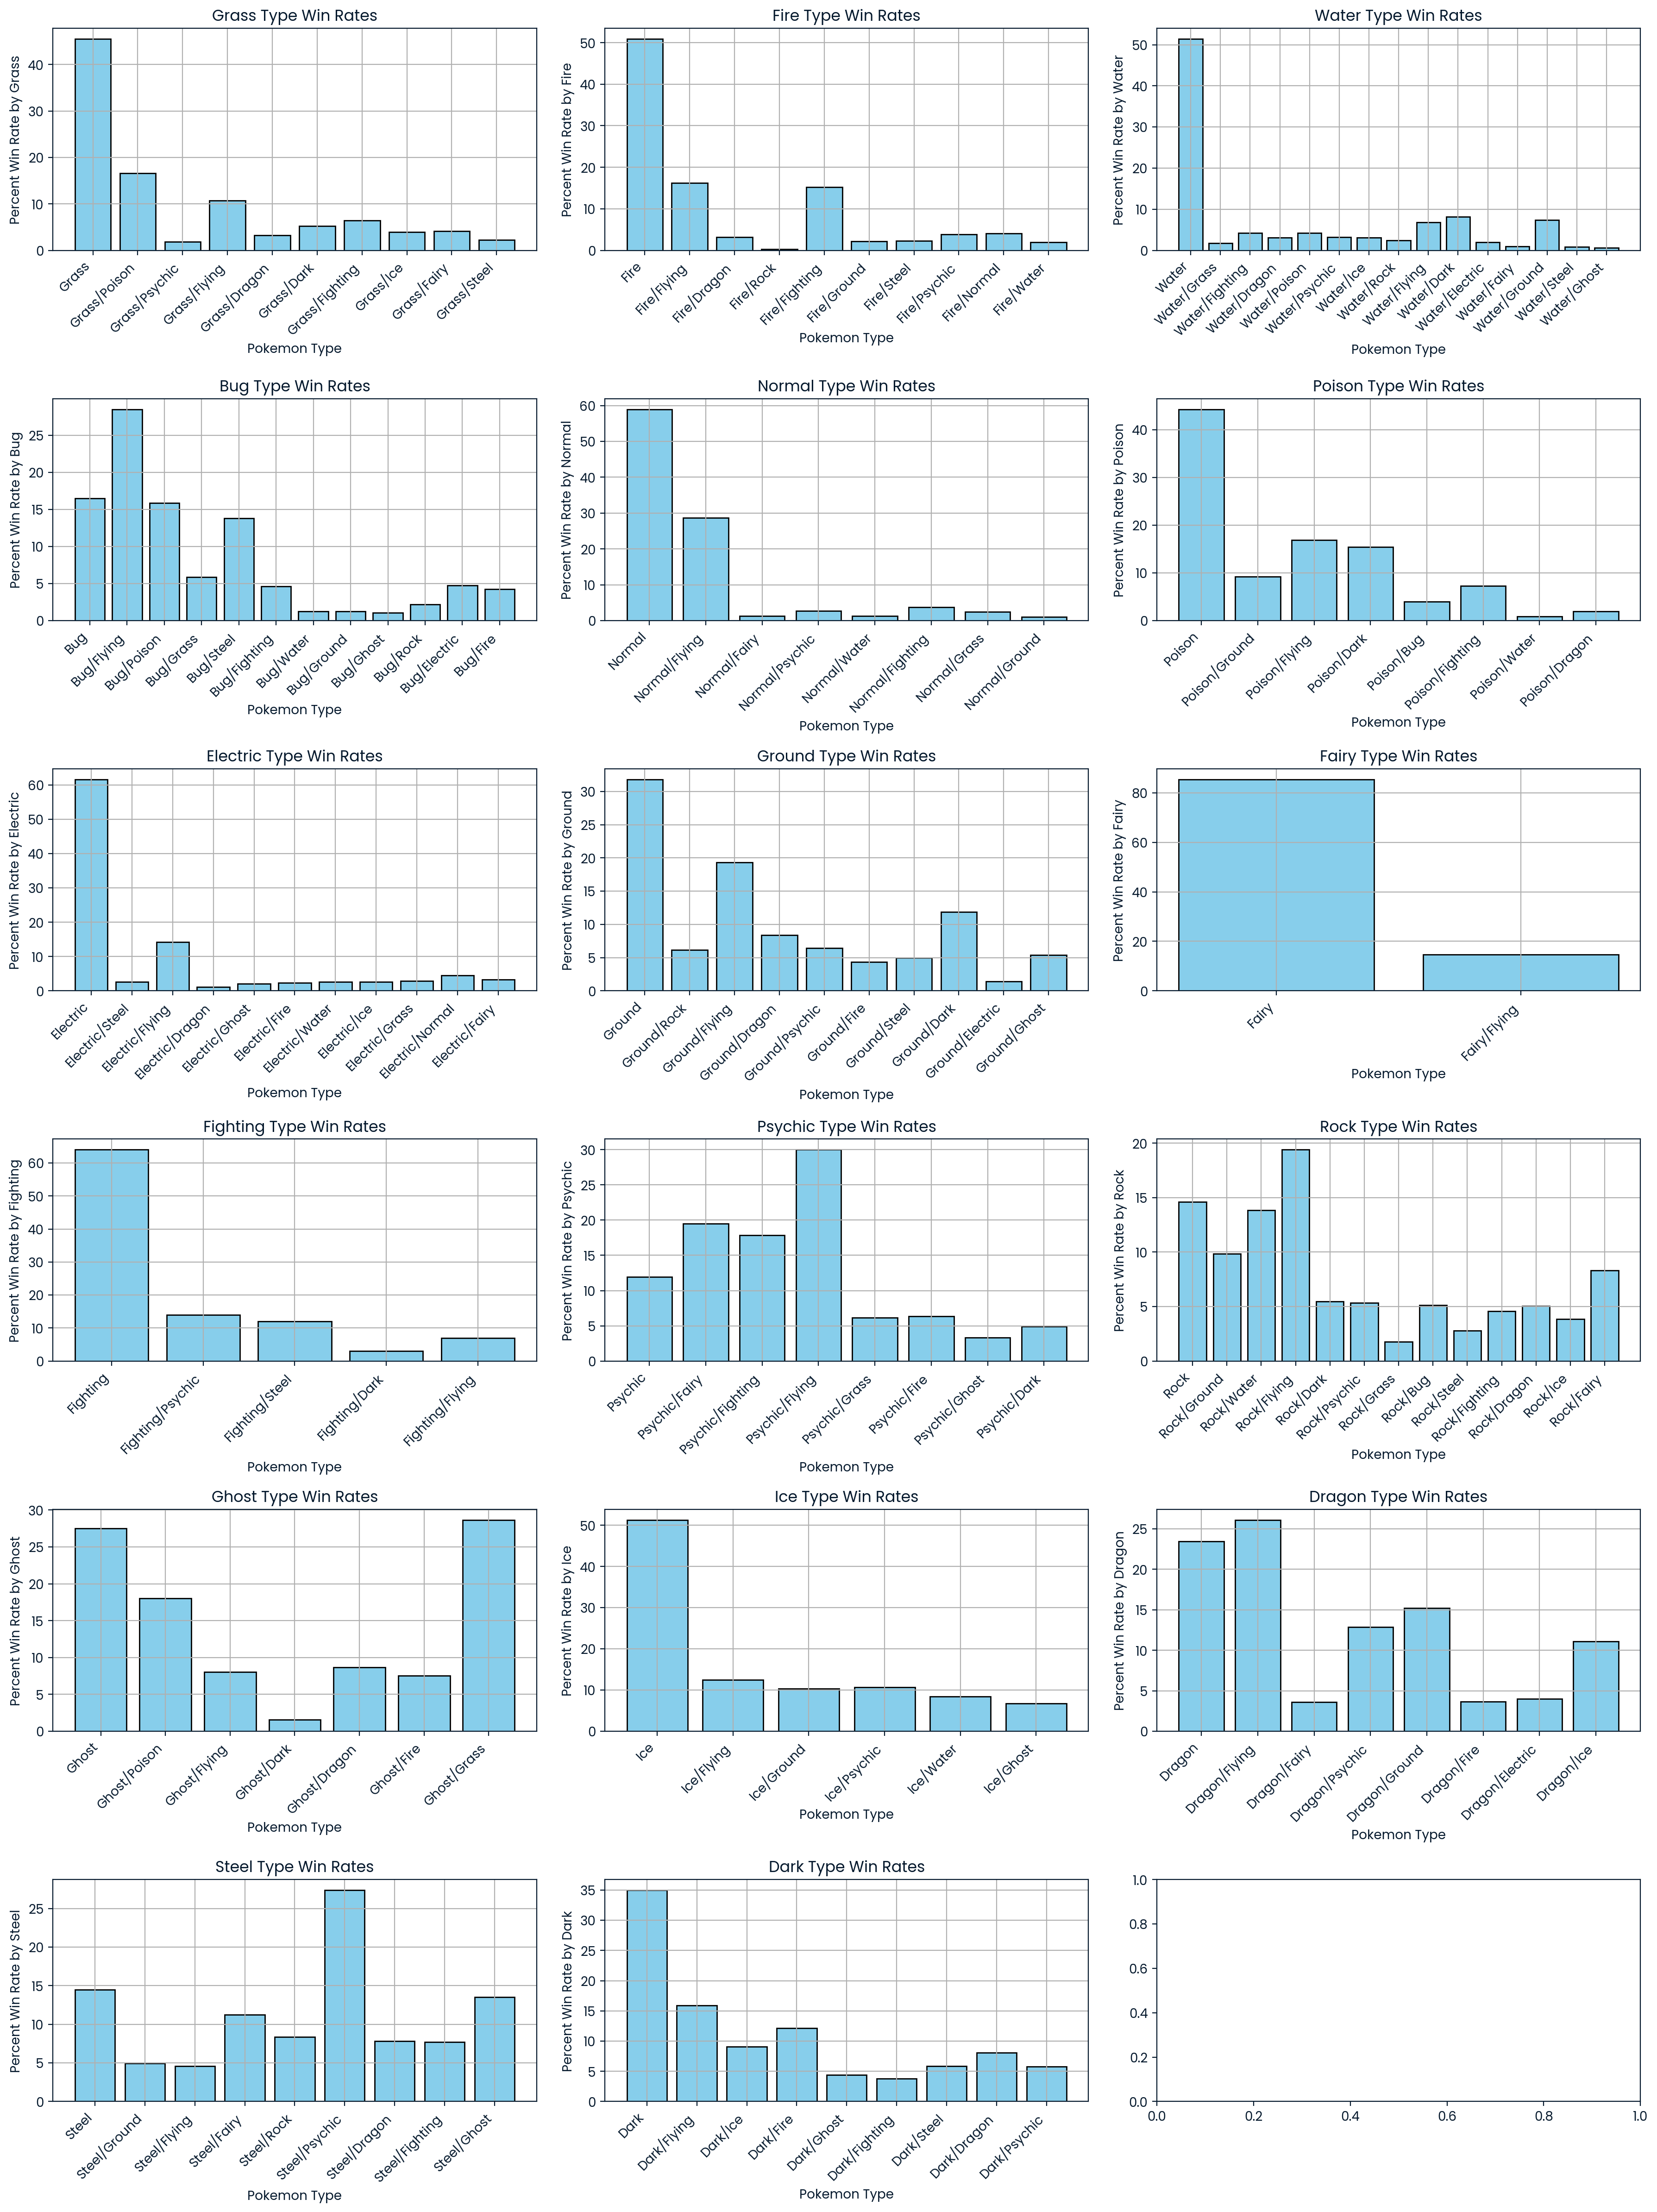

In [4]:
#This visualization is to check which type of pokemon wins the most battles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load pokemon win rate by type data
win_rate_type_df = pd.read_csv('Pokemon_win_rate_by_type.csv')

df_grass = win_rate_type_df.iloc[0:10,:] # Grass type
df_fire = win_rate_type_df.iloc[10:20,:] # Fire type
df_water = win_rate_type_df.iloc[20:35,:] # Water type
df_bug = win_rate_type_df.iloc[35:47,:] # Bug type
df_normal = win_rate_type_df.iloc[47:55,:] # Normal type
df_poison = win_rate_type_df.iloc[55:63,:] # Poison type
df_electric = win_rate_type_df.iloc[63:74,:] # Electric type
df_ground = win_rate_type_df.iloc[74:84,:] # Ground type
df_fairy = win_rate_type_df.iloc[84:86,:] # Fairy type
df_fighting = win_rate_type_df.iloc[86:91,:] # Fighting type
df_psychic = win_rate_type_df.iloc[91:99,:] # Psychic type
df_rock = win_rate_type_df.iloc[99:112,:] # Rock type
df_ghost = win_rate_type_df.iloc[112:119,:] # Ghost type
df_ice = win_rate_type_df.iloc[119:125,:] # Ice type
df_dragon = win_rate_type_df.iloc[125:133,:] # Dragon type
df_steel = win_rate_type_df.iloc[133:142,:] # Steel type
df_dark = win_rate_type_df.iloc[142:151,:] # Dark type

# Create a list of tuples containing the name and dataframe for each type
df_list = [('Grass', df_grass), ('Fire', df_fire), ('Water', df_water), ('Bug', df_bug), ('Normal', df_normal),
           ('Poison', df_poison), ('Electric', df_electric), ('Ground', df_ground), ('Fairy', df_fairy),
           ('Fighting', df_fighting), ('Psychic', df_psychic), ('Rock', df_rock), ('Ghost', df_ghost),
           ('Ice', df_ice), ('Dragon', df_dragon), ('Steel', df_steel), ('Dark', df_dark)]

# Set up the subplot grid
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through dataframes and plot on subplots
for ax, (name, df) in zip(axes, df_list):
    bars = ax.bar(df.index, df['Percent Win Rate by Type 1'], color='skyblue', edgecolor='black')
    ax.set_title(f'{name} Type Win Rates')
    ax.set_xlabel('Pokemon Type')
    ax.set_ylabel('Percent Win Rate by {}'.format(name))
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['Type1/2'], rotation=45, ha="right")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

As we can see from the histograms above, pokemons with only Type 1's win the most battles out of the pokemons that have two different types. For example the Grass, Fire, Water, Normal, Poison, Electric, Ground, Fairy, Fighting, Ice, and Dark pokemons win the most out of their varients.

There are however some outliers where the pokemons with two types win the most.These would be Bug, Psychic, Rock, Ghost, Dragon, and Steel pokemons.

What if we want to know which pokemon is to win the most battles? Only the ones with one type? We can do so by only comparing the one type pokemons from the dataframe. These would be Grass, Fire, Water, Normal, Poison, Electric, Ground, Fairy, Fighting, Ice, Dark, Bug, Psychic, Rock, Ghost, Dragon, and Steel pokemons. The ones without a second type. 

As we can see from the histogram below, the Fairy pokemon is most likely to win a battle Fighting and Electric following. Although, this data considers other pokemons that have type varients. For example it considers 'Grass/Flying' and othe varients like this. So this data is not entirely accurate. 

In order to make it more accurate, we may need to consider gathering data of 1v1 battles of pokemons with only one type. Then we can truly see which pokemon based on one type wins the most battles.

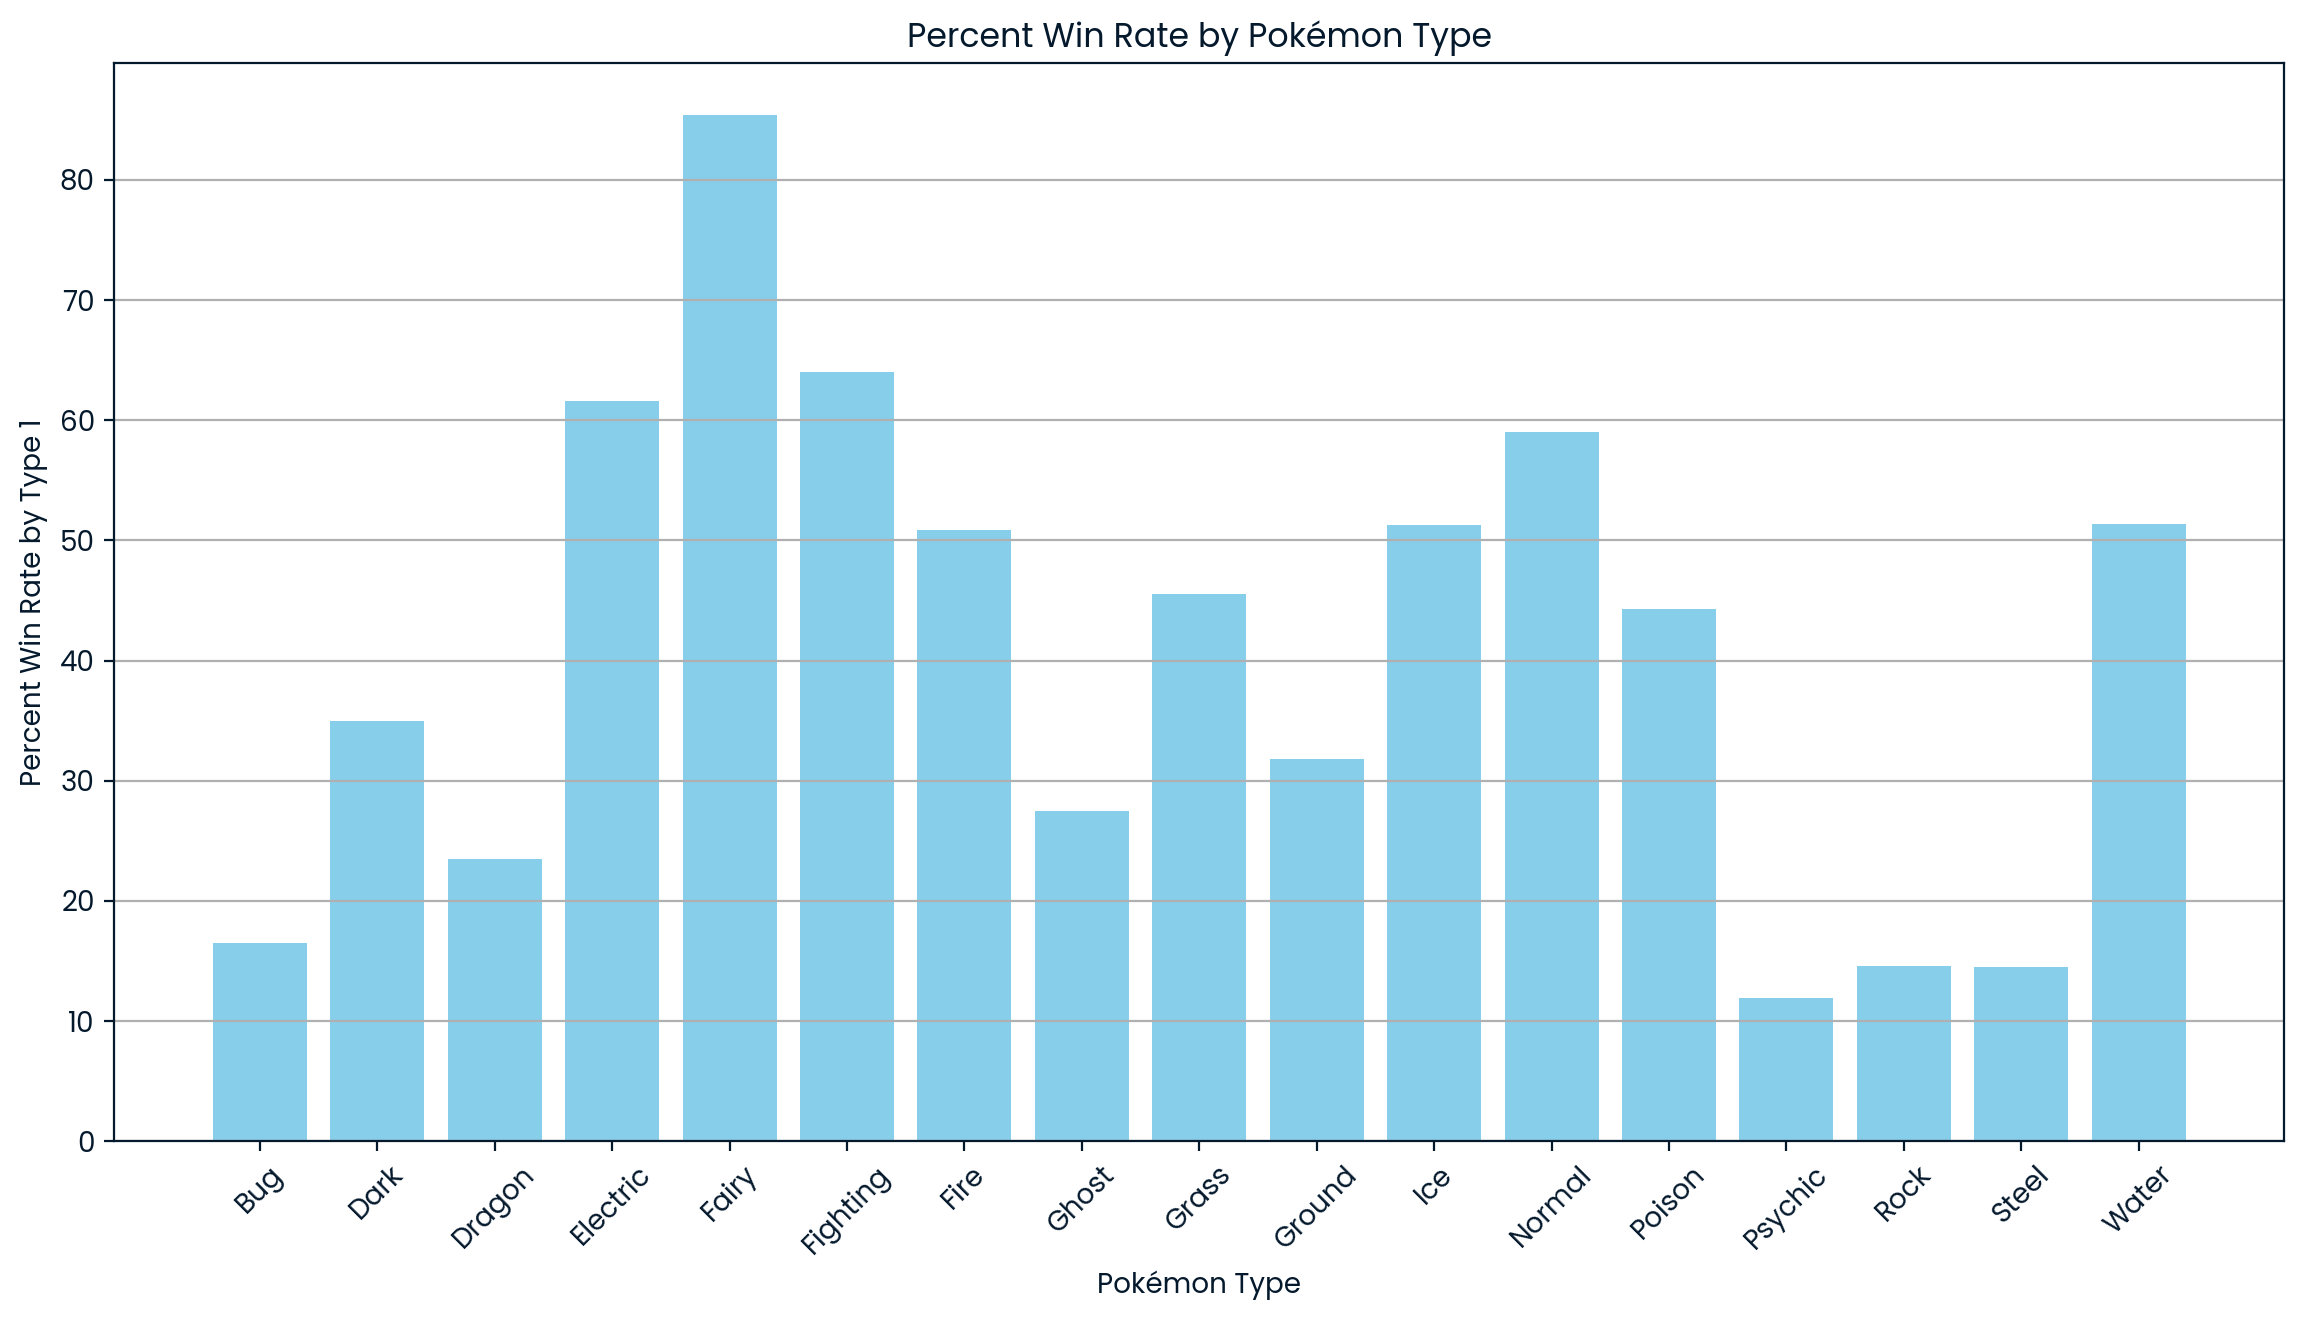

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('Pokemon_win_rate_by_type.csv')  # Make sure to update the path to where you stored the file

# Specify the Pokémon types you want to filter
types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting',
         'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Steel', 'Dark']

# Filter the DataFrame to include only the specified types
filtered_df = df[df['Type1/2'].isin(types)]

# Sorting the DataFrame based on the 'Type1/2' column for better visualization
filtered_df_sorted = filtered_df.sort_values('Type1/2')

# Create a bar chart
plt.figure(figsize=(14, 7))
plt.bar(filtered_df_sorted['Type1/2'], filtered_df_sorted['Percent Win Rate by Type 1'], color='skyblue')
plt.title('Percent Win Rate by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Percent Win Rate by Type 1')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.grid(axis='y')  # Add gridlines for the y-axis only
plt.show()

## **In conclusion to 'What type of pokemon wins the most battles'**
The pokemon Type that is most likely to win a battle is the Fairy Type 1 pokemon. Of course this is in the context of a 1v1 battle with another pokemon, the Fairy has a 85.43% chance of winning that battle. 

## 5. Interpretation and Reporting


## 5.1 Key Findings
Discuss the key insights and findings from your analysis. How do these findings answer the research questions posed in the Introduction?

_Question 2_ - We found that there is a higher importance on winrate over number of wins as the number of combats a pokemon had increases. Since the avrage number of pokemon combats is 62.5, we concluded there should be a higher emphasis on winrate. Our composite score reflects this with our 70-30 distribution in our composite score for each pokemon.

## 5.2 Implications
Explain the practical or theoretical implications of your findings. How can these insights be applied in practice or contribute to existing knowledge?

## 5.3 Limitations and Future Work
### Limitations
Our study has several limitations that originate primarily from the characteristics of the dataset and the underlying simulation algorithm used for generating combat data. Key limitations include:

- **Simulation Algorithm:** The dataset we used was generated using a custom simulation algorithm that does not account for the unique abilities of each Pokémon. In actual Pokémon games, these abilities can significantly influence battle outcomes, such as by boosting certain stats under specific conditions or affecting the effectiveness of certain types of moves.
  
- **Move Selection:** It is unclear from the dataset how Pokémon choose their moves during combat. The choice between using a physical attack versus a special attack can drastically change the dynamics of a battle, especially considering the defensive attributes of the opposing Pokémon. Additionally, the dataset does not indicate if modifiers like stat boosts, weather effects, or field advantages were considered, which are crucial elements in real battles.

- **Old Data:** Considering this data was made in 2016, there have 3 new generations of Pokemon added to the total count of creatures and thus making this data obsolete in many aspects. The same analysis can be run on an updated dataset but will present new results 

### Future Work
To build on the findings of this study and address its limitations, future research could focus on several areas:

- **Algorithm Enhancement:** Developing a more sophisticated simulation algorithm that incorporates each Pokémon's unique abilities and the strategic selection of moves could provide more accurate predictions and insights. This would require a detailed analysis of each ability's impact on battles, possibly leading to a separate model or set of rules that govern these interactions.

- **Detailed Move Analysis:** Extending the dataset to include detailed move choices and the conditions under which each move is selected could enhance the model's accuracy. This would involve simulating battles that account for a wider range of strategic decisions, such as the use of status moves, defensive moves, and priority moves.

- **Integration of Modifiers:** Incorporating battle modifiers such as weather conditions, terrain effects, and held items could make the simulations more realistic and reflective of actual Pokémon battles. Research could explore how these factors influence battle outcomes and could be modeled effectively in a predictive framework.

By addressing these limitations and exploring these avenues for future work, we can improve our understanding of Pokémon battleS and enhance the predictive power of our models.


## 6. Conclusion
Summarize the entire project, reiterating the research questions, what was found, and the importance of these findings.


## 7. Contribution Report
Outline the contributions of each group member towards the final submission. Be specific about each member's contributions to different parts of the project.
- **Rahif Mansoor:** I answered Question 1 based on the Statistics(HP,Attack,Defense,Speed etc.) and helped form a feasible Machine Learning model that can predict the outcomes of future battles. I also set up the Docker Environment and Github to allow reproducibility and turned in the pdf
- **Yanez Saucedo:** 
- **Emily Thompson:** 
- **Jacob Ralls:** 